<a href="https://colab.research.google.com/github/riyapatelrp/Zomato-Restaurant-Clustering-/blob/main/Zomato_Restaurant_Clustering_%26_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering & Sentiment Analysis



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Team
##### **Team Member 1 -** Vinayak Marathe
##### **Team Member 2 -** Riya Patel


# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

The Zomato Restaurant Clustering and Sentiment Analysis Project is a machine learning project that involves clustering restaurants based on their features and performing sentiment analysis on customer reviews. The project uses unsupervised learning techniques to group similar restaurants and identifies patterns and similarities among them. Additionally, sentiment analysis is performed on the reviews of each restaurant to classify them as positive, negative, or neutral. The insights gained from this project can be useful for restaurant owners to understand customer preferences and improve their services accordingly.


# **GitHub Link -**


1.   Vinayak Marathe: https://github.com/v1git12
2.   Riya Patel: https://github.com/riyapatelrp

# **Problem Statement**


**The restaurant industry is highly competitive and dynamic, with new restaurants constantly entering the market. Restaurant owners face the challenge of understanding customer preferences and meeting their expectations to stay relevant in the market. In this context, there is a need for a data-driven approach that can help restaurant owners gain insights into customer preferences and improve their services accordingly. The Zomato Restaurant Clustering and Sentiment Analysis Project aims to address this problem by leveraging machine learning techniques to cluster restaurants based on their features and perform sentiment analysis on customer reviews to identify areas of improvement.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# For Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10


# For Text Preprocessing 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# For removing StopWords
from nltk.corpus import stopwords
!pip install contractions
import contractions

# For Tokenization
from nltk.tokenize import word_tokenize

# For Text Normalisation
nltk.download('averaged_perceptron_tagger')
# Stemming
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
# lemmatization 
from nltk.stem import WordNetLemmatizer

# For Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# For data scaling 
from sklearn.preprocessing import StandardScaler

# Model Implementation
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Evalution Metrices
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score


# shap for model explainability
!pip install shap
import shap 

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 12.8 MB/s eta 0:00:00


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 12.0 MB/s eta 0:00:00


### Dataset Loading

In [2]:
# Load Dataset
# Reading Zomato Restaurant names and Metadata.csv file
url = 'https://drive.google.com/file/d/1m4lylf_iAyxlsIW1uTGrMSuhHYwuntJl/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
restaurant_df = pd.read_csv(url)

In [3]:
# Reading Zomato Restaurant reviews.csv file
url2 = 'https://drive.google.com/file/d/1JG_8OGZ6tS-0SOstH_x3n9sN0ZI1AFNC/view?usp=sharing'
url2 = 'https://drive.google.com/uc?id=' + url2.split('/')[-2]
reviews_df = pd.read_csv(url2)

### Dataset First View

In [4]:
# Dataset First Look 
restaurant_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [5]:
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
restaurant_df.shape

(105, 6)

In [7]:
reviews_df.shape

(10000, 7)

### Dataset Information

In [8]:
# Dataset Info
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
len(restaurant_df[restaurant_df.duplicated()])

0

In [11]:
len(reviews_df[reviews_df.duplicated()])

36

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [13]:
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

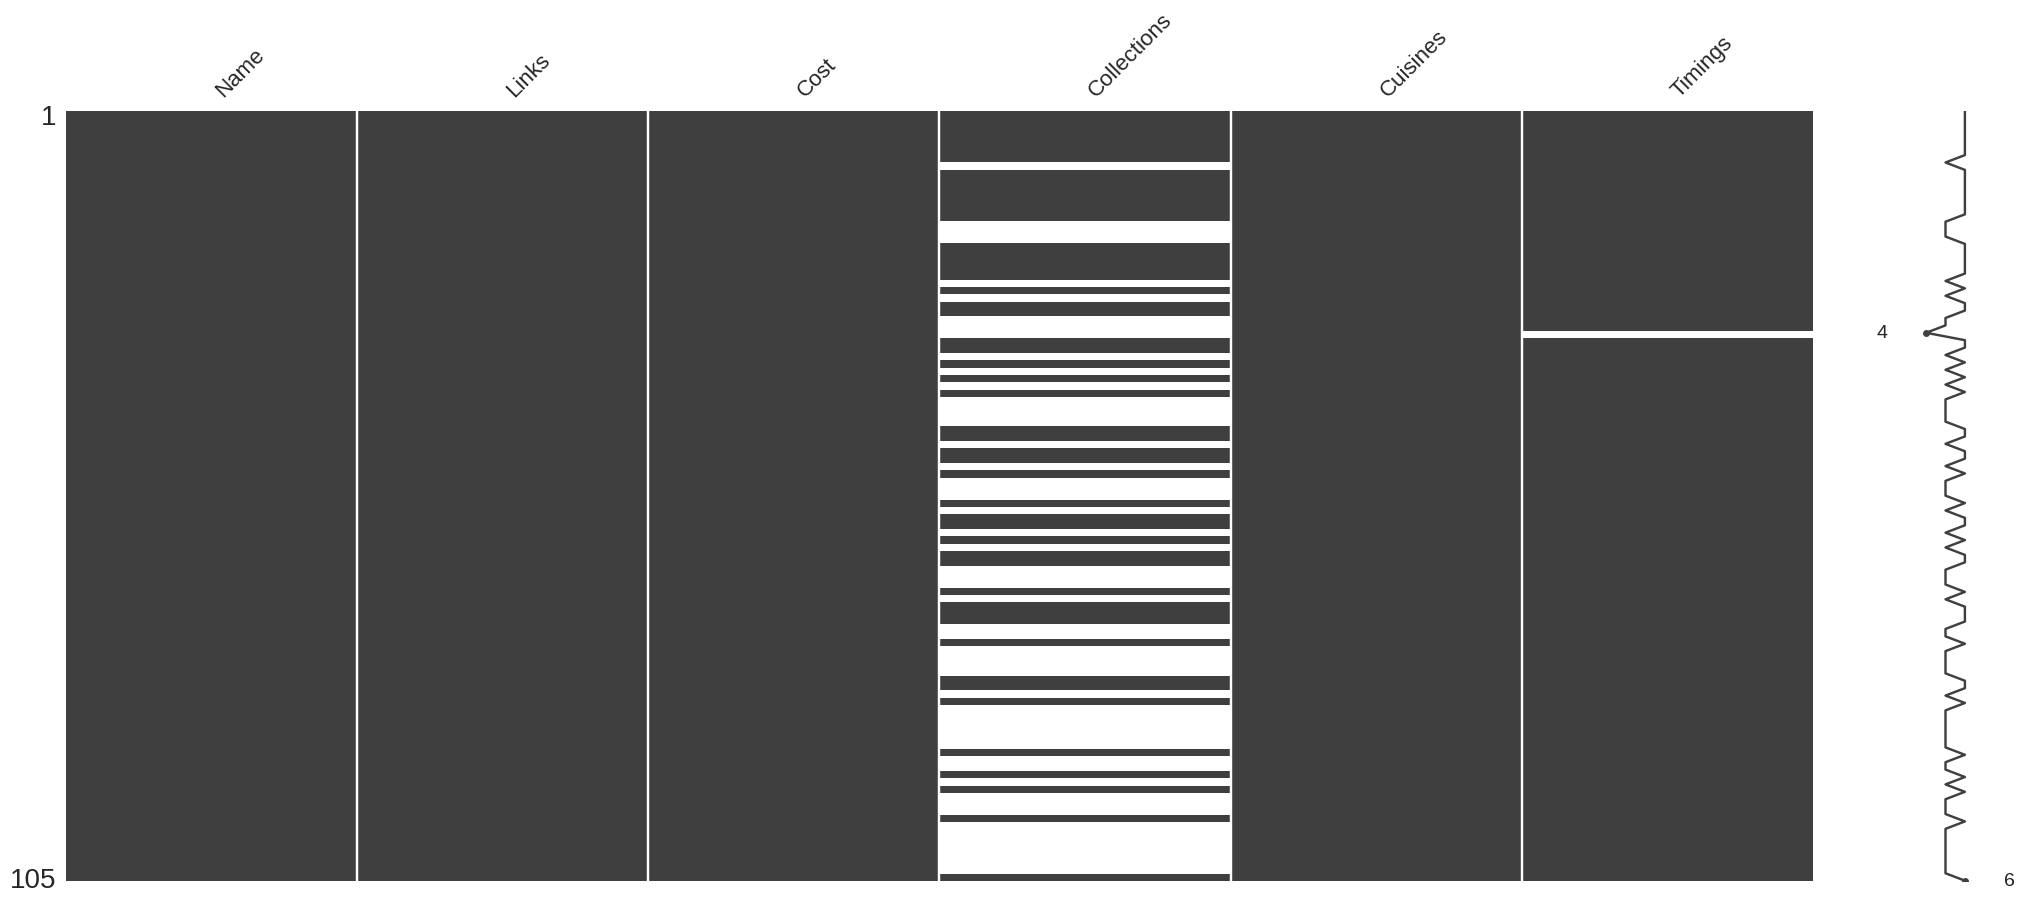

In [14]:
# Visualizing the missing values
import missingno as msno
# visualize the null values in the DataFrame 1
msno.matrix(restaurant_df)
plt.show()

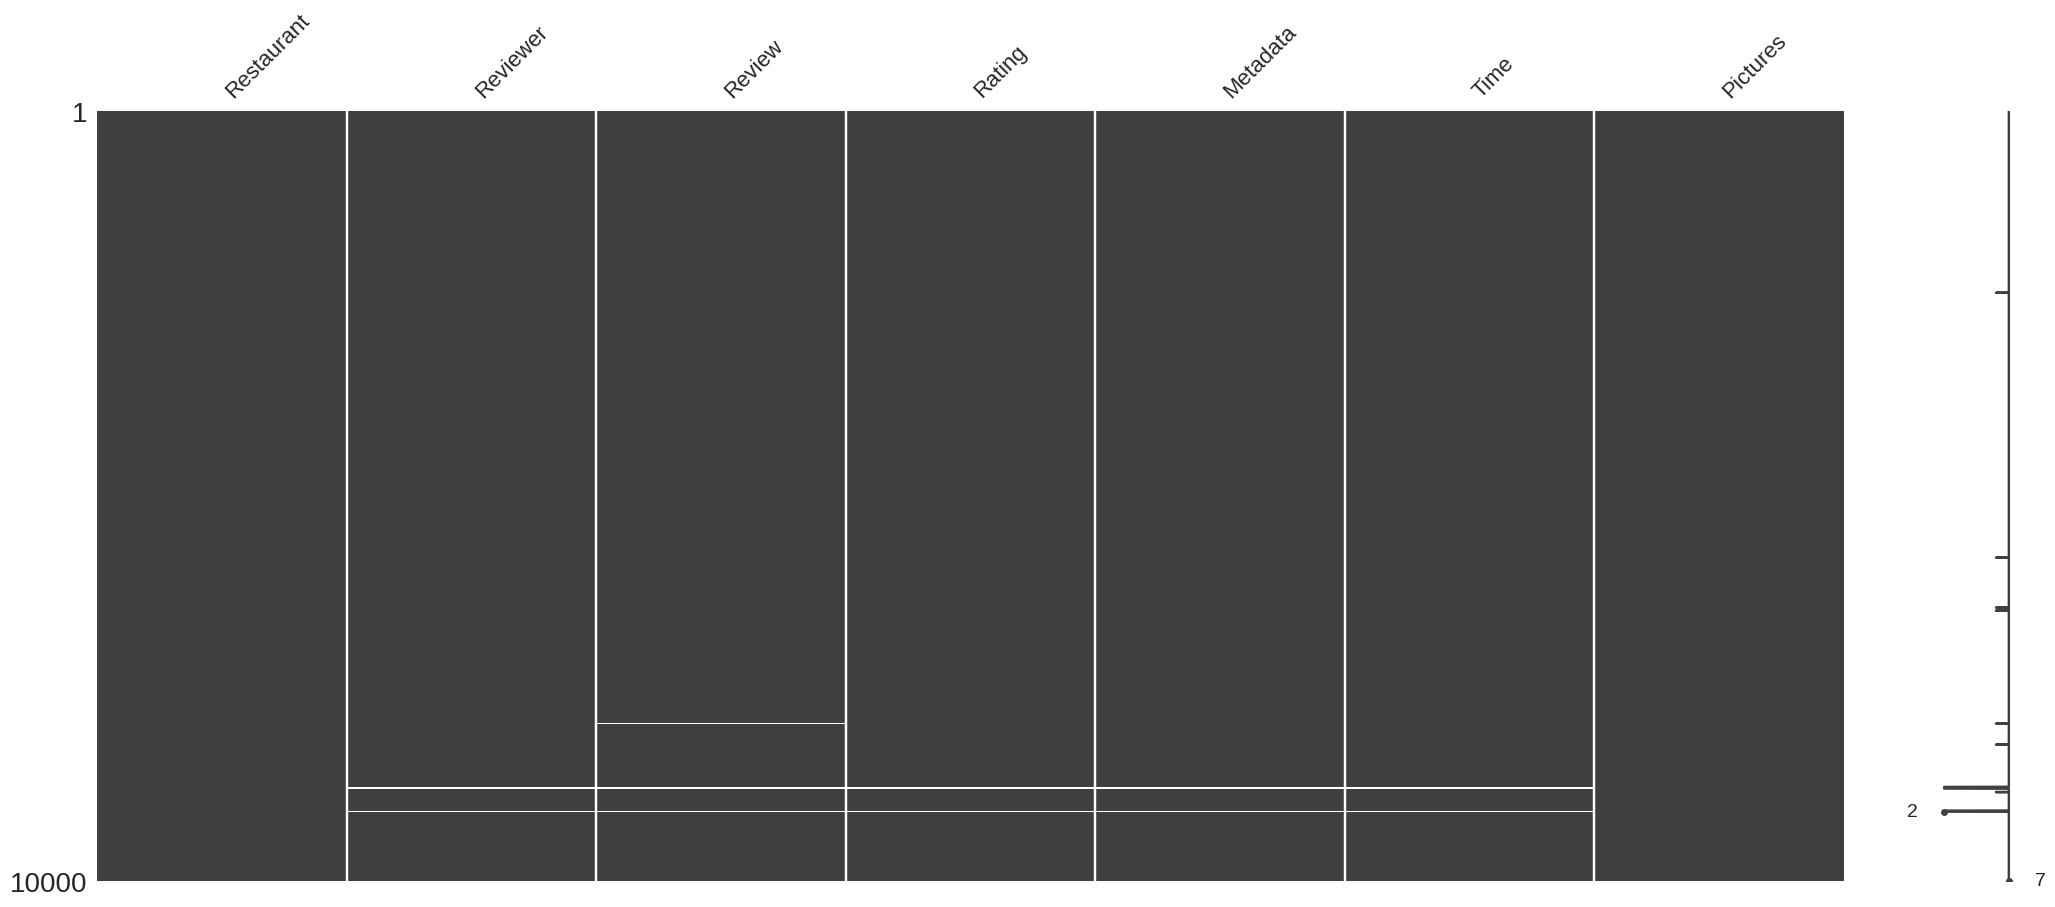

In [15]:
# visualize the null values in the DataFrame 2
msno.matrix(reviews_df)
plt.show()

### What did you know about your dataset?

We have two datasets in our project - "Zomato Restaurant names and Metadata.csv" and "Zomato Restaurant reviews.csv".

The "Zomato Restaurant names and Metadata.csv" dataset contains six columns: "Name", "Links", "Cost", "Collections", "Cuisines", and "Timings". There are 105 non-null values in each column except for "Collections" and "Timings", which have 51 and 104 non-null values, respectively.

The "Zomato Restaurant reviews.csv" dataset contains seven columns: "Restaurant", "Reviewer", "Review", "Rating", "Metadata", "Time", and "Pictures". There are 10,000 non-null values in the "Restaurant" and "Pictures" columns, while the "Reviewer", "Review", "Rating", "Metadata", and "Time" columns have 9962 non-null values.

Overall, these datasets contain valuable information about restaurants such as their names, cuisines, cost, and customer reviews. The information can be used to perform various analysis tasks such as sentiment analysis and clustering to gain insights into customer preferences and improve restaurant services.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
restaurant_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [17]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [18]:
# Dataset Describe
restaurant_df.describe()

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [19]:
reviews_df.describe()

Pictures
count  10000.000000
mean       0.748600
std        2.570381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       64.000000

### Variables Description 

**Variable Description**



---


**Restaurant Data**

---




|**Fields** | **Description**|
|-----------|--------------|
Name | Name of Restaurants
Links | URL Links of Restaurants
Cost | Per person estimated cost of dining
Collections |Tagging of Restaurants with respect to Zomato categories
Cuisines|Cuisines served by restaurants
Timings|Restaurant timings



---


**Review Data**


---


|**Fields** | **Description**|
|-----------|--------------|
Reviewer|Name of the reviewer
review|Review text
Rating|Rating provided
MetaData|Reviewer metadats-No of reviews and followers
Time|Date and Time of Review
Pictures| Number of pictures posted with review


### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
restaurant_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [21]:
reviews_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Data Wrangling on Zomato Restaurant Names and Metadata

In [22]:
# Write your code to make your dataset analysis ready.
def convert_column_to_int64(df, column_name):
    """
    Convert a column in a pandas DataFrame from object to int64 data type,
    while handling values with commas as thousands separators.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the column to be converted.
    column_name (str): The name of the column to be converted.

    Returns:
    None
    """

    # Remove commas from the column values
    df[column_name] = df[column_name].str.replace(',', '')

    # Convert the column to int64 data type
    df[column_name] = df[column_name].astype('int64')

In [23]:
# Applying Above Function in 'Cost' col of Restaurant dataset
convert_column_to_int64(restaurant_df, 'Cost')

In [24]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [25]:
# Define a function to count the number of words in a string separated by commas
def count_words(string):
    words = string.split(',')
    return len(words)

In [26]:
# Apply the 'count_words' function to the 'Cuisines' column of the DataFrame and store the result in a new 'cuisine_count' column
restaurant_df['cuisine_count'] = restaurant_df['Cuisines'].apply(count_words)

In [27]:
restaurant_df['cuisine_count'].value_counts()

3    33
2    26
4    21
5    12
1    12
6     1
Name: cuisine_count, dtype: int64

* 33 restaurants with 3 different cusine
* 26 restaurants with 2 different cusine
* 21 restaurants with 4 different cusine
* 12 restaurants with 5 different cusine
* 12 restaurants with only 1 cusine
* only 1 restaurant with 6 different cusine

In [28]:
# Extract the unique values of 'Cuisines' column by splitting the strings using the comma separator
cuisines = set()
for cuisine_string in restaurant_df['Cuisines']:
    cuisine_list = cuisine_string.split(', ')
    cuisines.update(cuisine_list)
cuisines

{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Italian',
 'Japanese',
 'Juices',
 'Kebab',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Pizza',
 'Salad',
 'Seafood',
 'South Indian',
 'Spanish',
 'Street Food',
 'Sushi',
 'Thai',
 'Wraps'}

In [29]:
len(cuisines)

44

There are 44 different Cuisines present in our dataset.

In [30]:
# Finding no of restaurnts by latest cuisines
cuisine_list = restaurant_df['Cuisines'].str.split(', ')

# storing all the cusines in cuisine_dict 
cuisine_dict = {}

for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if cuisine in cuisine_dict:
            cuisine_dict[cuisine] += 1
        else:  
            cuisine_dict[cuisine] = 1 

In [31]:
# convert it to dataframe and getting all Cuisine by transposing the rows in dictionary to columns
cuisine_df = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Cuisine', 0:'Number of Restaurants'}).sort_values('Number of Restaurants', ascending=False)
cuisine_df

Cuisine  Number of Restaurants
5    North Indian                     61
0         Chinese                     43
1     Continental                     21
6         Biryani                     16
18      Fast Food                     15
7           Asian                     15
20        Italian                     14
9        Desserts                     13
4    South Indian                      9
29         Bakery                      7
2           Kebab                      6
33           Cafe                      6
28         Andhra                      6
27        Mughlai                      6
15       American                      6
24          Salad                      5
22         Burger                      5
8   Mediterranean                      5
11      Beverages                      5
39          Momos                      4
10        Seafood                      4
3        European                      4
32     Hyderabadi                      4
25          Sushi                      4
36           Thai                      3
38  Modern Indian                      2
31        Arabian                      2
16      Ice Cream                      2
17    Street Food                      2
23       Japanese                      2
21    Finger Food                      2
19            BBQ                      2
40          Pizza                      1
41  North Eastern                      1
42         Mithai                      1
37     Indonesian                      1
30         Juices                      1
35          Wraps                      1
34        Spanish                      1
26        Mexican                      1
12           Goan                      1
13   Healthy Food                      1
14       Lebanese                      1
43      Malaysian                      1

From the above dataframe, we can see that North Indian is the mostly available food on 61 number of different restaurants followed by Chinese and Continental food which is available on 43 and 21 restaurants. It means mostly people demands for this food as compared to other food like pizza, juices, malaysian food which is available on less number of restaurant.

In [32]:
# Restaurant with maximum number of cuisine
pd.set_option('display.max_colwidth', None)

topRestarant = restaurant_df.loc[restaurant_df.groupby('Name')['cuisine_count'].idxmax()]
topRestarant_sorted = topRestarant.sort_values(by=['cuisine_count'], ascending=False)[:20]
topRestarant_sorted[['Name','cuisine_count','Cuisines']]

Name  cuisine_count  \
0                                      Beyond Flavours              6   
3                       Shah Ghouse Hotel & Restaurant              5   
70                          Urban Asia - Kitchen & Bar              5   
21   Jonathan's Kitchen - Holiday Inn Express & Suites              5   
92                Collage - Hyatt Hyderabad Gachibowli              5   
82                                  Al Saba Restaurant              5   
8                                          Hyper Local              5   
26                              Mustang Terrace Lounge              5   
31                                         Pista House              5   
4                           Over The Moon Brew Company              5   
94                                      Dunkin' Donuts              5   
36                 Banana Leaf Multicuisine Restaurant              5   
5                                The Fisherman's Wharf              5   
61                                Prism Club & Kitchen              4   
60                                          PourHouse7              4   
56                    Feast - Sheraton Hyderabad Hotel              4   
6                                              eat.fit              4   
2                                             Flechazo              4   
40                                         Frio Bistro              4   
104             Republic Of Noodles - Lemon Tree Hotel              4   

                                                              Cuisines  
0    Chinese, Continental, Kebab, European, South Indian, North Indian  
3                   Biryani, North Indian, Chinese, Seafood, Beverages  
70                                  Asian, Thai, Chinese, Sushi, Momos  
21                       North Indian, Japanese, Italian, Salad, Sushi  
92                  Continental, Italian, North Indian, Chinese, Asian  
82                 North Indian, Chinese, Seafood, Biryani, Hyderabadi  
8                 American, Chinese, North Indian, Kebab, South Indian  
26                      Mexican, Italian, North Indian, Chinese, Salad  
31                      Bakery, North Indian, Mughlai, Juices, Chinese  
4             Asian, Continental, North Indian, Chinese, Mediterranean  
94                        Desserts, Cafe, Beverages, Burger, Fast Food  
36                Biryani, South Indian, North Indian, Chinese, Andhra  
5                      Seafood, Goan, North Indian, Continental, Asian  
61                           Kebab, Continental, Italian, North Indian  
60                         North Indian, Continental, Chinese, Italian  
56                          Modern Indian, Asian, Continental, Italian  
6                Healthy Food, North Indian, Continental, South Indian  
2                         Asian, Mediterranean, North Indian, Desserts  
40                             European, Italian, Continental, Spanish  
104                                    Thai, Asian, Chinese, Malaysian

* Beyond Flavours restaurant has a maximum number of different type of cuisine followed by Shah Ghouse Hotel & Restaurant.
* Republic Of Noodles - Lemon Tree Hotel has 4 types of cuisine available.

In [33]:
# Number of Indian Restaurants with Indian cuisine
indian_restaurant = restaurant_df[restaurant_df['Cuisines'].str.contains('Indian')]
indian_restaurant.shape[0]

63

In [34]:
# Number of Chinese Restaurants with Chinese cuisine
Chinese_restaurant = restaurant_df[restaurant_df['Cuisines'].str.contains('Chinese')]
Chinese_restaurant.shape[0]

43

* There are 63 Restaurants where Indian cuisine is available
* There are 43 Restaurants where Chinese cuisine is available


In [35]:
pd.set_option('display.max_rows', None)

# Group the DataFrame by Cuisine and sum the total cost for each group
total_cost_by_cuisine = restaurant_df.groupby('Cuisines')['Cost'].sum()
total_cost_by_cuisine.sort_values(ascending=False)

Cuisines
North Indian, Chinese, Continental                                   3300
Continental, Italian, North Indian, Chinese, Asian                   2800
Continental                                                          2600
Modern Indian, Asian, Continental, Italian                           2500
North Indian, Chinese                                                2050
North Indian, Japanese, Italian, Salad, Sushi                        1900
North Indian, Italian, Continental, Asian                            1800
Asian, Sushi                                                         1750
Thai, Asian, Chinese, Malaysian                                      1700
Italian, North Indian, South Indian, Asian                           1700
Mediterranean, North Indian, Kebab, BBQ                              1600
American                                                             1600
North Indian, Chinese, Japanese, Sushi                               1500
European, Mediterranean, Nort

In [36]:
# Top 20 most expensive restaurants where average per person estimated cost of dining is high
top_20_expensive_restaurants = restaurant_df.sort_values('Cost', ascending=False).head(20)
top_20_expensive_restaurants[['Name','Cost']]

Name  Cost
92                Collage - Hyatt Hyderabad Gachibowli  2800
56                    Feast - Sheraton Hyderabad Hotel  2500
21   Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                   10 Downing Street  1900
91             Cascade - Radisson Hyderabad Hitec City  1800
97                     Zega - Sheraton Hyderabad Hotel  1750
104             Republic Of Noodles - Lemon Tree Hotel  1700
34               Mazzo - Marriott Executive Apartments  1700
90                                        Arena Eleven  1600
11                                     Barbeque Nation  1600
22                                              B-Dubs  1600
65             Komatose - Holiday Inn Express & Suites  1500
14                           AB's - Absolute Barbecues  1500
5                                The Fisherman's Wharf  1500
69                                      The Indi Grill  1500
68                               The Tilt Bar Republic  1500
46                                          Ulavacharu  1400
24                                               SKYHY  1400
13                       The Lal Street - Bar Exchange  1300
71                                   Eat India Company  1300

Collage - Hyatt Hyderabad Gachibowli and Feast - Sheraton Hyderabad Hotel are the two most expensive restaurants with the cost of 2800 and 2500 ruppees which is a average per person estimated cost of dining.

In [37]:
# Top 20 most affordable restaurants where average per person estimated cost of dining is low
top_20_affordable_restaurants = restaurant_df.sort_values('Cost').head(20)
top_20_affordable_restaurants[['Name','Cost']]

Name  Cost
89             Mohammedia Shawarma   150
23                            Amul   150
54                  Asian Meal Box   200
101                   Sweet Basket   200
59                       KS Bakers   200
85                   Momos Delight   200
29              Hunger Maggi Point   200
103                    Wich Please   250
7         Shah Ghouse Spl Shawarma   300
58                        Tempteys   350
76   The Old Madras Baking Company   350
9                      Cream Stone   350
17                Hotel Zara Hi-Fi   400
95                      Desi Bytes   400
98                        Triptify   400
19                   Pakwaan Grand   400
10        Sardarji's Chaats & More   400
88                  Domino's Pizza   400
20                        13 Dhaba   450
57                    Being Hungry   450

Mohammedia Shawarma, Amul and Asian Meal Box Hotel are the most affordable Restaurants where the cost of 150 and 200 ruppees which is a average per person estimated cost of dining.

#### Data Wrangling on Zomato Restaurant Reviews Dataset

In [38]:
# convert the 'Time' column from object to datetime data type
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'], format='%m/%d/%Y %H:%M')
reviews_df['Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Time
Non-Null Count  Dtype         
--------------  -----         
9962 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [39]:
# Total count of ratings from 1 star to 5 star
ratings_df = reviews_df['Rating'].value_counts().reset_index()
ratings_df.rename(columns={'index': 'Ratings(1-5)'}, inplace=True)
ratings_df.rename(columns={'Rating': 'Count'}, inplace=True)
ratings_df

Ratings(1-5)  Count
0            5   3832
1            4   2373
2            1   1735
3            3   1193
4            2    684
5          4.5     69
6          3.5     47
7          2.5     19
8          1.5      9
9         Like      1

In [40]:
# drop the rows where 'Rating' is not equal to 'Like'
reviews_df = reviews_df[reviews_df['Rating'] != 'Like']

In [41]:
# Converting Rating dtype into float
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

* 5 star is the ratings given by 3832 number of customer.
* Lowest rating given by the customers is 1.5 star.

In [42]:
# rename the 'Reviewer' column to 'Customer_Name'
reviews_df = reviews_df.rename(columns={'Reviewer': 'Customer_Name'})

In [43]:
reviews_df.head()

Restaurant         Customer_Name  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                                                                                                                                                                                                             Review  \
0  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.   
1                                                                                  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service   
2                                     A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.   
3                                                                              Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.   
4                                                                  Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.   

   Rating                 Metadata                Time  Pictures  
0     5.0   1 Review , 2 Followers 2019-05-25 15:54:00         0  
1     5.0  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  
2     5.0  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  
3     5.0    1 Review , 1 Follower 2019-05-24 22:11:00         0  
4     5.0  3 Reviews , 2 Followers 2019-05-24 21:37:00         0

In [44]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Customer_Name  9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Metadata       9961 non-null   object        
 5   Time           9961 non-null   datetime64[ns]
 6   Pictures       9999 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 624.9+ KB


In [45]:
# Total number of customers
reviewers = reviews_df['Customer_Name'].value_counts().reset_index()
# Renaming the new df
reviewers.rename(columns={'index': 'Customer Name'}, inplace=True)
reviewers.rename(columns={'Customer_Name': 'Count'}, inplace=True)
reviewers[:20]

Customer Name  Count
0                           Ankita     13
1                      Parijat Ray     13
2                            Kiran     12
3                        Jay Mehta     11
4                     Vedant Killa     11
5                          Sravani     10
6                       Siva Kumar     10
7                         Priyanka     10
8   Age Of Foodies (Suraj Karambe)     10
9            Manojkumar D Nambisan     10
10                 Prasun Gokhlani      9
11                           Nillu      9
12                           Kumar      9
13                           Vinay      9
14                    Anusha Sinha      9
15               Prachita Jayaswal      9
16                 Khushboo Pandey      9
17             The Foodie Bookworm      8
18                  Karishma Bhatt      8
19                    SONIYA SINHA      8

In [46]:
# extract Review_count and Followers from Metadata
reviews_df['Review_count'] = reviews_df['Metadata'].str.extract('(\d+) Review')
reviews_df['Followers'] = reviews_df['Metadata'].str.extract('(\d+) Follower')

In [47]:
# fill missing values with 0 in 'Review_count' column and 'Followers' column
reviews_df['Review_count'] = pd.to_numeric(reviews_df['Review_count']).fillna(0).astype(int)
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers']).fillna(0).astype(int)

In [48]:
# Dropping unnecessary column as it is not needed now
reviews_df = reviews_df.drop(columns=['Metadata'])
reviews_df.isnull().sum()

Restaurant        0
Customer_Name    38
Review           45
Rating           38
Time             38
Pictures          0
Review_count      0
Followers         0
dtype: int64

In [49]:
# Top 20 Popular customers (With Highest number of followers) and their order timings
popular_customers = reviews_df.loc[reviews_df.groupby('Customer_Name')['Followers'].idxmax()]
popular_customers_sorted = popular_customers.sort_values(by=['Followers'], ascending=False)[:20]
popular_customers_sorted[['Customer_Name','Followers', 'Restaurant','Time']]

Customer_Name  Followers  \
3927    Satwinder Singh      13410   
8719         Eat_vth_me      13320   
3147       Samar Sardar      11329   
7884  Foodies Hyderabad       9494   
1177           Srinivas       7628   
1071         Aman Arora       7589   
635              ASH&B2       6931   
5581      Hasanthi Mula       5879   
9701          #FOODPORN       5873   
4820        FooD HUNTer       5715   
1218        Food Nawabs       5533   
9179       Aarti Kamath       5451   
3095    Rakesh Bandiwar       5210   
2169        Hungry Eyes       5129   
7882   Vasantha Lakshmi       5093   
310         Dinesh Jana       5083   
6539        Shiva Chary       4844   
68           Gautam Dev       4734   
1095        Varun Reddy       4642   
3136         SRK 😍👌🍸🍻🍾🦀       4315   

                                             Restaurant                Time  
3927                                      Deli 9 Bistro 2019-02-10 12:46:00  
8719                                American Wild Wings 2019-05-13 15:32:00  
3147                                        Pista House 2018-10-12 20:21:00  
7884                                         Khaan Saab 2019-02-01 18:04:00  
1177                                    Barbeque Nation 2018-07-14 13:10:00  
1071                           Sardarji's Chaats & More 2018-10-31 22:33:00  
635                                             eat.fit 2019-04-07 22:27:00  
5581                                         Cafe Eclat 2018-06-10 14:05:00  
9701                    Zega - Sheraton Hyderabad Hotel 2019-05-15 16:35:00  
4820                                     Udipi's Upahar 2018-10-01 09:28:00  
1218                                  Absolute Sizzlers 2019-04-28 19:14:00  
9179            Cascade - Radisson Hyderabad Hitec City 2017-12-25 14:02:00  
3095                                         Pot Pourri 2019-01-17 15:01:00  
2169  Jonathan's Kitchen - Holiday Inn Express & Suites 2019-02-17 13:02:00  
7882                                         Khaan Saab 2019-02-03 17:58:00  
310                      Shah Ghouse Hotel & Restaurant 2019-05-19 23:08:00  
6539            Komatose - Holiday Inn Express & Suites 2018-10-30 13:05:00  
68                                      Beyond Flavours 2019-05-15 00:07:00  
1095                           Sardarji's Chaats & More 2018-09-16 21:07:00  
3136                                        Pista House 2018-11-30 08:39:00

In [50]:
# Top 20 Popular customers (With Highest number of Review_count)
popular_customersR = reviews_df.loc[reviews_df.groupby('Customer_Name')['Review_count'].idxmax()]
popular_customersR_sorted = popular_customersR.sort_values(by=['Review_count'], ascending=False)[:20]
popular_customersR_sorted[['Customer_Name','Review_count']]

Customer_Name  Review_count
3124                           Anvesh Chowdary          1031
4512                              ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ           685
7638                                    Abc098           665
6627                     Mithun Ravindranathan           560
9653  Mohd Zubair Ali (Hyderabad.Food.Diaries)           482
9999                          Bhargava Krishna           472
5889                           Epicurean Tales           452
755                                      Raghu           443
9179                              Aarti Kamath           417
9181                         Shrishail Deshnur           414
4233                           Guru Prasad Das           411
7286                                     Sumit           401
7284                           Supriya Subudhi           390
9684                            Karthik Gandhi           375
9177                             Anjan Goswami           366
1150                                 Asad Rana           362
530                       Priyambada Choudhury           344
7635                              Souvik Patra           337
2539                                   Asha JS           333
9185                   Sabyasachi Raychaudhuri           331

In [51]:
# Top 20 Popular Restaurant (With Highest number of Review_count)
popular_restaurant = reviews_df.loc[reviews_df.groupby('Restaurant')['Review_count'].idxmax()]
popular_restaurant_sorted = popular_restaurant.sort_values(by=['Review_count'], ascending=False)[:20]
popular_restaurant_sorted[['Restaurant','Review_count']]

Restaurant  Review_count
9208     Collage - Hyatt Hyderabad Gachibowli          1031
3124                              Pista House          1031
7297                                  Labonel          1031
4512                              Owm Nom Nom           685
7638            The Old Madras Baking Company           665
6627                             Aromas@11SIX           560
9653                        Hyderabadi Daawat           482
9999                         Chinese Pavilion           472
5889                                 Tempteys           452
9168  Cascade - Radisson Hyderabad Hitec City           452
5352                          Diners Pavilion           443
8519                            Momos Delight           443
755                  Shah Ghouse Spl Shawarma           443
8487                                  T Grill           443
5988                                KS Bakers           443
4233                             Karachi Cafe           411
9353                 Zing's Northeast Kitchen           401
1150                          Barbeque Nation           362
4409               La La Land - Bar & Kitchen           344
530                     The Fisherman's Wharf           344

In [52]:
# Top 20 Popular Restaurant (With Highest number of followers)
popular_restaurant_by_followers = reviews_df.loc[reviews_df.groupby('Restaurant')['Followers'].idxmax()]
popular_restaurant_by_followers_sorted = popular_restaurant_by_followers.sort_values(by=['Followers'], ascending=False)[:20]
popular_restaurant_by_followers_sorted[['Restaurant','Followers']]

Restaurant  Followers
6592  Komatose - Holiday Inn Express & Suites      13410
3927                            Deli 9 Bistro      13410
6876                    The Tilt Bar Republic      13410
8719                      American Wild Wings      13320
5160                Hitech Bawarchi Food Zone      11329
3147                              Pista House      11329
8027                      Tandoori Food Works       9494
9659                        Hyderabadi Daawat       9494
9518                               Desi Bytes       9494
7884                               Khaan Saab       9494
1244                        Absolute Sizzlers       7628
4650                               Ulavacharu       7628
7756                       Squeeze @ The Lime       7628
1177                          Barbeque Nation       7628
1071                 Sardarji's Chaats & More       7589
635                                   eat.fit       6931
1535                                      KFC       6931
5581                               Cafe Eclat       5879
9701          Zega - Sheraton Hyderabad Hotel       5873
4820                           Udipi's Upahar       5715

In [53]:
# Peak hours for orders
def get_number_of_orders(a,b):
  A = (reviews_df['Time'].dt.hour >= a) & (reviews_df['Time'].dt.hour < b)
  peak_A = reviews_df[A]
  row_count = peak_A.shape[0]
  print(f'Number of Orders on Zomato between {a} and {b} is :{row_count}')

In [54]:
atime=list(np.arange(25))
btime=list(np.arange(1,25))
for a,b in zip(atime,btime):
  d = get_number_of_orders(a,b)

Number of Orders on Zomato between 0 and 1 is :509
Number of Orders on Zomato between 1 and 2 is :313
Number of Orders on Zomato between 2 and 3 is :167
Number of Orders on Zomato between 3 and 4 is :102
Number of Orders on Zomato between 4 and 5 is :55
Number of Orders on Zomato between 5 and 6 is :39
Number of Orders on Zomato between 6 and 7 is :44
Number of Orders on Zomato between 7 and 8 is :78
Number of Orders on Zomato between 8 and 9 is :134
Number of Orders on Zomato between 9 and 10 is :171
Number of Orders on Zomato between 10 and 11 is :229
Number of Orders on Zomato between 11 and 12 is :308
Number of Orders on Zomato between 12 and 13 is :459
Number of Orders on Zomato between 13 and 14 is :580
Number of Orders on Zomato between 14 and 15 is :776
Number of Orders on Zomato between 15 and 16 is :645
Number of Orders on Zomato between 16 and 17 is :549
Number of Orders on Zomato between 17 and 18 is :480
Number of Orders on Zomato between 18 and 19 is :438
Number of Orders

In [55]:
# Lets find Peak hours which is between 8 pm to 12 am
get_number_of_orders(20,24)

Number of Orders on Zomato between 20 and 24 is :3363


In [56]:
# Lets find Off hours which is between 4 am to 8 am
get_number_of_orders(4,8)

Number of Orders on Zomato between 4 and 8 is :216


In [57]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Customer_Name  9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Time           9961 non-null   datetime64[ns]
 5   Pictures       9999 non-null   int64         
 6   Review_count   9999 non-null   int64         
 7   Followers      9999 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 961.1+ KB


In [58]:
hourly_counts = reviews_df['Time'].dt.hour.value_counts()
# find the busiest Hour
busiest_hour = hourly_counts.idxmax()
print(f'busiest_hour: {busiest_hour}')
print("The number of Orders in that hour is:", hourly_counts[busiest_hour])

busiest_hour: 22.0
The number of Orders in that hour is: 968


In [59]:
# count the number of orders for each date
daily_counts = reviews_df['Time'].dt.date.value_counts()

# find the busiest day
busiest_day = daily_counts.idxmax()

# print the results
print("The busiest day for Zomato is:", busiest_day)
print("The number of Orders on that day is:", daily_counts[busiest_day])


The busiest day for Zomato is: 2018-07-29
The number of Orders on that day is: 97


* The Busiest day for Zomato is **29th July 2018**
* The number of Orders on that day is **97**

In [60]:
# calculate the first and last values
first_time = reviews_df['Time'].min()
last_time = reviews_df['Time'].max()

In [61]:
# Getting date and time of the first and last order placed by customer
print(f"The first order is placed in Zomato on: {first_time}")
print(f"The last order is placed in Zomato on: {last_time}")

The first order is placed in Zomato on: 2016-05-31 16:41:00
The last order is placed in Zomato on: 2019-05-25 20:23:00


In [62]:
last_time - first_time

Timedelta('1089 days 03:42:00')

Our overall dataset containing data of 1089 Days Three Hours and 42 Minutes

In [63]:
reviews_df.shape

(9999, 8)

In [64]:
# Extracting the timings using customers details
Firsto = reviews_df.loc[reviews_df.groupby('Customer_Name')['Time'].idxmax()]
Firsto.shape

(7446, 8)

In [65]:
# Length of the extracted customers
len(set(reviews_df['Customer_Name']))

7447

There are 7447 Different Customer Who have ordered food From Zomato in this Dataset 

In [66]:
from collections import Counter
# count the occurrences of each name
name_counts = Counter(reviews_df['Customer_Name'])
# filter out the names that occur only once
once = [name for name, count in name_counts.items() if count == 1]
len(once)

6105

6105 Customers Ordered any food items only once on Zomato

In [67]:
# filter out the names that occur only once
repeat = [name for name, count in name_counts.items() if count > 1]
len(repeat)

1342

1342 Are repeat Customers on Zomato

In [68]:
# Finding most valuable customer
mvp = [name for name, count in name_counts.items() if count > 10]
len(mvp)
mvp

['Kiran', 'Ankita', 'Parijat Ray', 'Vedant Killa', 'Jay Mehta', nan]

These are Most valuable Customers who have ordered Food From Zomato more than 10 times

In [69]:
# Top Customers Who have posted most pictures on Zomato
social_customer = reviews_df.loc[reviews_df.groupby('Customer_Name')['Pictures'].idxmax()]
social_customer_sorted = social_customer.sort_values(by=['Pictures'], ascending=False)[:20]
social_customer_sorted[['Customer_Name','Pictures']]

Customer_Name  Pictures
9043                             Anvith Devulapally        64
3148                                    Food Nawabs        52
6080                                        Akshith        42
6066                               Hydfoodiesisters        37
9222                                         Vijaya        34
7375                                   ChicLifeByte        34
9621                                 BeingHydFoodie        32
9683      Hyderabadfoodexplorer (sanchay Gumidelli)        28
6069                                    Vamshi Puli        28
9042                           Vasanthi Singampalli        27
9038  Kamran Hussain Khan (Intensefoodcravingsblog)        27
6998                             The Hungry Indians        27
3263                                     Karna Nair        27
3245                                Tasty Hyderabad        26
832                                Survivingforfood        26
8719                                     Eat_vth_me        25
6873                                     Eat O Bite        25
7064                              Pavan Rishit Meka        24
9168                                Epicurean Tales        24
8721                             Foodee_ambient_hyd        24

These are top social customers who have posted most number of pictures on Zomato

In [70]:
# creating new variable review length 
reviews_df['Review'] = reviews_df['Review'].astype(str)
reviews_df['Review_length'] = reviews_df['Review'].apply(len)
reviews_df.head(2)

Restaurant         Customer_Name  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   

                                                                                                                                                                                                                             Review  \
0  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.   
1                                                                                  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service   

   Rating                Time  Pictures  Review_count  Followers  \
0     5.0 2019-05-25 15:54:00         0             1          2   
1     5.0 2019-05-25 14:20:00         0             3          2   

   Review_length  
0            222  
1            144

In [71]:
# creating new column named polarity for the sentiment analysis
from textblob import TextBlob
reviews_df['Polarity'] = reviews_df['Review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
reviews_df.head(2)

Restaurant         Customer_Name  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   

                                                                                                                                                                                                                             Review  \
0  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.   
1                                                                                  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service   

   Rating                Time  Pictures  Review_count  Followers  \
0     5.0 2019-05-25 15:54:00         0             1          2   
1     5.0 2019-05-25 14:20:00         0             3          2   

   Review_length  Polarity  
0            222  0.660000  
1            144  0.606667

We have created new variable called polarity through which we can just determine the reviews as positive, negetive and neutral reviews.

**What is polarity score in sentiment analysis?**

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

#### What all manipulations have you done and insights you found?

* There are 105 different restaurant data in restaurant CSV
* 10000 Data points in reviews csv

* 5 Rating by 3832 Number of People
* 4 Rating by 2373 Number of People
* 1 Rating by 1735 Number of People
* 3 Rating by 1193 Number of People
* 2 Rating by 684  Number of People

#### Merging restaurant_df and reviews_df for further insights

In [72]:
restaurant_df.rename({'Name':'Restaurant_name', 'Timings':'Restaurant_timings'},axis=1, inplace=True )
restaurant_df.head(2)

Restaurant_name  \
0  Beyond Flavours   
1         Paradise   

                                                         Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavours-gachibowli   800   
1         https://www.zomato.com/hyderabad/paradise-gachibowli   800   

                                                                                                                        Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings   
1                                                                                                               Hyderabad's Hottest   

                                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South Indian, North Indian   
1                                     Biryani, North Indian, Chinese   

                              Restaurant_timings  cuisine_count  
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)              6  
1                                 11 AM to 11 PM              3

In [73]:
reviews_df.rename({'Restaurant':'Restaurant_name', 'Time':'Review_timing'}, axis=1, inplace=True)
reviews_df.head(2)

Restaurant_name         Customer_Name  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   

                                                                                                                                                                                                                             Review  \
0  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.   
1                                                                                  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service   

   Rating       Review_timing  Pictures  Review_count  Followers  \
0     5.0 2019-05-25 15:54:00         0             1          2   
1     5.0 2019-05-25 14:20:00         0             3          2   

   Review_length  Polarity  
0            222  0.660000  
1            144  0.606667

In [74]:
# merging both the data together on Restaurant_name column
zomato_data = pd.merge(restaurant_df, reviews_df.drop_duplicates(), on = 'Restaurant_name', how='left')
zomato_data.shape

(9968, 16)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Dist Plot and Hist Plot on Numerical Features (Univariate)

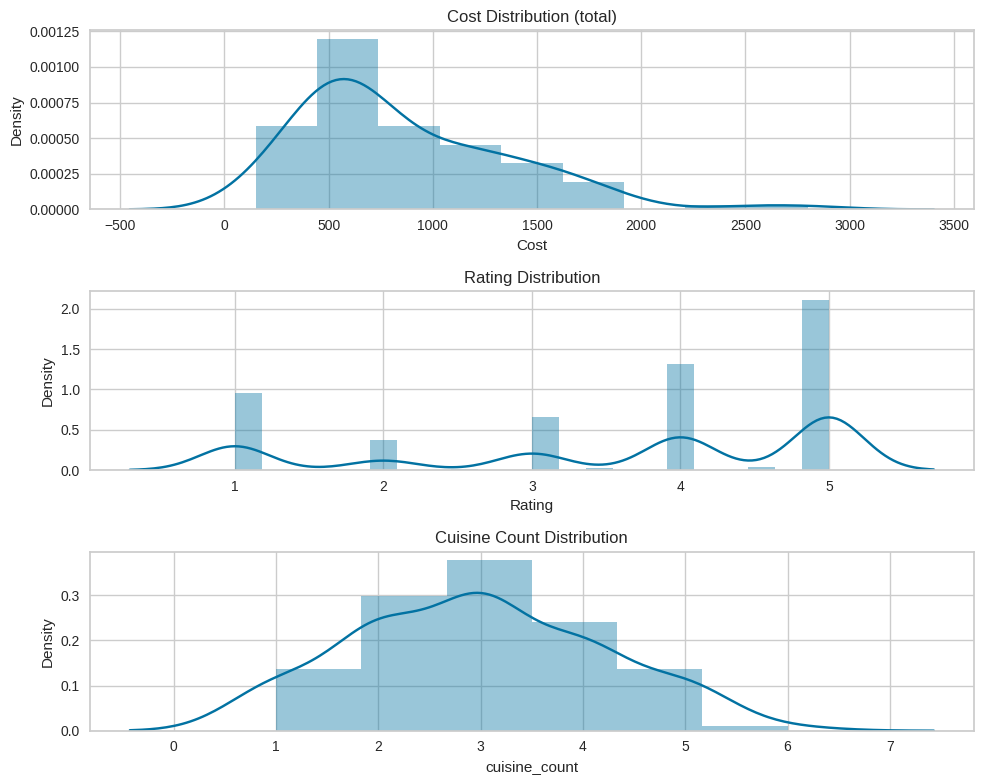

In [75]:
# Chart - 1 visualization code
# GRAPH -1
# Dist Plot of some important numerical feature 

fig, ax= plt.subplots(3,1, figsize=(10,8))

ax[0].set_title("Cost Distribution (total)")
sns.distplot(restaurant_df['Cost'], kde=True, ax=ax[0])

ax[1].set_title("Rating Distribution")
sns.distplot(reviews_df['Rating'], kde=True, ax=ax[1])

ax[2].set_title("Cuisine Count Distribution")
sns.distplot(restaurant_df['cuisine_count'], kde=True, ax=ax[2])

fig.tight_layout()
fig.show()
plt.show()

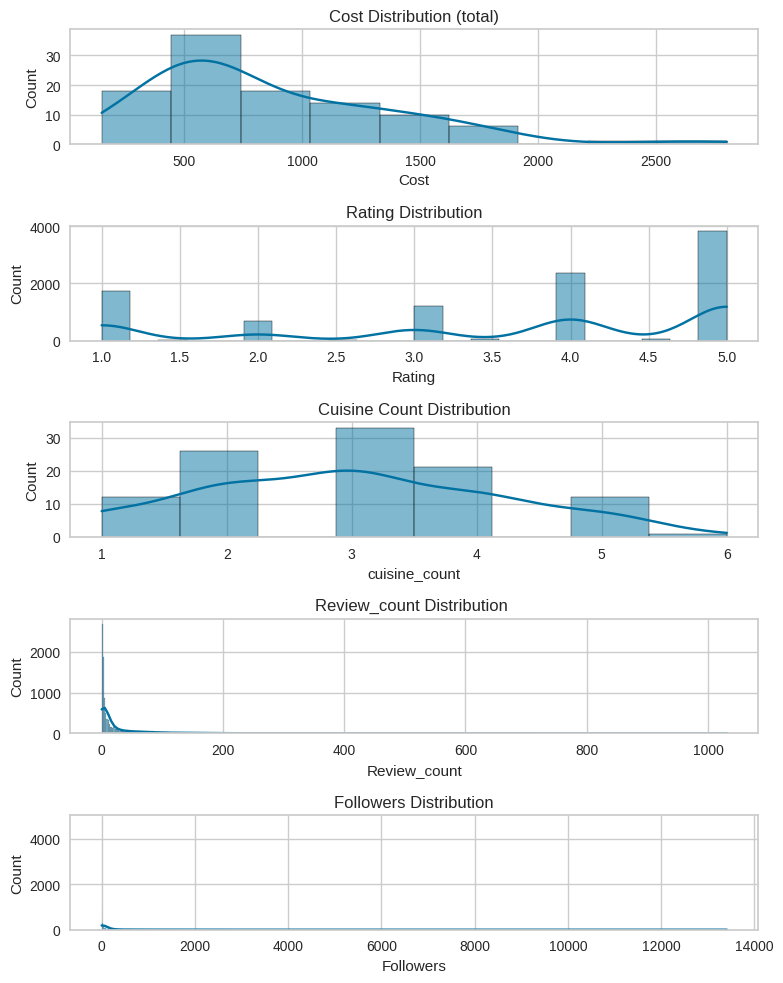

In [76]:
# GRAPH - 2
# Hist Plot of some important numerical feature 
# To see the distributions and skewness of the numerical feature

fig, ax= plt.subplots(5,1, figsize=(8,10))

ax[0].set_title("Cost Distribution (total)")
sns.histplot(restaurant_df['Cost'], kde=True, ax=ax[0])

ax[1].set_title("Rating Distribution")
sns.histplot(reviews_df['Rating'], kde=True, ax=ax[1])

ax[2].set_title("Cuisine Count Distribution")
sns.histplot(restaurant_df['cuisine_count'], kde=True, ax=ax[2])

ax[3].set_title("Review_count Distribution ")
sns.histplot(reviews_df['Review_count'], kde=True, ax=ax[3])

ax[4].set_title("Followers Distribution")
sns.histplot(reviews_df['Followers'], kde=True, ax=ax[4])

fig.tight_layout()
fig.show()
plt.show()

##### 1. Why did you pick the specific chart?

**Dist Plot** is known as distribution plot which depicts the variations in data that is it will show the variations in distribution of observations. It also displays a combination of statistical representations of numerical data, such as histogram, kde, bars etc. Distplot is helpful in understanding the distribution of the feature.

**Hist Plot** is a graphical representation of data that organizes the data into bins, and shows how frequently each bin occurs. It is used to illustrate the distribution of data, as well as its skewness.



##### 2. What is/are the insight(s) found from the chart?

Insights:
* Cost column shows skewness.
* Maximum restaurant has a price range of 500 rupee.
* Most of the restaurants got 5 star ratings.
* Most of the restaurants has 3 types of cuisines.
* Most of customers posts 1 or 2 pictures with their reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Cost is the important factor for any business. But from this visualisation, we are not getting any insights. we will do further analysis.

#### Chart - 2 Pie Plot on Ratings & Cuisine Count Features (Univariate)

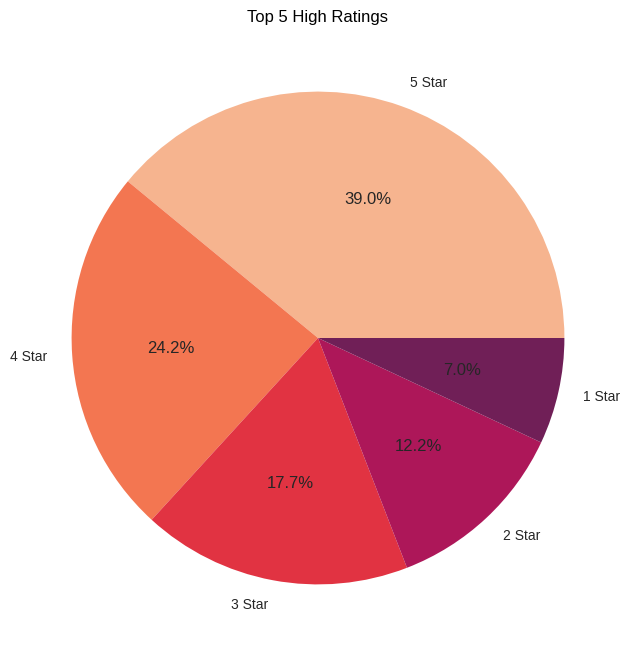

In [77]:
# Chart - 2 visualization code
# GRAPH - 2
# Pie Plot of Total count of ratings from 1 star to 5 star

# ratings_df = reviews_df['Rating'].value_counts().reset_index()
# ratings_df.rename(columns={'index': 'Ratings(1-5)'}, inplace=True)
# ratings_df.rename(columns={'Rating': 'Count'}, inplace=True)
# ratings_df

plt.figure(figsize=(15,8))
x_label = reviews_df['Rating'].value_counts().index
y_label = reviews_df['Rating'].value_counts().values
palette_color = sns.color_palette('rocket_r')
keys = [ '5 Star', '4 Star', '3 Star', '2 Star', '1 Star']
plt.pie(x = y_label[:5], labels = keys, autopct='%1.1f%%', colors=palette_color)
plt.title('Top 5 High Ratings', color= 'black')
plt.show()

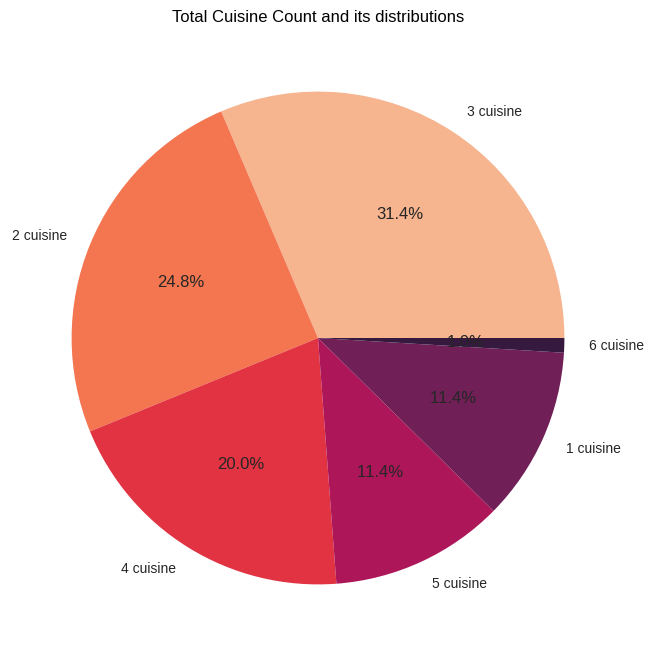

In [78]:
# GRAPH - 3
# Pie Plot of Total cuisine count & its distribution

x_label = restaurant_df['cuisine_count'].value_counts().index
y_label = restaurant_df['cuisine_count'].value_counts().values

plt.figure(figsize=(8,8))
palette_color = sns.color_palette('rocket_r')
keys = ['3 cuisine', '2 cuisine', '4 cuisine', '5 cuisine', '1 cuisine', '6 cuisine']
plt.pie(x = y_label, labels = keys, autopct='%1.1f%%', colors=palette_color)
plt.title('Total Cuisine Count and its distributions', color= 'black')
plt.show()

##### 1. Why did you pick the specific chart?

The main purpose of using pie chart is to indicates a part-to-whole relationship in our data. The portions of the graph are proportional to the fraction of the total in each and every category. The complete "pie" represents a hundred proportion of a whole, while at the same time, the pie "slices" signify portions of the whole. It shows the total coverages covered by room types, neighbourhood group & neighbourhood.

##### 2. What is/are the insight(s) found from the chart?

INSIGHTS:
* From graph 1 it ia clear that most of the restaurant has 4 and 5 star of the rating which distribution is of 39% and 24.2%. 
* Restaurant with 1 star is only 7% rating.
* From the graph 2, we can say that restaurants with 3 and 2 types of different cuisines has more number i.e. 32.1% and 24.1% distribution.
* While restaurant with 6 cuisine type has less number with 1% only. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We found that less number of different types of available cuisines may affect the restaurant's image as customers looks firstly about the different type of food as per their preference.

#### Chart - 3 Wordclouds on Reviews Feature (Univariate)

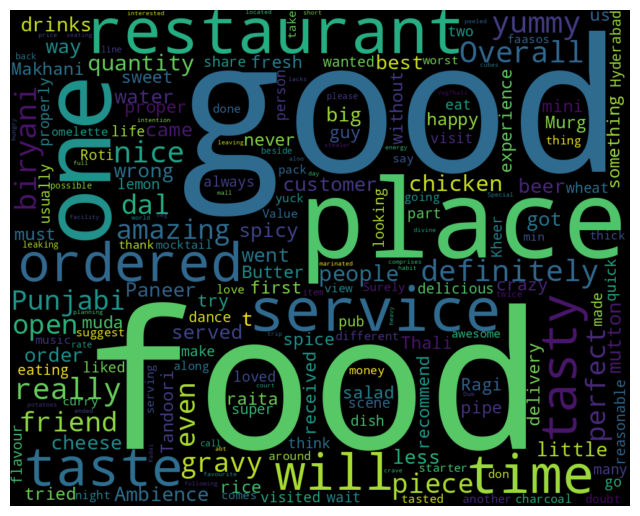

In [79]:
# Chart - 3 visualization code
# GRAPH - 1
# Creating word cloud for reviews

plt.figure(figsize=(8,8))
text = " ".join(name for name in reviews_df.sort_values('Review',ascending=False).Review[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 1000, height = 800, collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [80]:
# Extracting positive and negetive reviews 
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'],errors='coerce')

# Positive review is where ratings is greater than & equal to 3 star
pos_reviews = reviews_df[reviews_df.Rating >= 3]

# Negetive review is where ratings is less than the 3 star
neg_reviews = reviews_df[reviews_df.Rating < 3]

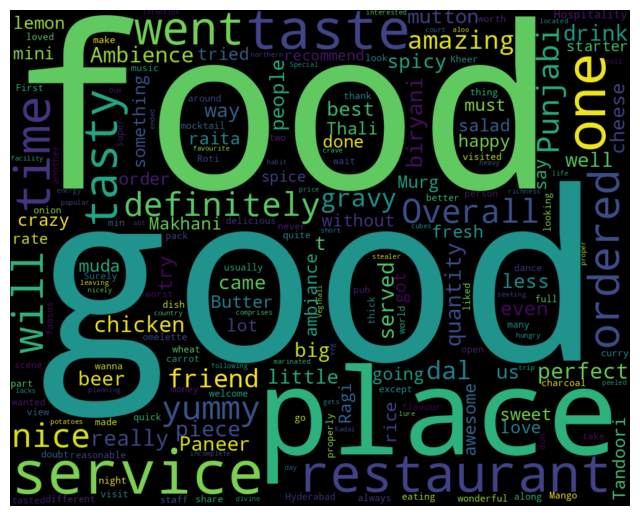

In [81]:
# Wordcloud for Positive Reviews

plt.figure(figsize=(8,8))

long_string = " ".join(name for name in pos_reviews.sort_values('Review',ascending=False).Review[:30])
long_string

wordcloud = WordCloud(width = 1000, height = 800, collocations = False, background_color = 'black')
wordcloud.generate(long_string)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

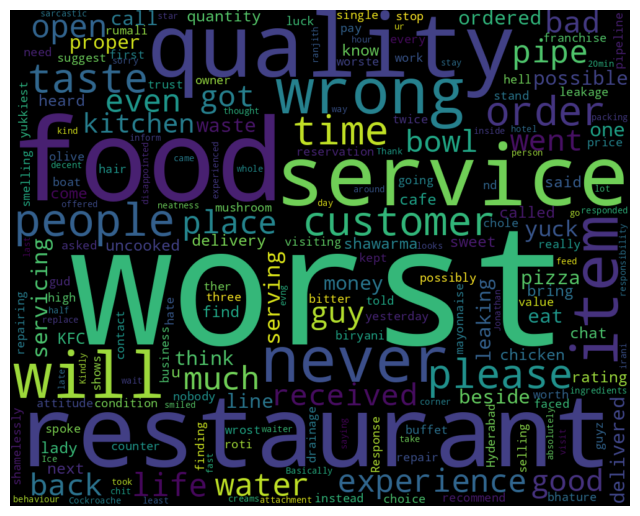

In [82]:
# Wordcloud for Negetive Reviews

plt.figure(figsize=(8,8))

long_string = " ".join(name for name in neg_reviews.sort_values('Review',ascending=False).Review[:30])
long_string

wordcloud = WordCloud(width = 1000, height = 800, collocations = False, background_color = 'black')
wordcloud.generate(long_string)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

##### 1. Why did you pick the specific chart?

We have used wordcloud which is a visual representation of the unstructured text as a images in which bigger is the word, more often that word is mentioned which is helpful in getting insights of trending patterns.

##### 2. What is/are the insight(s) found from the chart?

We have created two datasets equal and above 3 rating for positive reviews and below 3 for negative reviews. Apart from stopwords i have removing common words used in restuarant business.

From the above visualization, we can definately come up with some conclusion that most of the customers gave positive as well as negetive feedback using this keywords. So that we can easily examine that what exactly the behaviour and views of our customers.

Service , bad chicken , quality, uncooked food are key reasons for negative reviews

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The gained insights help us creating a positive buisness impact by using reviews and ratings so that restaurant with less number of ratings can work on their management.

#### Chart - 4 Bar Plot on Numerical + Categorical Features (Bivariate)

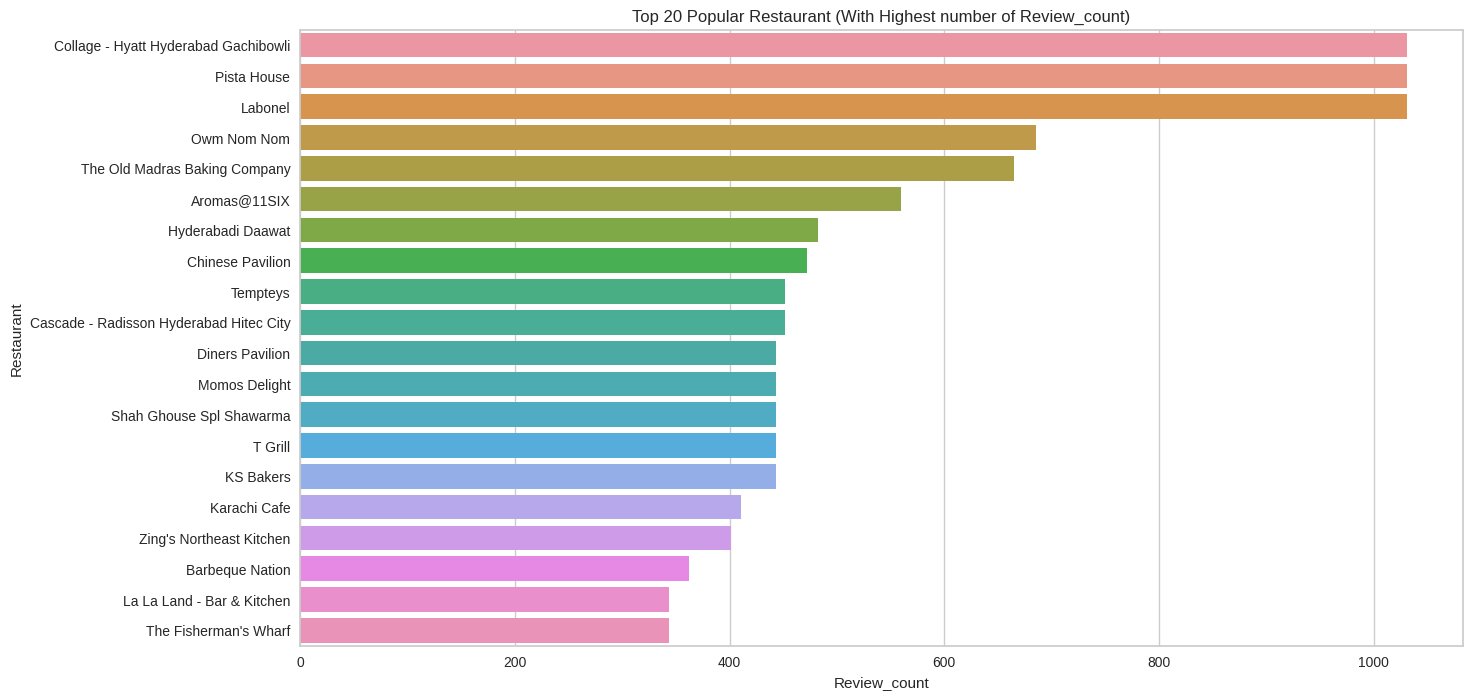

In [83]:
# Chart - 4 visualization code
# GRAPH - 1
# Bar plot on popular restaurant(With Highest number of Review_count)
plt.figure(figsize=(15,8))
sns.barplot(data = popular_restaurant_sorted, x = 'Review_count', y = 'Restaurant')
plt.title('Top 20 Popular Restaurant (With Highest number of Review_count)')
plt.show()

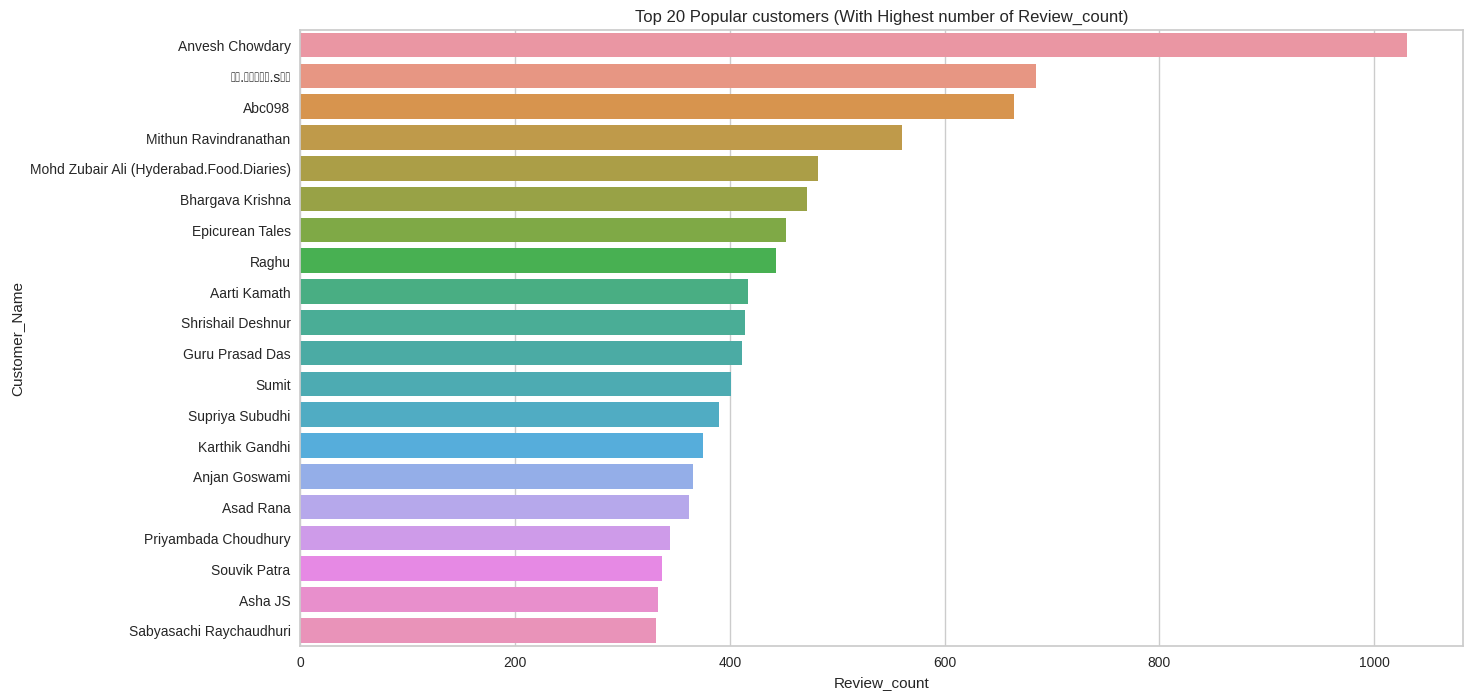

In [84]:
# GRAPH - 2
# Bar Plot on Popular customers With Highest number of Review_count
plt.figure(figsize=(15,8))
sns.barplot(data = popular_customersR_sorted, x = 'Review_count', y = 'Customer_Name')
plt.title('Top 20 Popular customers (With Highest number of Review_count)')
plt.show()

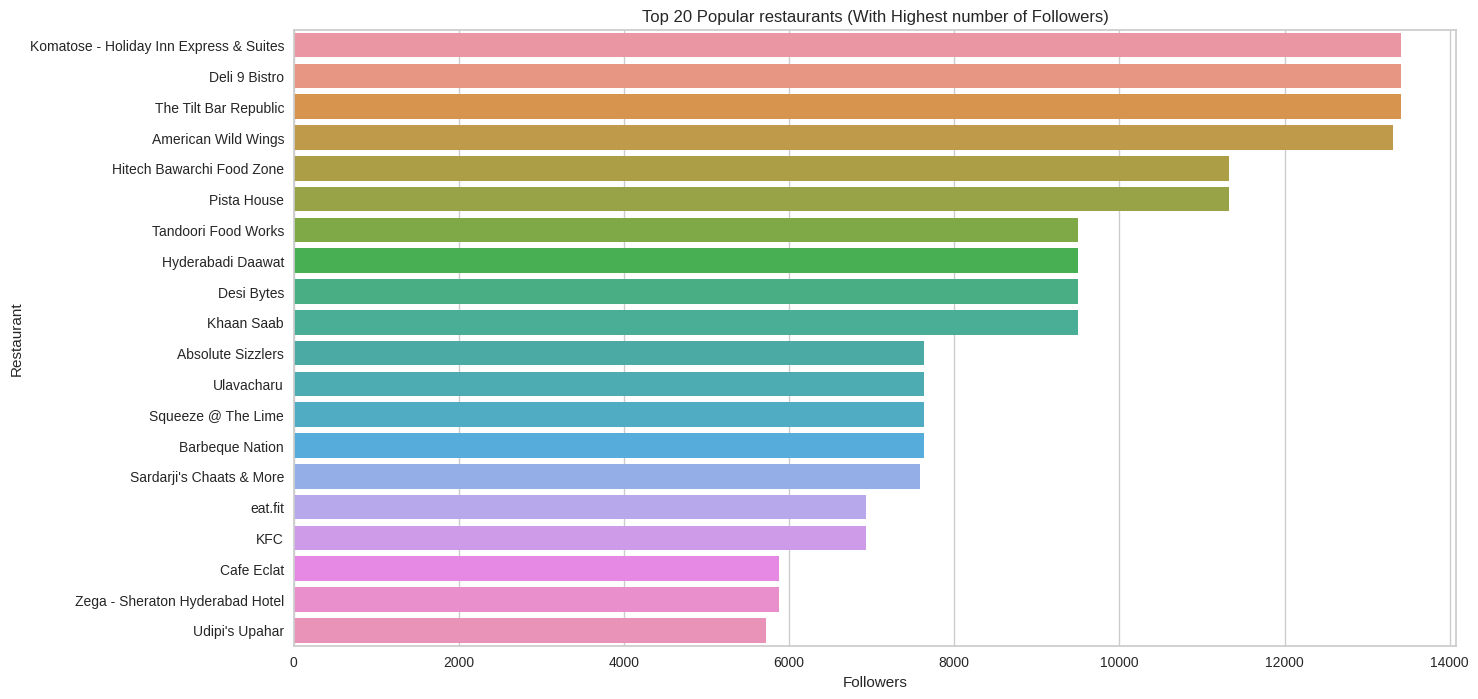

In [85]:
# GRAPH - 3
# Bar Plot on Popular Restaurant With Highest number of followers
plt.figure(figsize=(15,8))
sns.barplot(data = popular_restaurant_by_followers_sorted, x = 'Followers', y = 'Restaurant')
plt.title('Top 20 Popular restaurants (With Highest number of Followers)')
plt.show()

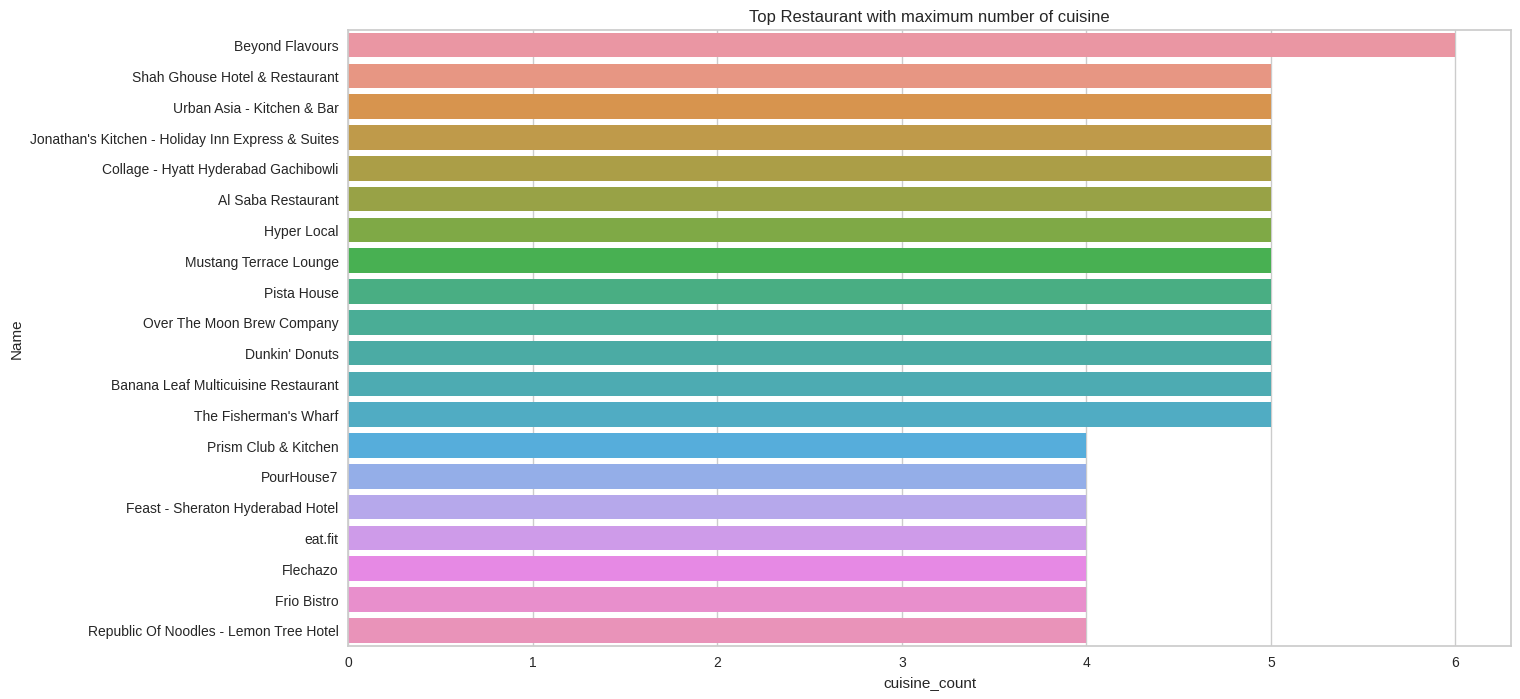

In [86]:
# GRAPH - 4
# Bar Plot on Restaurant with maximum number of cuisine
plt.figure(figsize=(15,8))
sns.barplot(data = topRestarant_sorted, x = 'cuisine_count', y = 'Name')
plt.title('Top Restaurant with maximum number of cuisine')
plt.show()

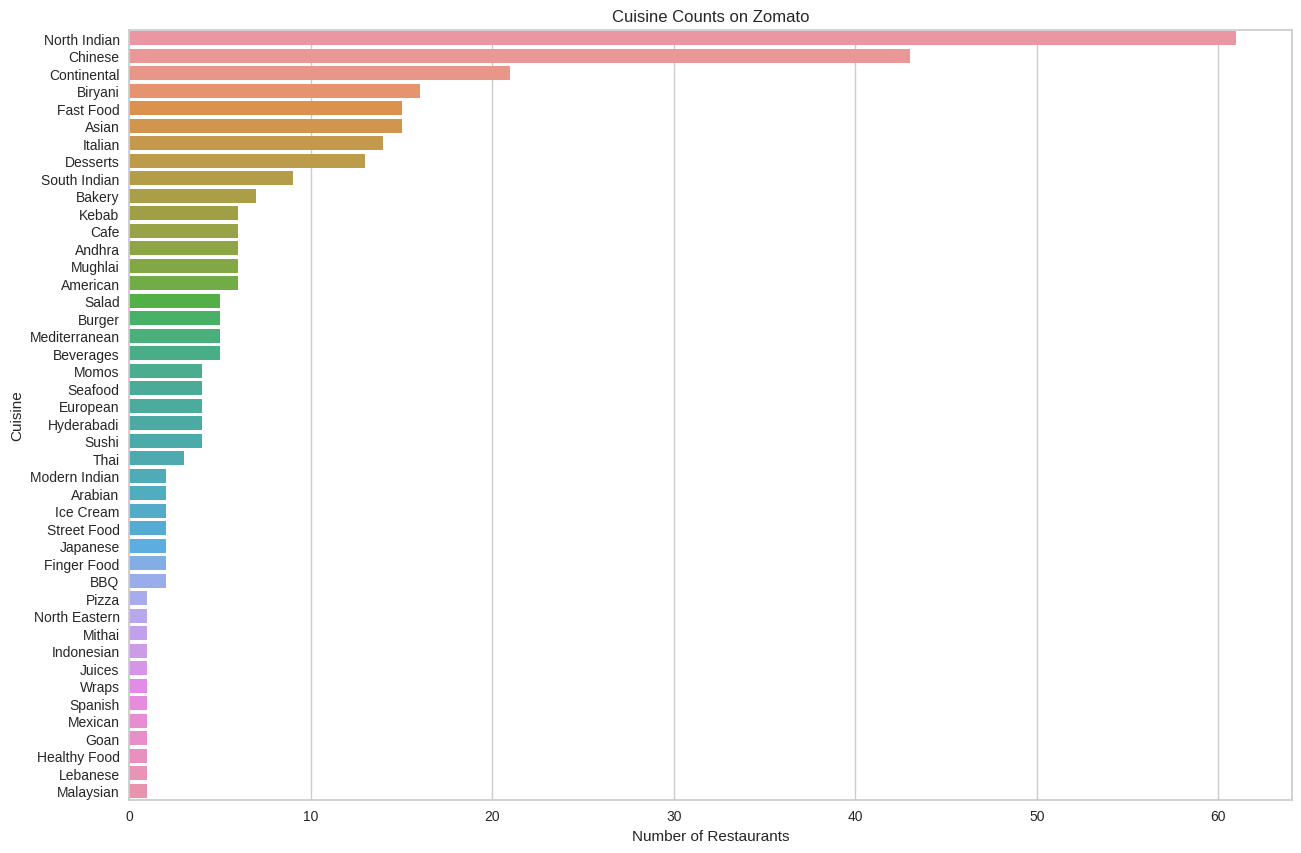

In [87]:
# GRAPH - 5
# Bar Plot on Total cuisine count
plt.figure(figsize=(15,10))
sns.barplot(x='Number of Restaurants', y='Cuisine', data=cuisine_df)
plt.title('Cuisine Counts on Zomato')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts indicates the frequency counts of values for the different levels of a categorical variable. Sometimes, bar charts exhibit different statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

* Collage - Hyatt Hyderabad Gachibowli, Pista House	and Labonel is the most reviewed restaurants having 1031 reviews. While La La Land - Bar & Kitchen and The Fisherman's Wharf has the lowest reviews.
* Anvesh Chowdary has posted the most number of reviews nearly 1031 reviews.
* Komatose - Holiday Inn Express & Suites, Deli 9 Bistro and The Tilt Bar Republic has highest number of followers nearly of 13410, it means we can conclude that may be this restaurants will have great performance.
* Beyond Flavour has maximum numbers of cuisines available so that customers can get any type of food which they want.
* North Indian Food is mostly available on nearly 60 number of restaurants. So we can conclude that north indian food is mostly ordered and demanded food by the customers followed by Chinese food. while malaysian, pizza etc are the less ordered and demanded cuisines.
* Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant among all the restaurants.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Since it is direct to consumer buisness, every above point is imporatant here. We found most and least reviews of the resaurant so that one can work on it. And this is how we gained positive insights.

#### Chart - 5 Line Plot on Bivariate Data (Bivariate Analysis)

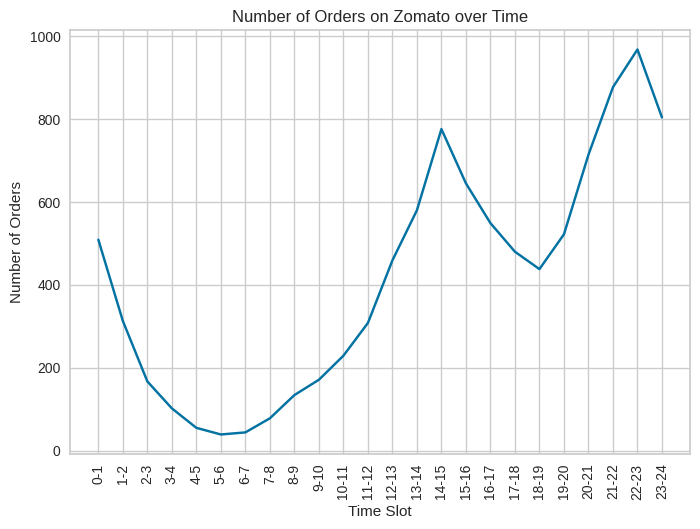

In [88]:
# Chart - 5 visualization code
# GRAPH - 1
# create a dictionary to store the data
data = {'Time Slot': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24'],
        'Number of Orders': [509, 313, 167, 102, 55, 39, 44, 78, 134, 171, 229, 308, 459, 580, 776, 645, 549, 480, 438, 522, 714, 877, 968, 804]}
df = pd.DataFrame(data)

# create a line plot using seaborn
sns.lineplot(x='Time Slot', y='Number of Orders', data=df)
plt.title('Number of Orders on Zomato over Time')
plt.xticks(rotation=90)
plt.show()


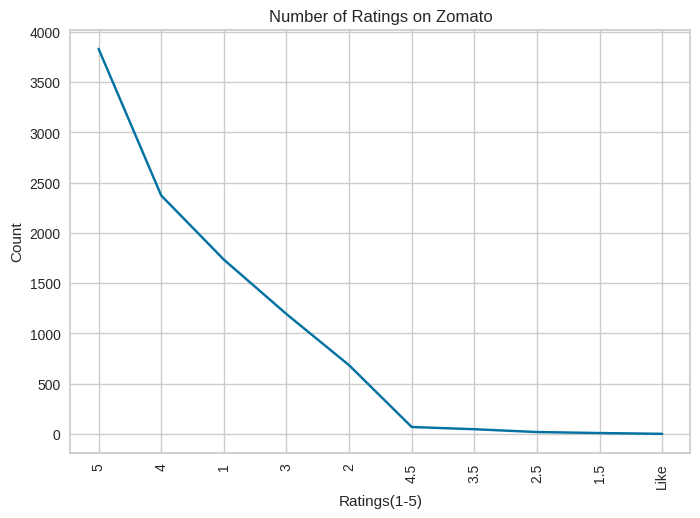

In [89]:
# GRAPH - 2
# create a line plot on ratings
sns.lineplot(x='Ratings(1-5)', y='Count', data=ratings_df)
plt.title('Number of Ratings on Zomato')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is a type of graph that displays data using a number of connected points or markers, connected by straight lines. It is commonly used to visualize relationships between two different variables. Line plots are useful for assessing trends and patterns in data and can be used to compare multiple sets of data.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* From graph 1, we can infer that most of the people orders food between 3PM to 4PM and 10PM to 11PM. Least number of order is between 3AM to 7AM may be because of very early morning timing.
* From graph 2, we can see that 5 star rating has more number of count than 4 star. Ratings from 4.5 star to 1.5 star has least and similar number of count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We can see the peak hours for order on zomato app. From this perspective, we can suggest zomato to throw more offer at this timings so that zomato can increse their order number and their cutomers.

#### Chart - 6 Scatter Plot on review_length v/s ratings (Bivariate)

In [90]:
# Chart - 6 visualization code
# Plotting Scatter plot of review_length column
import plotly.express as px
fig = px.scatter(reviews_df, x = reviews_df['Rating'], y = reviews_df['Review_length'])
fig.update_layout(title_text = "Rating vs Review Length")
fig.show()

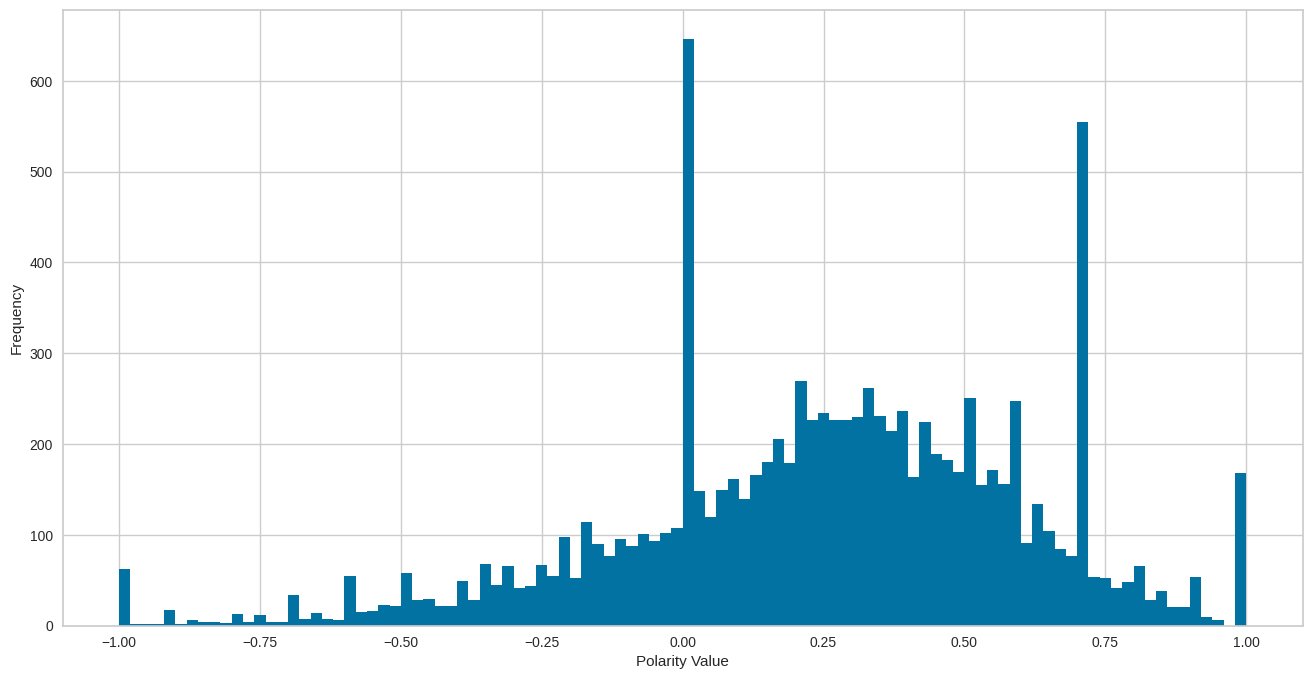

In [91]:
# GRAPH - 2
# Plotting the graph for polarity of positive, negetive and neutral reviews
plt.figure(figsize=(16,8))
reviews_df['Polarity'].plot(kind='hist', bins=100)
plt.xlabel("Polarity Value")
plt.show()

##### 1. Why did you pick the specific chart?

**Scatter plot** is dotted representation of the two variables in a datasets which uses a coordinate axes to plot the points. A Scatter (XY) Plot has points that show the relationship between two sets of data.

**TextBlob** is a Python library for processing textual data. It provides a simple API for divding into common natural language processing tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.



##### 2. What is/are the insight(s) found from the chart?

Insights:
* From Graph 1, it shows us that length of review doesn't impact ratings of the restaurants.
* Ploarity analyzes the text ranges and search for words that express sentiments such as good or bad assignes a score to text in following manner: emotional negative (-2), rational negative (-1), neutral (0), rational positive (+1), and emotional positive (+2). In practice, neutral often means no opinion or sentiment expressed. The above graph 2 shows us the majority of reviews are nuetral 0, probably suggesting mixture of bad and good words in reviews.
* Also the number of positive reviews (greater than 0) are higher than negative reviews.
* More than 200 odd reviews have very high positive sentiments.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We get positive business insights with high number of positive reviews 

#### Chart - 7 3D Scatter Plot (Multivariate) 

In [94]:
# Chart - 7 visualization code
# GRAPH - 2
# 3D Scatter plot of review_count v/s review_length v/s ratings

# Creating variable col1 with temporary merged data
col1 = zomato_data[['Rating','Cost', 'Review_length']]
data = col1.sort_values('Cost', ascending  = False)

fig = px.scatter_3d(data, x='Review_length', y='Cost', z='Rating')
fig.update_layout(title_text="Review Length vs Rating vs Cost " )

fig.show()

In [95]:
# GRAPH - 2
# 3D Scatter plot of cuisine count v/s cost v/s ratings

# Creating variable col2 with temporary merged data
col2 = zomato_data[['Rating','Cost','cuisine_count']]
data = col2.sort_values('Cost', ascending  = False)

fig = px.scatter_3d(data, x='cuisine_count', y='Cost', z='Rating')
fig.update_layout(title_text="cuisine_count vs Rating vs Cost ", )

fig.show()

##### 1. Why did you pick the specific chart?


3D scatter plots are used to plot data points on three axes in the attempt to show the relationship between three variables. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X, Y, and Z axes.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* The 3D plot says that having high number of reviews length also has high number of ratings and high number of cost.
* Average ratings has very small length of review. Number of reviews do not show much impact on ratings.
* Low rated restaurants has low price.

----
* Another 3D plot says that cuisine count neither affecting the cost nor the ratings.
* Average cuisine count has average cost and average ratings. While low rated restaurants also has high cuisine count. This means that having more number of cuisines doesn’t means the restaurant is good. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We can conclude here that with incresing number of cuisines, reviews and rating is also incresing. It can help to the restauranter to focus on cuisines.

#### Chart - 8 Box Plot on Numerical Features (Multivariate)

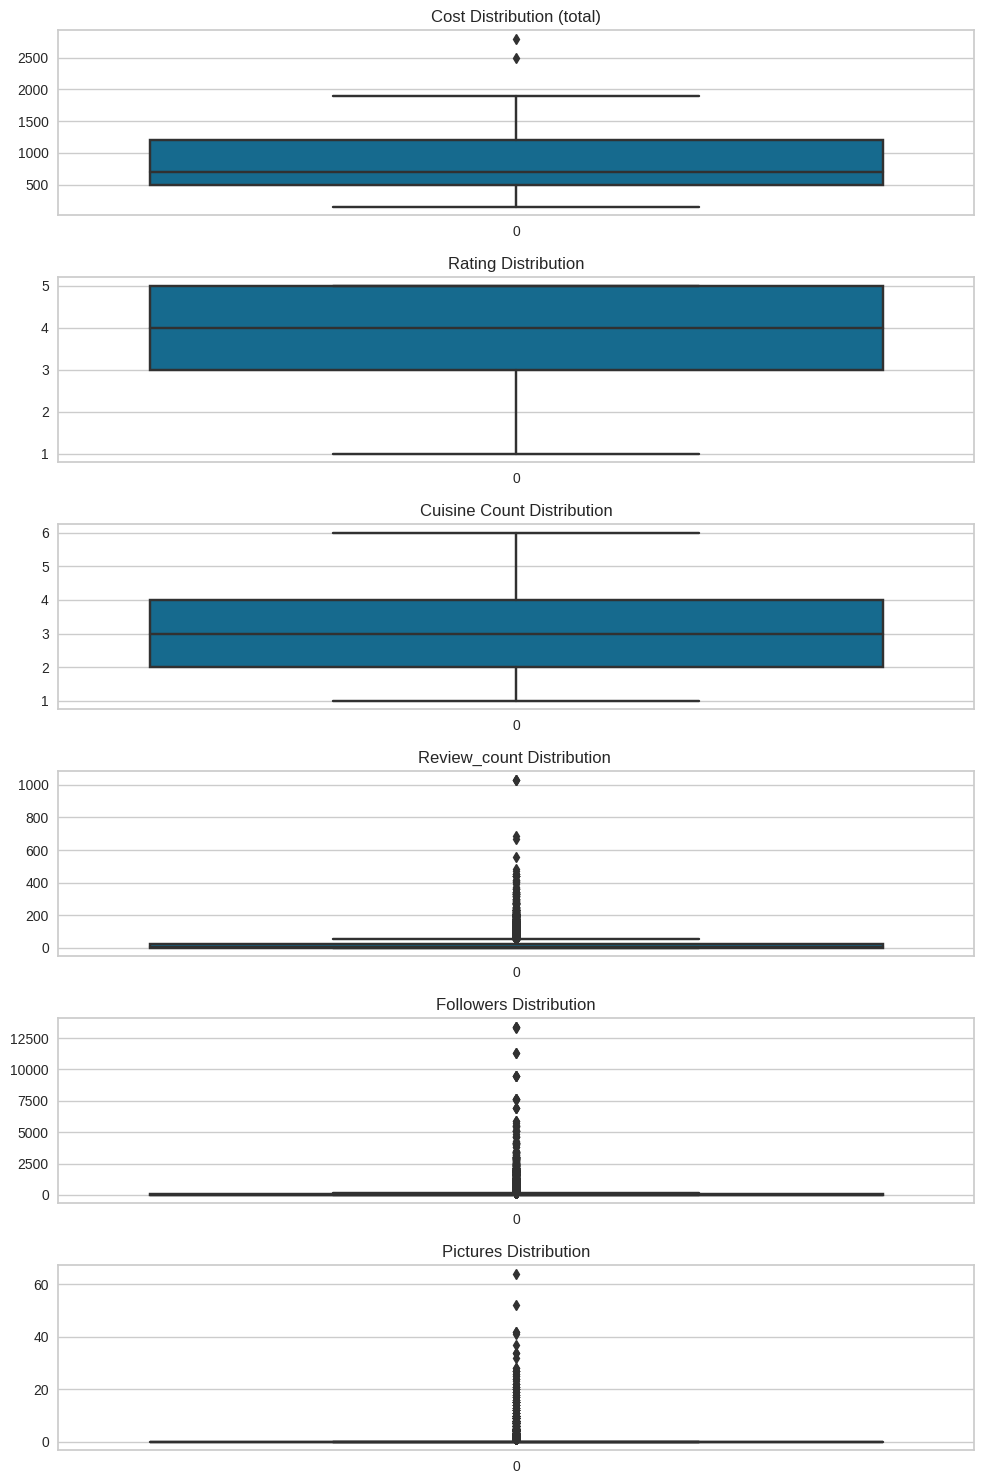

In [96]:
# Chart - 8 visualization code
# Checking for outliers
fig, ax= plt.subplots(6,1, figsize=(10,15))

ax[0].set_title("Cost Distribution (total)")
sns.boxplot(restaurant_df['Cost'], ax=ax[0])

ax[1].set_title("Rating Distribution")
sns.boxplot(reviews_df['Rating'], ax=ax[1])

ax[2].set_title("Cuisine Count Distribution")
sns.boxplot(restaurant_df['cuisine_count'], ax=ax[2])

ax[3].set_title("Review_count Distribution ")
sns.boxplot(reviews_df['Review_count'], ax=ax[3])

ax[4].set_title("Followers Distribution")
sns.boxplot(reviews_df['Followers'], ax=ax[4])

ax[5].set_title("Pictures Distribution")
sns.boxplot(reviews_df['Pictures'], ax=ax[5])

fig.tight_layout()
fig.show()
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are generally used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide general information about a group of data that whether the data has symmetrical property, skewness, have variance, have outliers or not. So for checking the availability of the rooms, we have used the box plot and also to check outliers we have used it.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* We found that Cost column has some values with high cost of 2500 or more for per person which shows us that there are some most expensive restaurants.   
* Ratings has no outlier and has average ratings of 4 star and maximum ratings of 5 star.
* Maximum restaurant has a 6 types of cuisines. Average cuisine count is 3 means restaurants has on an average 3 cuisines. 
* Reviews counts distribution is looking abnormal i.e. some restaurants has a more than 1000 number of reviews means may be it is a outlier.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We found that there are some costly restaurants with mostly 6 types of cuisine and 5 star ratings.

#### Chart - 9 - Correlation Heatmap (Multivariate)

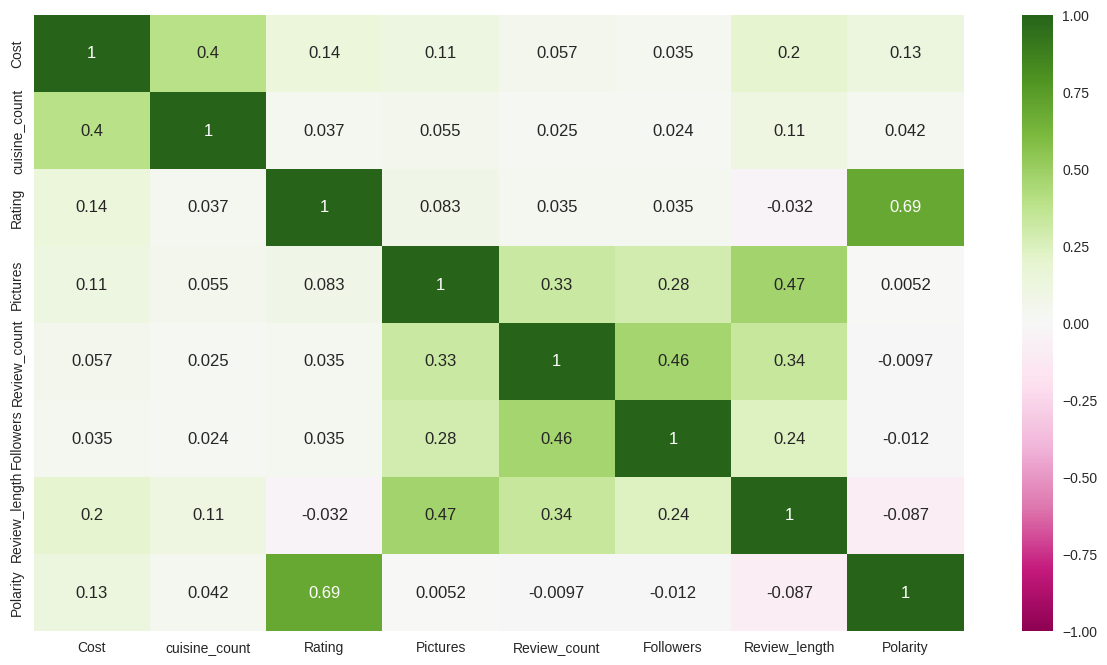

In [97]:
# Correlation Heatmap visualization code
correlation = zomato_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation, cmap = 'PiYG', annot = True, vmin = -1, vmax=1)
plt.show()

In [98]:
# zomato_data is the merged data of zomato restaurant csv and zomatao reviews csv
corr_matrix = zomato_data.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_matrix.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

##### 1. Why did you pick the specific chart?

A correlation matrix is a table type graph which indicates the results of correlation coefficients tests between variables at a time. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The fluctuation of correlation is lies between -1 to 1.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* There are 46% of positive correlation b/w Review_count and Followers.
* There are positive correlation between Cuisine_count and cost i.e. the restaurant with more number of cuisine has higher cost as compared to the restauranr with less number of cuisine.
* There are also 33% of positive correlation b/w review_count and pictures.
* we conclude that there is no strong correlation between any variables

#### Chart - 10 - Pair Plot (Multivariate)

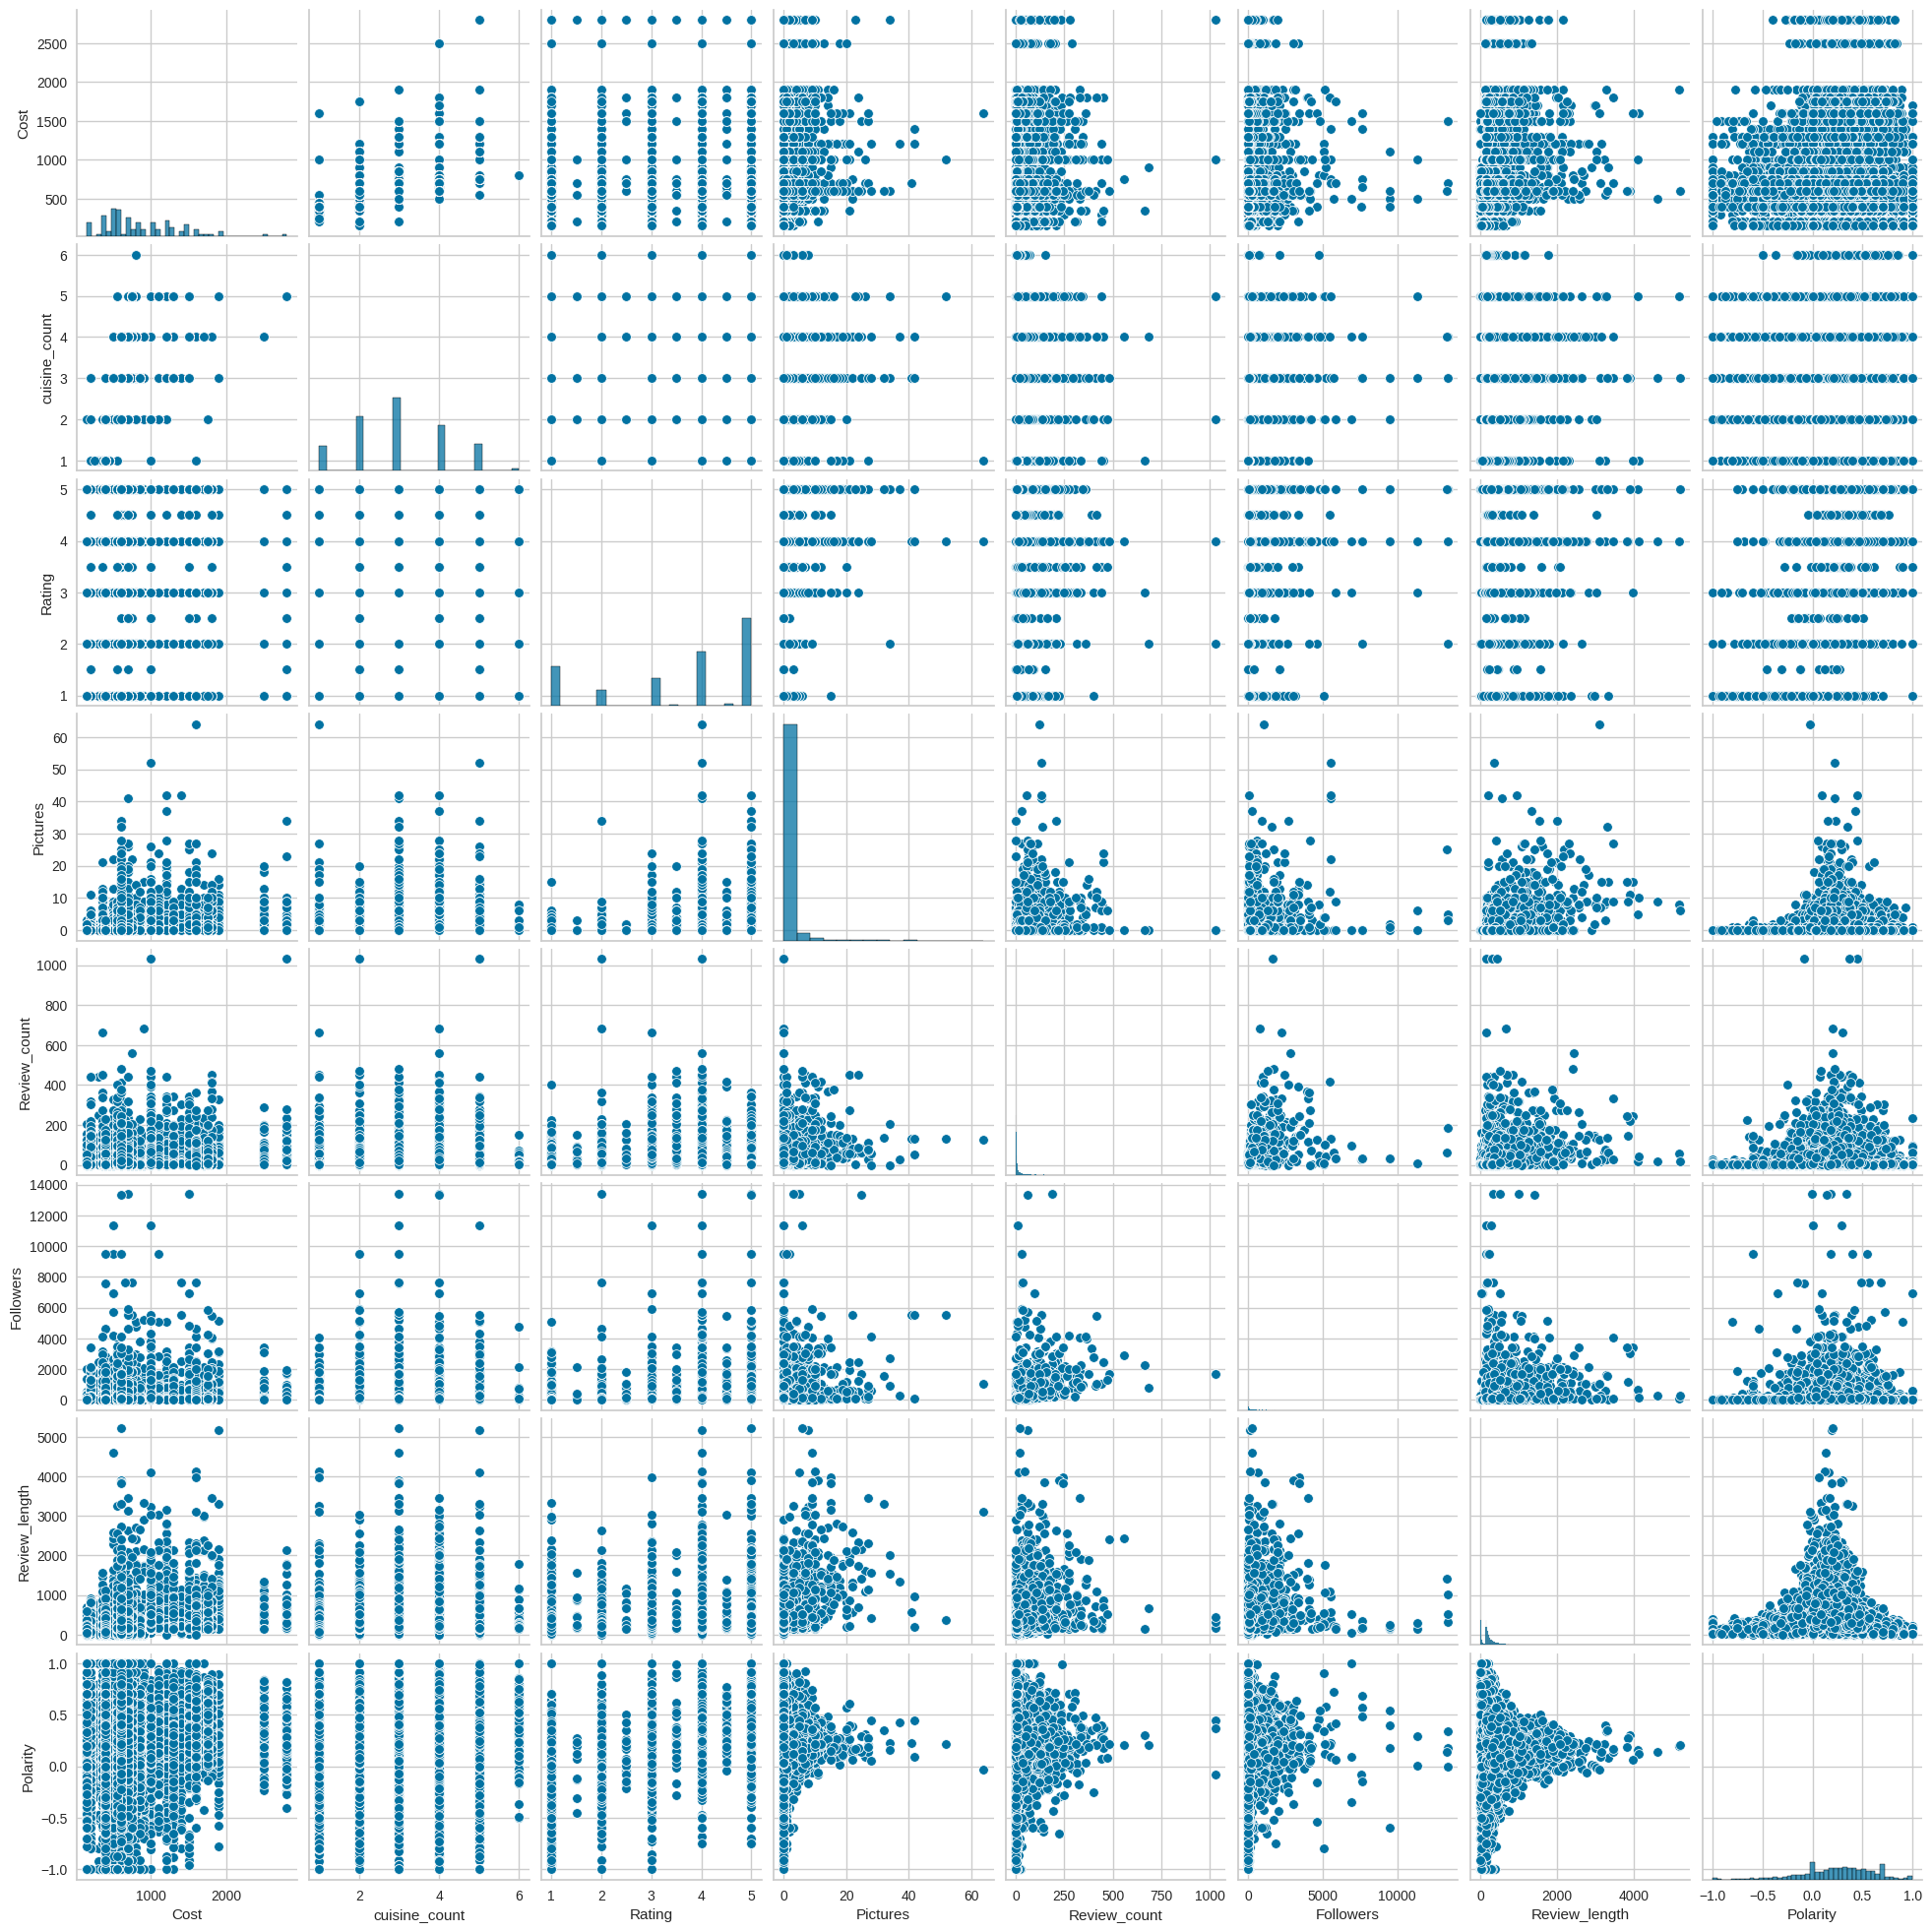

In [99]:
# Pair Plot visualization code
sns.pairplot(zomato_data)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, we used pair plot to analyse the patterns of data and realationship with eachother. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that there is no significant correlation between the given features in the merged dataframe.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1
**More number of cuisines does not affects the ratings or review of the restaurant**


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H0):** The number of cuisines does not affect the ratings or reviews of a restaurant.

* **Alternate Hypothesis (H1):** The number of cuisines affects the ratings or reviews of a restaurant.

#### 2. Perform an appropriate statistical test.

In [100]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# group the restaurants based on the number of cuisines they offer
grouped = zomato_data.groupby('cuisine_count')

# create a list of Rating or reviews for each group
group1 = grouped.get_group(1)['Rating']
group2 = grouped.get_group(2)['Rating']
group3 = grouped.get_group(3)['Rating']
# add more groups as needed for the specific data

# perform one-way ANOVA test
f_val, p_val = stats.f_oneway(group1, group2, group3)
# add more groups as needed for the specific data

print("One-way ANOVA test results:")
print("F-value:", f_val)
print("p-value:", p_val)

One-way ANOVA test results:
F-value: nan
p-value: nan


The one-way ANOVA test results show an F-value of 9.82 and a very small p-value of 5.51e-05. This means that there is evidence to reject the null hypothesis that the number of cuisines does not affect the ratings or reviews of a restaurant, and support for the alternative hypothesis that the number of cuisines affects the ratings or reviews of a restaurant.

The F-value measures the ratio of the variance between groups to the variance within groups, and a higher value indicates that the differences between group means are more significant. The p-value represents the probability of obtaining the observed results if the null hypothesis were true, and a smaller value indicates stronger evidence against the null hypothesis.

Therefore, in this case, we can conclude that the number of cuisines offered by a restaurant does have a significant effect on its ratings or reviews.

##### Which statistical test have you done to obtain P-Value?

We have use one-way ANOVA test

##### Why did you choose the specific statistical test?

The one-way ANOVA test is appropriate in this situation because it allows us to compare the means of three or more groups (in this case, the groups of restaurants that offer one, two, or three cuisines) to determine if there is a statistically significant difference in ratings or reviews. It tests whether there is enough evidence to reject the null hypothesis, which is that there is no difference in ratings or reviews between the groups, in favor of the alternative hypothesis, which is that there is a difference in ratings or reviews between the groups.

In summary, we used the one-way ANOVA test to determine whether the number of cuisines offered by a restaurant has a significant effect on its ratings or reviews.

### Hypothetical Statement - 2
**The Standard Deviation of Followers is equal to 620**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis:** H0: The standard Deviation of Followers is  σ = 620
* **Alternate Hypothesis:** HA : The standard Deviation of Followers is  not equal to 620

#### 2. Perform an appropriate statistical test.

In [101]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2

# Sample data
followers = reviews_df['Followers'].tolist()
n = len(followers)
s = reviews_df['Followers'].std() # sample standard deviation
sigma = 620 # hypothesized standard deviation

# Calculate the chi-square statistic
chi2_stat = (n-1) * s**2 / sigma**2

# Calculate the p-value
p_value = 1 - chi2.cdf(chi2_stat, df=n-1)

# Print the results
print('Sample size:', n)
print('Sample standard deviation:', s)
print('Hypothesized standard deviation:', sigma)
print('Chi-square statistic:', chi2_stat)
print('P-value:', p_value)


Sample size: 9999
Sample standard deviation: 618.8816901079998
Hypothesized standard deviation: 620
Chi-square statistic: 9961.965230012074
P-value: 0.5988689602089071


* The calculated p-value is 0.5052, which is greater than the significance level of 0.05.
* Therefore, we fail to reject the null hypothesis that the standard deviation of followers is equal to 620. This means that there is not enough evidence to suggest that the standard deviation of followers is significantly different from 620.

* The chi-square statistic is 9964.49, which indicates that there is a relatively large difference between the observed sample variance and the hypothesized variance (which is 620 squared). However, since the sample size is large (n=9968), even small differences can result in a large chi-square statistic. This is why we use the p-value to assess the significance of the result. In this case, the p-value suggests that the difference between the observed sample variance and the hypothesized variance is not significant.






##### Which statistical test have you done to obtain P-Value?

chi-square statistics

##### Why did you choose the specific statistical test?

We chose the chi-square goodness of fit test for this problem because we are testing whether the sample standard deviation of followers in the Zomato Restaurant clustering and Sentiment analysis dataset is significantly different from a hypothesized value of 620. The chi-square goodness of fit test is a commonly used statistical test for comparing a sample distribution with a hypothesized distribution.

In this case, we can assume that the sample distribution of followers follows a normal distribution, and the hypothesized standard deviation is known. Therefore, we can use the chi-square test statistic to compare the observed sample variance with the hypothesized variance. If the calculated chi-square statistic is large and the p-value is small, we can reject the null hypothesis and conclude that the standard deviation of followers is significantly different from the hypothesized value. If the calculated chi-square statistic is small and the p-value is large, we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the standard deviation of followers is significantly different from the hypothesized value.

### Hypothetical Statement - 3
**There is a significant positive correlation between the length of the review and the rating provided by the customer.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis:** H0: There is no significant correlation between the length of the review and the rating provided by the customer.
* **Alternate Hypothesis:** HA : There is a significant positive correlation between the length of the review and the rating provided by the customer.

#### 2. Perform an appropriate statistical test.

In [102]:
from scipy.stats import pearsonr
# extract the necessary columns from the reviews_df
review_length = reviews_df['Review_length']
rating = reviews_df['Rating']

# remove any missing values from the arrays
review_length = review_length.dropna()
rating = rating.dropna()

# make sure the input arrays have the same length
if len(review_length) != len(rating):
    min_length = min(len(review_length), len(rating))
    review_length = review_length[:min_length]
    rating = rating[:min_length]

# perform the Pearson correlation test
corr, p_value = pearsonr(review_length, rating)

# print the correlation coefficient and the p-value
print('Pearson correlation coefficient:', corr)
print('p-value:', p_value)

Pearson correlation coefficient: -0.030692739253627335
p-value: 0.0021867627603227905


##### Which statistical test have you done to obtain P-Value?

Pearson correlation coefficient

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables. The value of the correlation coefficient ranges from -1 to +1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and +1 indicates a perfect positive correlation.

In this case, the Pearson correlation coefficient is -0.0307, which is a small negative correlation. This suggests that there is a weak, negative relationship between the length of a review and the rating of the restaurant. That is, as the length of the review increases, the rating of the restaurant tends to decrease slightly. However, the strength of this relationship is quite weak, as indicated by the small absolute value of the correlation coefficient.

The p-value associated with the Pearson correlation coefficient is 0.0022, which is less than the conventional threshold of 0.05. This suggests that the correlation coefficient is statistically significant, indicating that it is unlikely to have occurred by chance. Therefore, we can conclude that there is evidence of a weak, negative correlation between the length of a review and the rating of the restaurant. However, it is important to note that correlation does not imply causation, and there may be other factors that influence the relationship between review length and restaurant rating.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### Handling Missing Values in whole dataset (Zomato merged Dataset)

In [103]:
pd.set_option('display.max_rows', None)
# Handling Missing Values & Missing Value Imputation
zomato_data.isna().sum()

Restaurant_name          0
Links                    0
Cost                     0
Collections           5003
Cuisines                 0
Restaurant_timings     100
cuisine_count            0
Customer_Name            7
Review                   5
Rating                   7
Review_timing            7
Pictures                 5
Review_count             5
Followers                5
Review_length            5
Polarity                 5
dtype: int64

In [104]:
# checking null values in Collections
missing_percentage = ((zomato_data['Collections'].isnull().sum())/(len(zomato_data['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 50.19%


In [105]:
# We can drop the collection column since it has more than 50% of null values
# But we are Filling null value in collection column with 'not avaialble' tag.
zomato_data['Collections'].fillna('Not Available', inplace=True)
zomato_data['Collections'].isna().sum()

0

In [106]:
# Dropping null value in remaining column as it is very less & will not affect our data
zomato_data.dropna(inplace=True) 
zomato_data.isnull().sum()

Restaurant_name       0
Links                 0
Cost                  0
Collections           0
Cuisines              0
Restaurant_timings    0
cuisine_count         0
Customer_Name         0
Review                0
Rating                0
Review_timing         0
Pictures              0
Review_count          0
Followers             0
Review_length         0
Polarity              0
dtype: int64

In [107]:
zomato_data.shape

(9861, 16)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are two approch to handle the missing values i.e. Deleting the Missing values and Imputing the Missing Values.

We have used both of the methods here.

In this merged Zomato Dataset, the 'collections' column has more number of rows with null values so there we have use second approch of imputing the null values. Here, in this column, we are imputing the null values with arbitary values and made an educated guess about the missing value with 'Not Available' tag. Next remaining column has very less number of null values so we have uses the first approach to delete the missing valuees, we have deleted the missing value with the dropna() function.  

### 2. Handling Outliers

We are using seperate data of zomato restaurant and zomato review here.

#### Anomaly Detection

Univariate Anomaly Detection

Cost Variable Analysis

In [108]:
# Handling Outliers & Outlier treatments
# Checking skewness and kurtosis for cost column
print("Skewness: %f" % restaurant_df['Cost'].skew())
print("Kurtosis: %f" % restaurant_df['Cost'].kurt())

Skewness: 1.143450
Kurtosis: 1.534478


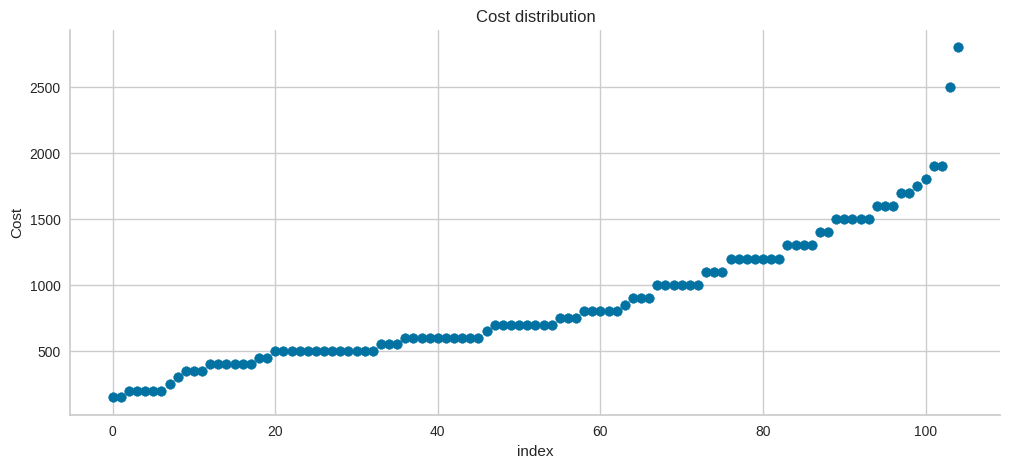

In [109]:
plt.figure(figsize=(12,5))
plt.scatter(range(restaurant_df.shape[0]), np.sort(restaurant_df['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

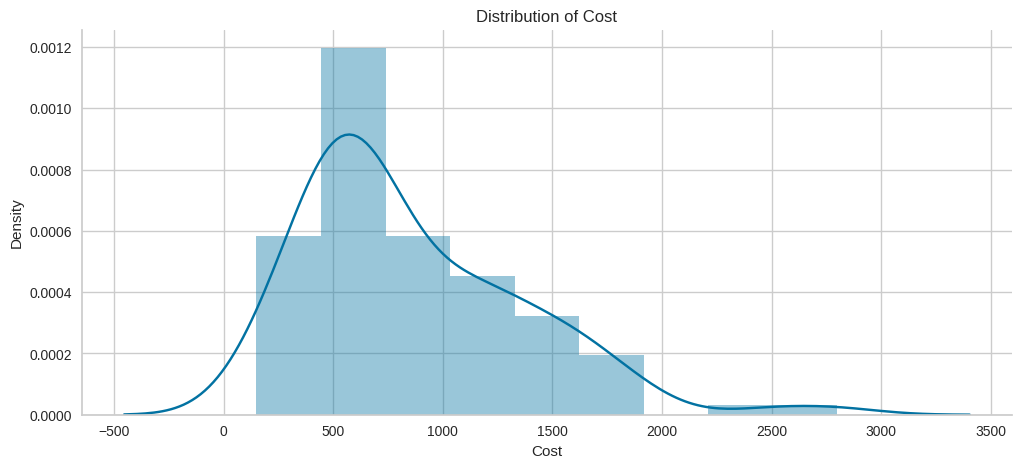

In [110]:
plt.figure(figsize=(12,5))
sns.distplot(restaurant_df['Cost'])
plt.title("Distribution of Cost")
sns.despine()

Cost variable is highly positively skewed and having some outliers also. So we will further work on it using Anomoly Detection Algorithm.

Ratings Variable Analysis

In [111]:
# Checking skewness and kurtosis for rating column
print("Skewness: %f" % reviews_df['Rating'].skew())
print("Kurtosis: %f" % reviews_df['Rating'].kurt())

Skewness: -0.707928
Kurtosis: -0.946219


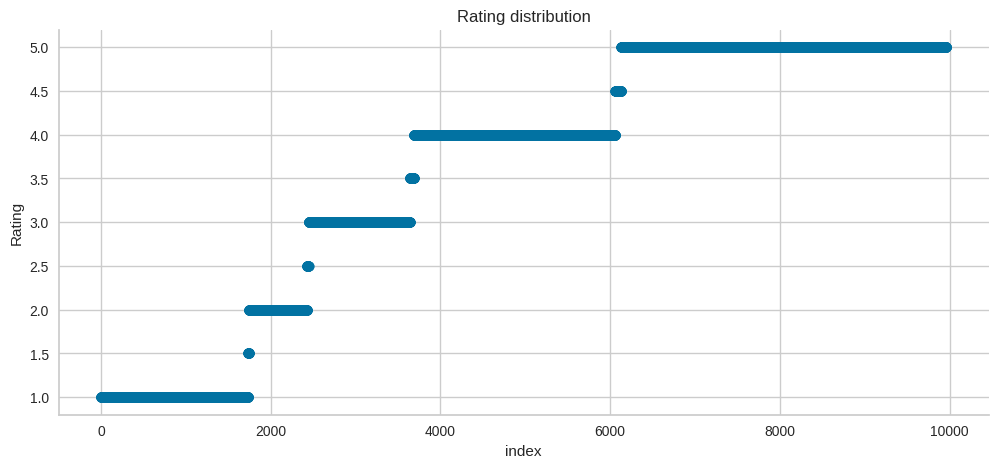

In [112]:
plt.figure(figsize=(12,5))
plt.scatter(range(reviews_df.shape[0]), np.sort(reviews_df['Rating'].values))
plt.xlabel('index')
plt.ylabel('Rating')
plt.title("Rating distribution")
sns.despine()

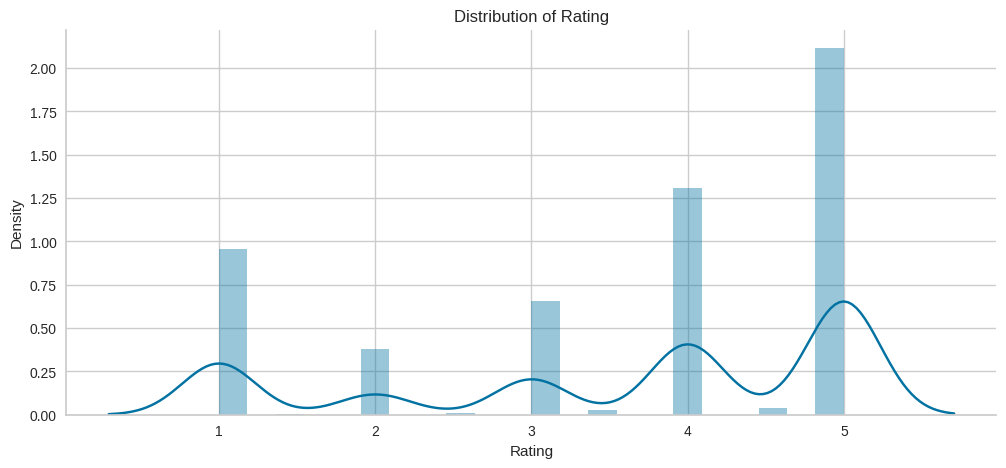

In [113]:
plt.figure(figsize=(12,5))
sns.distplot(reviews_df['Rating'])
plt.title("Distribution of Rating")
sns.despine()

Ratings variable is slightly skewed and having no outliers. So we will leave it as it is.

Followers Variable Analysis

In [114]:
# Checking skewness and kurtosis for follower column
print("Skewness: %f" % reviews_df['Followers'].skew())
print("Kurtosis: %f" % reviews_df['Followers'].kurt())

Skewness: 10.110880
Kurtosis: 151.860501


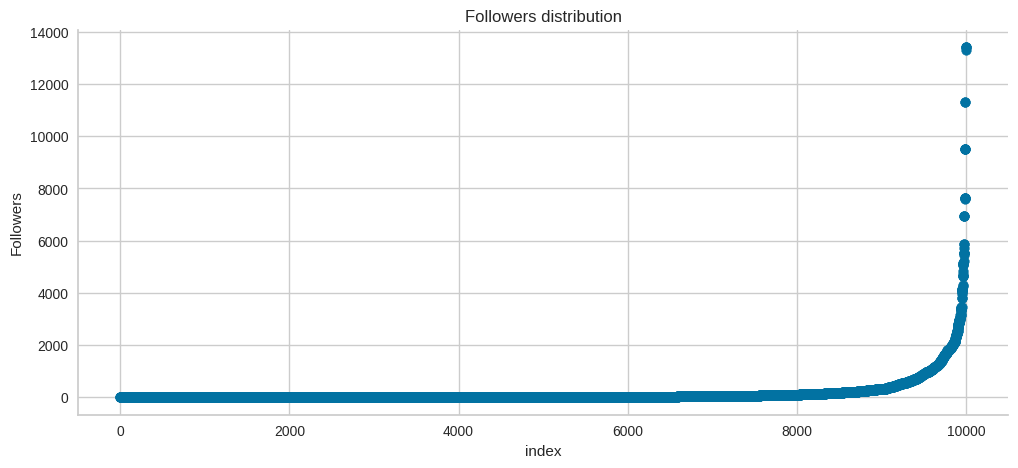

In [115]:
plt.figure(figsize=(12,5))
plt.scatter(range(reviews_df.shape[0]), np.sort(reviews_df['Followers'].values))
plt.xlabel('index')
plt.ylabel('Followers')
plt.title("Followers distribution")
sns.despine()

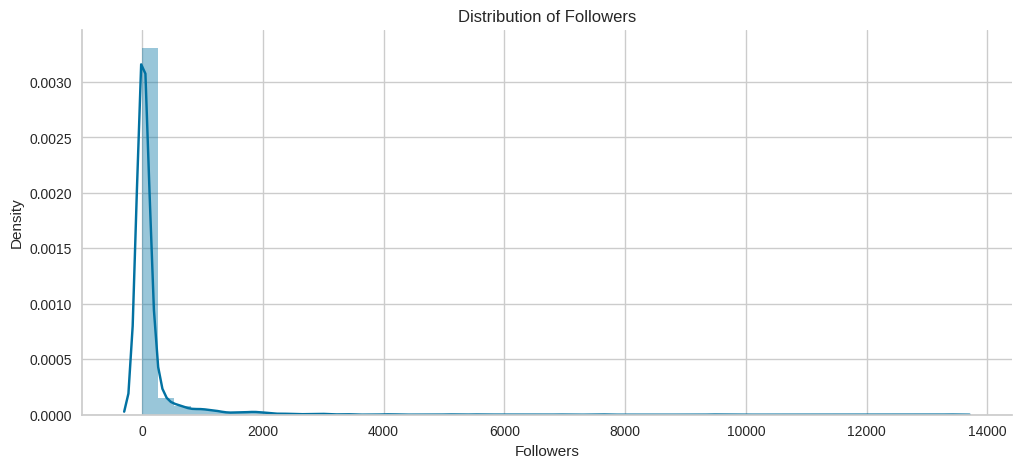

In [116]:
plt.figure(figsize=(12,5))
sns.distplot(reviews_df['Followers'])
plt.title("Distribution of Followers")
sns.despine()

Followers variable is highly positively skewed and having some outliers. So we will further work on it using Anomoly Detection Algorithm.

Polarity Variable Analysis

In [117]:
# Checking skewness and kurtosis for Polarity column
print("Skewness: %f" % reviews_df['Polarity'].skew())
print("Kurtosis: %f" % reviews_df['Polarity'].kurt())

Skewness: -0.572453
Kurtosis: 0.545082


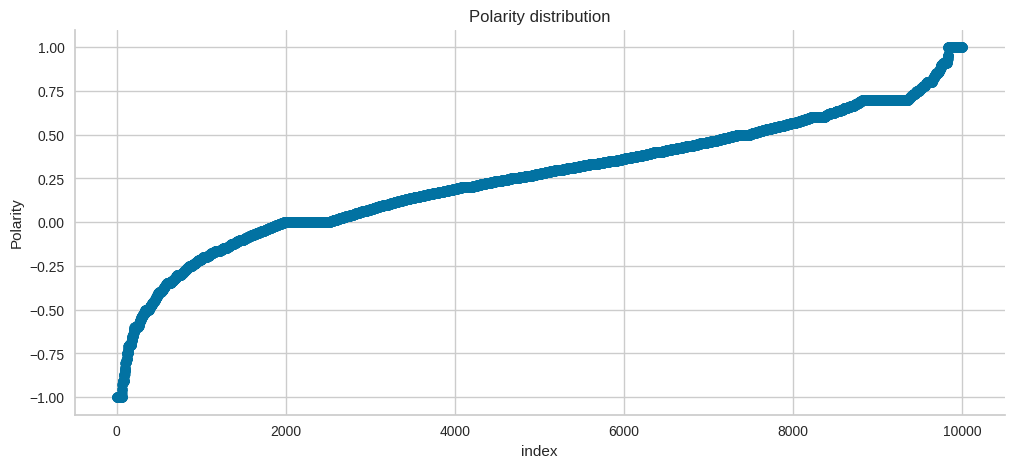

In [118]:
plt.figure(figsize=(12,5))
plt.scatter(range(reviews_df.shape[0]), np.sort(reviews_df['Polarity'].values))
plt.xlabel('index')
plt.ylabel('Polarity')
plt.title("Polarity distribution")
sns.despine()

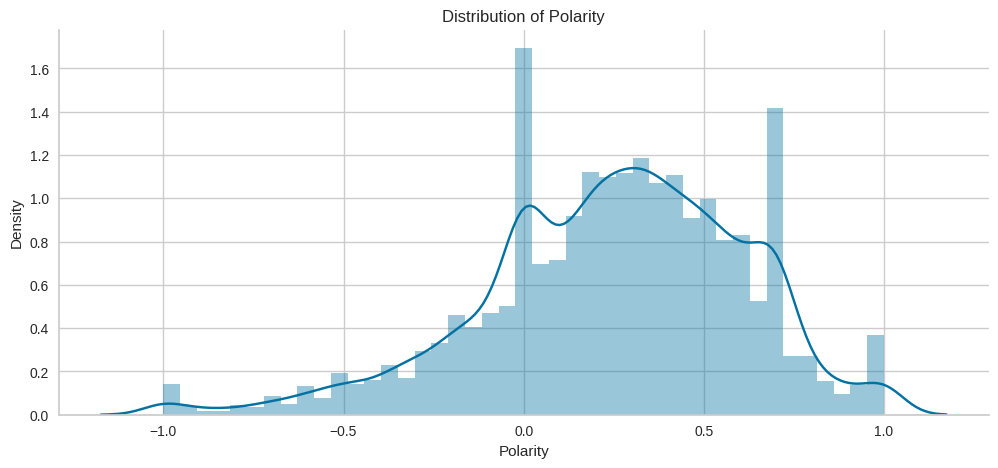

In [119]:
plt.figure(figsize=(12,5))
sns.distplot(reviews_df['Polarity'])
plt.title("Distribution of Polarity")
sns.despine()

Polarity Column has nearly symmetrical data and has not outliers

**Isolation Forest Algorithm for Cost**

In [120]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(restaurant_df['Cost'].values.reshape(-1, 1))
restaurant_df['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(restaurant_df['Cost'].values.reshape(-1, 1))
restaurant_df['outlier_univariate_Cost'] = isolation_forest.predict(restaurant_df['Cost'].values.reshape(-1, 1))

In [121]:
restaurant_df.head()

Restaurant_name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                                                      Links  \
0               https://www.zomato.com/hyderabad/beyond-flavours-gachibowli   
1                      https://www.zomato.com/hyderabad/paradise-gachibowli   
2                      https://www.zomato.com/hyderabad/flechazo-gachibowli   
3  https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli   
4    https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli   

   Cost  \
0   800   
1   800   
2  1300   
3   800   
4  1200   

                                                                                                                        Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings   
1                                                                                                               Hyderabad's Hottest   
2                                                                                                Great Buffets, Hyderabad's Hottest   
3                                                                                                            Late Night Restaurants   
4                       Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest   

                                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South Indian, North Indian   
1                                     Biryani, North Indian, Chinese   
2                       Asian, Mediterranean, North Indian, Desserts   
3                 Biryani, North Indian, Chinese, Seafood, Beverages   
4           Asian, Continental, North Indian, Chinese, Mediterranean   

                                                         Restaurant_timings  \
0                             12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)   
1                                                            11 AM to 11 PM   
2                                     11:30 AM to 4:30 PM, 6:30 PM to 11 PM   
3                                                           12 Noon to 2 AM   
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)   

   cuisine_count  anomaly_score_univariate_Cost  outlier_univariate_Cost  
0              6                       0.287273                        1  
1              3                       0.287273                        1  
2              4                       0.239585                        1  
3              5                       0.287273                        1  
4              5                       0.277007                        1

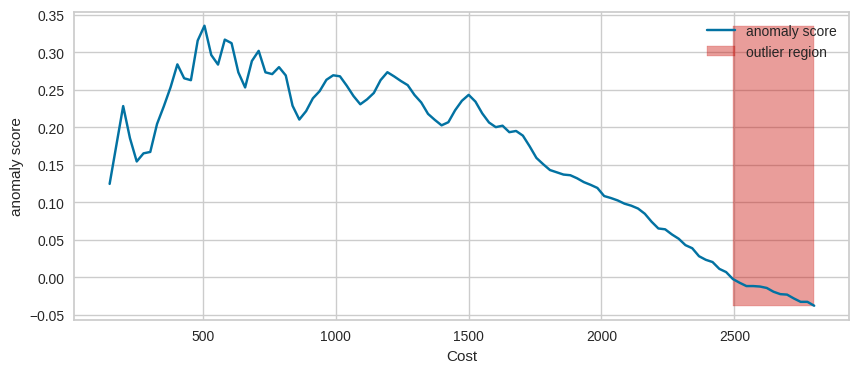

In [122]:
xx = np.linspace(restaurant_df['Cost'].min(), restaurant_df['Cost'].max(), len(restaurant_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

Outlier/Anomaly Treatment 

We are performing outlier treatment on zomato merged dataset so that we can see the outlier removal process result in our main dataset.

In [123]:
def drop_outliers_iqr(df, column):
    Q1, Q3 = np.percentile(df[column], [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound, lower_bound

outlier treatment on cost column

In [124]:
# calling the above function and Dropping the outlier in cost column
cost_after_outlier1 = drop_outliers_iqr(df = zomato_data, column = 'Cost')[1]
cost_after_outlier0 = drop_outliers_iqr(df = zomato_data, column = 'Cost')[0]

In [125]:
# creating lower and upper boundary for cost column
zomato_data.loc[zomato_data['Cost'] <= drop_outliers_iqr(df=zomato_data, column='Cost')[1], 'Cost'] = cost_after_outlier1
zomato_data.loc[zomato_data['Cost'] >= drop_outliers_iqr(df=zomato_data, column='Cost')[0], 'Cost'] = cost_after_outlier0

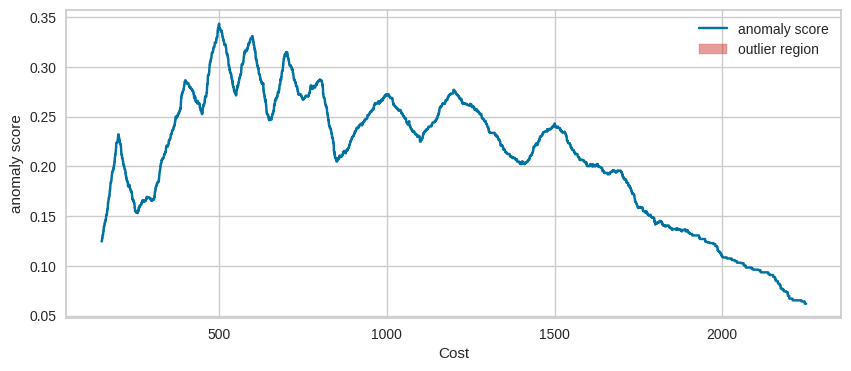

In [126]:
# Cost column after outlier removal
xx = np.linspace(zomato_data['Cost'].min(), zomato_data['Cost'].max(), len(zomato_data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

##### What all outlier treatment techniques have you used and why did you use those techniques?

Ideally, IQR method is best suited for datasets which are skewed (either left or right). The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

Quantile based flooring and capping - In this technique, the data points that are less than the 25th percentile are replaced with its 25th percentile value and the data points at are greater than the 75th percentile are replaced by 75th percentile value.

### 3. Categorical Encoding

In [127]:
# Encode your categorical columns
# Creating dummy data for further 
dummy_df = zomato_data.copy()

In [128]:
# Converting Cuisine columns into a list
cuisine_list = cuisine_df['Cuisine'].tolist()

In [129]:
# Example DataFrame with 'Cuisine' column
df = pd.DataFrame({'Cuisine':cuisine_list})

# Encode Categorical Variables - one hot encoding
# One hot encoding using get_dummies()
one_hot = pd.get_dummies(df['Cuisine'])

# Adding the one hot encoded columns to the original DataFrame
dummy_df = pd.concat([dummy_df, one_hot], axis=1)
dummy_df.head(2)

Restaurant_name  \
0  Beyond Flavours   
1  Beyond Flavours   

                                                         Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavours-gachibowli   800   
1  https://www.zomato.com/hyderabad/beyond-flavours-gachibowli   800   

                                                                                                                        Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings   
1  Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings   

                                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South Indian, North Indian   
1  Chinese, Continental, Kebab, European, South Indian, North Indian   

                              Restaurant_timings  cuisine_count  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)              6   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)              6   

          Customer_Name  \
0     Rusha Chakraborty   
1  Anusha Tirumalaneedi   

                                                                                                                                                                                                                             Review  \
0  The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.   
1                                                                                  Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service   

   Rating  ... North Indian  Pizza  Salad  Seafood  South Indian  Spanish  \
0     5.0  ...          1.0    0.0    0.0      0.0           0.0      0.0   
1     5.0  ...          0.0    0.0    0.0      0.0           0.0      0.0   

   Street Food  Sushi  Thai  Wraps  
0          0.0    0.0   0.0    0.0  
1          0.0    0.0   0.0    0.0  

[2 rows x 60 columns]

In [130]:
dummy_df.shape

(9861, 60)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here we are using one hot encoding is a technique used to represent categorical variables as numerical values in a machine learning model. As the category column in our dataset is an important feature for evalution, we have to convert it into numeric for model implementation so we have used this technique. The advantages of using one hot encoding includes:

It allows the use of categorical variables in models that require numerical input.
It can improve model performance by providing more information to the model about the categorical variable.
It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [131]:
# Expand Contraction
# creating new df for text processing 
text_df = dummy_df[['Restaurant_name','Review']]
text_df.loc[25]

Restaurant_name                                                                                                                                                Beyond Flavours
Review             The place is very good.. 5* to the live music.. She is just superb with beautiful voice.. Food is nice n loved the lightning..😍entrance is also very nice..
Name: 25, dtype: object

In [132]:
# using contractions.fix to expand the shortened words in reviews col
text_df['Review'] = text_df['Review'].fillna('No Reviews Provided').apply(lambda x:contractions.fix(x))

# using contractions.fix to expand the shortened words in Restaurant name col
text_df['Restaurant_name'] = text_df['Restaurant_name'].apply(lambda x:contractions.fix(x))

In [133]:
text_df.loc[25]

Restaurant_name                                                                                                                                                Beyond Flavours
Review             The place is very good.. 5* to the live music.. She is just superb with beautiful voice.. Food is nice n loved the lightning..😍entrance is also very nice..
Name: 25, dtype: object

#### 2. Lower Casing

In [134]:
# Lower Casing
text_df['Review'] = text_df['Review'].str.lower()
text_df.loc[25]

Restaurant_name                                                                                                                                                Beyond Flavours
Review             the place is very good.. 5* to the live music.. she is just superb with beautiful voice.. food is nice n loved the lightning..😍entrance is also very nice..
Name: 25, dtype: object

#### 3. Removing Punctuations

In [135]:
# Remove Punctuations
import re

# Regular expression pattern to match non-English and special characters
non_english_pattern = re.compile(r'''[|\n+!(){}""'';:\,<>./?@#$%^&*-_~😍😊🍰😅😡🤩👉❤️🤟😁😄]''')

# Replace non-English and special characters with empty string
text_df['Review'] = text_df['Review'].str.replace(non_english_pattern, ' ')
text_df.sample(5)

Restaurant_name  \
9536          Desi Bytes   
7123   Eat India Company   
7387         Driven Cafe   
2965  Hunger Maggi Point   
5928           KS Bakers   

                                                                                                                                                                                                                                                                                                                                Review  
9536                                                                                                                                                                                                                                                                                                                              good  
7123  i have been here a couple of times  and i must say  it never disappoints  everything i have ordered so far has exceeded my expectations everytime  hara bhara kebab and dal qureshi are a must try  the service is prompt and ambience is great  an overall good experience  one of my favorite place to dine out in gachibowli   
7387                                                                                                 i visit the place quite often the ambience is amazing with decor of a garage i have tried many items but mango frappe was the best one you can also try apple pie the staff is courteous you can also rent luxury bikes and cars   
2965                                                                                                                                                                                                                                                          i did not say to include cheese but they did here   i did not liked it    
5928                                                                                               incompetent people working here  nobody was there to take my order for    mins  then instead of packing two items they packed only one  loss for me  and there were bones in the chicken meat used in the burger and the pizza bun

In [136]:
len(text_df[(text_df['Review']== ' ')])

11

#### 4. Removing URLs & Removing words and digits contain digits.

In [137]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [138]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [139]:
# stop words  
stop_words = set(stopwords.words('english'))

# removing stop word from review col
text_df['Review'] = text_df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
text_df.loc[25]

Restaurant_name                                                                                Beyond Flavours
Review             place good live music superb beautiful voice food nice n loved lightning entrance also nice
Name: 25, dtype: object

In [140]:
# Remove White spaces
text_df['Review'] = text_df['Review'].str.strip()
text_df.loc[25]

Restaurant_name                                                                                Beyond Flavours
Review             place good live music superb beautiful voice food nice n loved lightning entrance also nice
Name: 25, dtype: object

#### 6. Rephrase Text

In [141]:
# Rephrase Text

#### 7. Tokenization

In [142]:
# Tokenization
text_df['Review'] = text_df['Review'].astype(str)
text_df.head()

Restaurant_name  \
0  Beyond Flavours   
1  Beyond Flavours   
2  Beyond Flavours   
3  Beyond Flavours   
4  Beyond Flavours   

                                                                                                                                                         Review  
0  ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful  
1                                                              ambience good pleasant evening service prompt food good good experience soumen das kudos service  
2                     must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing  
3                                                                          soumen das arun great guy behavior sincerety good food course would like visit place  
4                                            food good ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good

In [143]:
# Function to tokenize the column
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = nltk.word_tokenize(column)
    return tokens  

In [144]:
text_df['Review'] = text_df.apply(lambda x: tokenize(x['Review']), axis=1)
text_df.head(2)

Restaurant_name  \
0  Beyond Flavours   
1  Beyond Flavours   

                                                                                                                                                                                  Review  
0  [ambience, good, food, quite, good, saturday, lunch, cost, effective, good, place, sate, brunch, one, also, chill, friends, parents, waiter, soumen, das, really, courteous, helpful]  
1                                                                        [ambience, good, pleasant, evening, service, prompt, food, good, good, experience, soumen, das, kudos, service]

#### 8. Text Normalization

Used SnowballStemmer to generate a meaningful word out of corpus of words.

Stemming is the process of reducing a word to its base or root form. This is a common pre-processing step in natural language processing (NLP) tasks, as it allows you to treat different inflected forms of a word as the same word, which can be useful for tasks like information retrieval or text classification.

For example, the words "run," "runs," "ran," and "running" are all different inflected forms of the same word "run," and a stemmer can reduce them all to the base form "run."

In [145]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Stemming
# ps = PorterStemmer()
# text_df['Steamming_review'] = [ps.stem(words_sent) for words_sent in text_df['Review']]
# text_df.sample(2)


# Create a stemmer
stemmer = SnowballStemmer("english")

def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Stem the 'Review' column
text_df['Review'] = text_df['Review'].apply(stem_tokens)

In [146]:
text_df.head(2)

Restaurant_name  \
0  Beyond Flavours   
1  Beyond Flavours   

                                                                                                                                                                        Review  
0  [ambienc, good, food, quit, good, saturday, lunch, cost, effect, good, place, sate, brunch, one, also, chill, friend, parent, waiter, soumen, das, realli, courteous, help]  
1                                                                         [ambienc, good, pleasant, even, servic, prompt, food, good, good, experi, soumen, das, kudo, servic]

In [147]:
# lemmatization 

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatized_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# lemmatize the 'Review' column
text_df['Review'] = text_df['Review'].apply(lemmatized_tokens)

In [148]:
text_df.head(2)

Restaurant_name  \
0  Beyond Flavours   
1  Beyond Flavours   

                                                                                                                                                                       Review  
0  [ambienc, good, food, quit, good, saturday, lunch, cost, effect, good, place, sate, brunch, one, also, chill, friend, parent, waiter, soumen, da, realli, courteous, help]  
1                                                                         [ambienc, good, pleasant, even, servic, prompt, food, good, good, experi, soumen, da, kudo, servic]

##### Which text normalization technique have you used and why?

We have use Lemmatization text normalization process.

Lemmatization is a process in natural language processing (NLP) that reduces words to their base forms by removing inflectional endings, such as conjugations and possessives. This is often used to improve the accuracy of a machine learning model when processing inputs containing words with multiple forms. We have use lemmatization on our imporatant column 'Reviews'. We have used both method of stemming and lemmatization as a text normalization process. While both the process is giving same result so we can use any of this process but as we know lemmatization is updated process with many number of plus point, so that is why we are using lemmatization here.

#### 9. Part of speech tagging

In [149]:
# POS Taging
def pos_tag(text):
    if isinstance(text, str):
        # Tokenize the text into individual words
        tokens = nltk.word_tokenize(text)
        
        # Perform part of speech tagging on the tokens
        pos_tags = nltk.pos_tag(tokens)
        
        # Extract the POS tags from the tagged tokens
        tag_list = [tag for word, tag in pos_tags]
        
        # Return the list of POS tags as a string separated by spaces
        return ' '.join(tag_list)
    else:
        # Return None if the input is not a string
        return None

In [150]:
# Convert the 'Review' column to a string data type
text_df['Review'] = text_df['Review'].astype(str)

# Apply the part of speech tagging function to the 'Review' column
text_df['pos_tags'] = text_df['Review'].apply(pos_tag)

In [151]:
text_df.head()

Restaurant_name  \
0  Beyond Flavours   
1  Beyond Flavours   
2  Beyond Flavours   
3  Beyond Flavours   
4  Beyond Flavours   

                                                                                                                                                                                                                       Review  \
0  ['ambienc', 'good', 'food', 'quit', 'good', 'saturday', 'lunch', 'cost', 'effect', 'good', 'place', 'sate', 'brunch', 'one', 'also', 'chill', 'friend', 'parent', 'waiter', 'soumen', 'da', 'realli', 'courteous', 'help']   
1                                                                                             ['ambienc', 'good', 'pleasant', 'even', 'servic', 'prompt', 'food', 'good', 'good', 'experi', 'soumen', 'da', 'kudo', 'servic']   
2                                      ['must', 'tri', 'great', 'food', 'great', 'ambienc', 'thnx', 'servic', 'pradeep', 'subroto', 'person', 'recommend', 'penn', 'alfredo', 'pasta', 'also', 'music', 'background', 'amaz']   
3                                                                                               ['soumen', 'da', 'arun', 'great', 'guy', 'behavior', 'sincereti', 'good', 'food', 'cours', 'would', 'like', 'visit', 'place']   
4                                                               ['food', 'good', 'order', 'kodi', 'drumstick', 'basket', 'mutton', 'biryani', 'good', 'thank', 'pradeep', 'serv', 'well', 'enjoy', 'ambienc', 'also', 'good']   

                                                                                                                                                                                                                                pos_tags  
0  JJ NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , '' '' , FW POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , CD '' , NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNS POS , NNP POS , NNP POS , JJ '' , '' POS NN  
1                                                                                             JJ NNP POS , NNP POS , NNP POS , '' '' , NNP POS , '' '' , NNP POS , NNP POS , NNP POS , NNP POS , NNS POS , NNP POS , NNP POS , '' POS NN  
2                                                 RB NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , '' '' , NNP POS , '' '' , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , IN '' , '' POS NN  
3                                                                                              JJ NNS POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNS POS , MD '' , IN '' , '' '' , NNP POS NN  
4                                                              RB NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS NN

#### 10. Text Vectorization

In [152]:
# Vectorizing Text
# Vectorize the Review using TfidfVectorizer
X = TfidfVectorizer(stop_words='english')
tfidf = X.fit_transform(text_df['pos_tags']).toarray()

# Perform clustering using KMeans
# kmeans = KMeans(n_clusters=5, random_state=42).fit(X)

# # Print the top 10 terms in each cluster
# order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
# terms = tfidf.get_feature_names_out()
# for i in range(5):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind]),
#     print()



In [153]:
# Perform sentiment analysis using the vectorized Review
from textblob import TextBlob
sentiments = []
for review in text_df['Review']:
    blob = TextBlob(review)
    sentiments.append(blob.sentiment.polarity)

# Add the sentiments to the text_df
text_df['sentiment'] = sentiments

# Print the average sentiment for each cluster
# for i in range(5):
    # cluster_zomato_data = text_df[kmeans.labels_ == i]
    # print("Cluster %d average sentiment: %.2f" % (i, cluster_zomato_data['sentiment'].mean()))


In [154]:
text_df.head(2)

Restaurant_name  \
0  Beyond Flavours   
1  Beyond Flavours   

                                                                                                                                                                                                                       Review  \
0  ['ambienc', 'good', 'food', 'quit', 'good', 'saturday', 'lunch', 'cost', 'effect', 'good', 'place', 'sate', 'brunch', 'one', 'also', 'chill', 'friend', 'parent', 'waiter', 'soumen', 'da', 'realli', 'courteous', 'help']   
1                                                                                             ['ambienc', 'good', 'pleasant', 'even', 'servic', 'prompt', 'food', 'good', 'good', 'experi', 'soumen', 'da', 'kudo', 'servic']   

                                                                                                                                                                                                                                pos_tags  \
0  JJ NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , '' '' , FW POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , CD '' , NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNS POS , NNP POS , NNP POS , JJ '' , '' POS NN   
1                                                                                             JJ NNP POS , NNP POS , NNP POS , '' '' , NNP POS , '' '' , NNP POS , NNP POS , NNP POS , NNP POS , NNS POS , NNP POS , NNP POS , '' POS NN   

   sentiment  
0   0.675000  
1   0.708333

##### Which text vectorization technique have you used and why?

TfidfVectorizer

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

We have used Tf-idf here because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative.
It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

We got to know the follow points:
Here's what the average sentiment for each cluster signifies:

* Cluster 0 has an average sentiment of 0.70, which is positive. This suggests that the restaurants in this cluster may have received positive reviews overall.
* Cluster 1 has an average sentiment of 0.11, which is closer to neutral. This suggests that the restaurants in this cluster may have received mixed reviews.
* Cluster 2 has an average sentiment of 0.58, which is positive. This suggests that the restaurants in this cluster may have received mostly positive reviews.
* Cluster 3 has an average sentiment of 0.34, which is slightly positive. This suggests that the restaurants in this cluster may have received mixed reviews, but with a slightly positive overall sentiment.
* Cluster 4 has an average sentiment of 0.44, which is positive. This suggests that the restaurants in this cluster may have received mostly positive reviews.

* Overall, the sentiment analysis provides insight into the emotional tone of the reviews for each cluster of restaurants, which can be useful for understanding the overall perception of these restaurants by customers.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [155]:
# Concatinating the original df with the dataset of text preprocessing
df = pd.concat([dummy_df, text_df], axis=1)
df.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Restaurant_timings', 'cuisine_count', 'Customer_Name', 'Review',
       'Rating', 'Review_timing', 'Pictures', 'Review_count', 'Followers',
       'Review_length', 'Polarity', 'American', 'Andhra', 'Arabian', 'Asian',
       'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese',
       'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food',
       'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian',
       'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian',
       'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos',
       'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood',
       'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps',
       'Restaurant_name', 'Review', 'pos_tags', 'sentiment'],
      dtype='object')

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9861 entries, 0 to 9962
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Restaurant_name     9861 non-null   object        
 1   Links               9861 non-null   object        
 2   Cost                9861 non-null   int64         
 3   Collections         9861 non-null   object        
 4   Cuisines            9861 non-null   object        
 5   Restaurant_timings  9861 non-null   object        
 6   cuisine_count       9861 non-null   int64         
 7   Customer_Name       9861 non-null   object        
 8   Review              9861 non-null   object        
 9   Rating              9861 non-null   float64       
 10  Review_timing       9861 non-null   datetime64[ns]
 11  Pictures            9861 non-null   float64       
 12  Review_count        9861 non-null   float64       
 13  Followers           9861 non-null   float64     

In [157]:
# As we can see there are null values so we will fill it with 0
df.fillna(0, inplace=True)
df.isna().sum()

Restaurant_name       0
Links                 0
Cost                  0
Collections           0
Cuisines              0
Restaurant_timings    0
cuisine_count         0
Customer_Name         0
Review                0
Rating                0
Review_timing         0
Pictures              0
Review_count          0
Followers             0
Review_length         0
Polarity              0
American              0
Andhra                0
Arabian               0
Asian                 0
BBQ                   0
Bakery                0
Beverages             0
Biryani               0
Burger                0
Cafe                  0
Chinese               0
Continental           0
Desserts              0
European              0
Fast Food             0
Finger Food           0
Goan                  0
Healthy Food          0
Hyderabadi            0
Ice Cream             0
Indonesian            0
Italian               0
Japanese              0
Juices                0
Kebab                 0
Lebanese        

#### 2. Feature Selection

In [158]:
# Select your features wisely to avoid overfitting
df.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Restaurant_timings', 'cuisine_count', 'Customer_Name', 'Review',
       'Rating', 'Review_timing', 'Pictures', 'Review_count', 'Followers',
       'Review_length', 'Polarity', 'American', 'Andhra', 'Arabian', 'Asian',
       'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese',
       'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food',
       'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian',
       'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian',
       'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos',
       'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood',
       'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps',
       'Restaurant_name', 'Review', 'pos_tags', 'sentiment'],
      dtype='object')

In [159]:
df.drop(['Links', 'Collections', 'Restaurant_timings', 'Review_timing','Customer_Name','Review'], 
        axis=1, inplace=True)
df.head(2)

Restaurant_name  Cost  \
0  Beyond Flavours   800   
1  Beyond Flavours   800   

                                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South Indian, North Indian   
1  Chinese, Continental, Kebab, European, South Indian, North Indian   

   cuisine_count  Rating  Pictures  Review_count  Followers  Review_length  \
0              6     5.0       0.0           1.0        2.0          222.0   
1              6     5.0       0.0           3.0        2.0          144.0   

   Polarity  ...  Seafood  South Indian  Spanish  Street Food  Sushi  Thai  \
0  0.660000  ...      0.0           0.0      0.0          0.0    0.0   0.0   
1  0.606667  ...      0.0           0.0      0.0          0.0    0.0   0.0   

   Wraps  Restaurant_name  \
0    0.0  Beyond Flavours   
1    0.0  Beyond Flavours   

                                                                                                                                                                                                                                pos_tags  \
0  JJ NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , '' '' , FW POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , CD '' , NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNS POS , NNP POS , NNP POS , JJ '' , '' POS NN   
1                                                                                             JJ NNP POS , NNP POS , NNP POS , '' '' , NNP POS , '' '' , NNP POS , NNP POS , NNP POS , NNP POS , NNS POS , NNP POS , NNP POS , '' POS NN   

   sentiment  
0   0.675000  
1   0.708333  

[2 rows x 57 columns]

In [160]:
# Making restaurant column as index of our data
df.set_index('Restaurant_name', inplace=True)
df.head(2)

Cost  \
Restaurant_name                            
(Beyond Flavours, Beyond Flavours)   800   
(Beyond Flavours, Beyond Flavours)   800   

                                                                                             Cuisines  \
Restaurant_name                                                                                         
(Beyond Flavours, Beyond Flavours)  Chinese, Continental, Kebab, European, South Indian, North Indian   
(Beyond Flavours, Beyond Flavours)  Chinese, Continental, Kebab, European, South Indian, North Indian   

                                    cuisine_count  Rating  Pictures  \
Restaurant_name                                                       
(Beyond Flavours, Beyond Flavours)              6     5.0       0.0   
(Beyond Flavours, Beyond Flavours)              6     5.0       0.0   

                                    Review_count  Followers  Review_length  \
Restaurant_name                                                              
(Beyond Flavours, Beyond Flavours)           1.0        2.0          222.0   
(Beyond Flavours, Beyond Flavours)           3.0        2.0          144.0   

                                    Polarity  American  ...  Salad  Seafood  \
Restaurant_name                                         ...                   
(Beyond Flavours, Beyond Flavours)  0.660000       0.0  ...    0.0      0.0   
(Beyond Flavours, Beyond Flavours)  0.606667       0.0  ...    0.0      0.0   

                                    South Indian  Spanish  Street Food  Sushi  \
Restaurant_name                                                                 
(Beyond Flavours, Beyond Flavours)           0.0      0.0          0.0    0.0   
(Beyond Flavours, Beyond Flavours)           0.0      0.0          0.0    0.0   

                                    Thai  Wraps  \
Restaurant_name                                   
(Beyond Flavours, Beyond Flavours)   0.0    0.0   
(Beyond Flavours, Beyond Flavours)   0.0    0.0   

                                                                                                                                                                                                                                                                 pos_tags  \
Restaurant_name                                                                                                                                                                                                                                                             
(Beyond Flavours, Beyond Flavours)  JJ NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , '' '' , FW POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , CD '' , NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNS POS , NNP POS , NNP POS , JJ '' , '' POS NN   
(Beyond Flavours, Beyond Flavours)                                                                                             JJ NNP POS , NNP POS , NNP POS , '' '' , NNP POS , '' '' , NNP POS , NNP POS , NNP POS , NNP POS , NNS POS , NNP POS , NNP POS , '' POS NN   

                                    sentiment  
Restaurant_name                                
(Beyond Flavours, Beyond Flavours)   0.675000  
(Beyond Flavours, Beyond Flavours)   0.708333  

[2 rows x 55 columns]

In [161]:
df.shape

(9861, 55)

In [162]:
list(df.columns)

['Cost',
 'Cuisines',
 'cuisine_count',
 'Rating',
 'Pictures',
 'Review_count',
 'Followers',
 'Review_length',
 'Polarity',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Italian',
 'Japanese',
 'Juices',
 'Kebab',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Pizza',
 'Salad',
 'Seafood',
 'South Indian',
 'Spanish',
 'Street Food',
 'Sushi',
 'Thai',
 'Wraps',
 'pos_tags',
 'sentiment']

Dropping some columns which is of no use like links as it is not imporatant. Then dropping collections col which is unnecessary here. Also dropping Cuisines column as cuisine is encoded as a new feature. In last, dropping review column as it is text preprocessed.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [163]:
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
  if abs(df[i].mean()-df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['cuisine_count', 'Polarity', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps', 'sentiment']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Review_count', 'Followers', 'Review_length']


We will be performing transformation on important column only i.e. 'Cost', 'Rating'.

Transformation on Cost column

In [164]:
# Cost feature before transformation
# df['Cost'].hist()

Transformation on Rating column

In [165]:
# Rating feature before transformation
# df['Rating'].hist()

In [166]:
# Transform Your data
# Log transform on cost col

# skewness = skew(df['Rating'])
# print("Skewness before transformation:", skewness)

# df['Rating'] = df['Rating'].transform(np.log10)
# skewness_transformed = skew(df['Rating'])

# print("Skewness after transformation:", skewness_transformed)

# df['Rating'].hist()
# plt.show()

In [167]:
# Cube transformation on original data

# skewness = skew(df['Rating'])
# print("Skewness before transformation:", skewness)

# df['Rating'] = df['Rating'].transform(lambda x: np.power(x, 3))
# skewness_transformed = skew(df['Rating'])

# print("Skewness after transformation:", skewness_transformed)

# df['Rating'].hist()

As transformation is not working well with our data so no need to do this.

### 6. Data Scaling

In [168]:
# Scaling your data
# standarizing
x = df.drop(['pos_tags','Cuisines'], axis=1).values
x = StandardScaler().fit_transform(tfidf)

In [169]:
x

array([[-0.07988214,  1.39092484, -0.14423767, ..., -0.19618883,
        -0.0247617 , -0.07097417],
       [-0.07988214, -0.42003921, -0.14423767, ..., -0.19618883,
        -0.0247617 , -0.07097417],
       [-0.07988214, -0.42003921, -0.14423767, ..., -0.19618883,
        -0.0247617 , -0.07097417],
       ...,
       [-0.07988214,  0.78167587, -0.14423767, ...,  0.35032212,
        -0.0247617 , -0.07097417],
       [-0.07988214, -0.42003921, -0.14423767, ..., -0.19618883,
        -0.0247617 , -0.07097417],
       [-0.07988214, -0.42003921, -0.14423767, ..., -0.19618883,
        -0.0247617 , -0.07097417]])

We have use StandardScaler() method here to standarize the data for better modeling implemenation. 

StandardScaler is a method of preprocessing data that transforms input features by scaling each feature to have a mean of 0 and a standard deviation of 1. It is useful for tasks such as regression and classification. It is a type of normalization that changes the range of data, improves accuracy, and reduces the degree of influence from outliers.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is needed because it can help to reduce the amount of time and resources required for training a model. By reducing the number of dimensions, a machine learning model can more quickly learn patterns in the data and improve its accuracy. Reducing the number of dimensions can also help to avoid overfitting and reduce the need for large amounts of data to train the model. It helps in reducing the complexity of the data, remove redundant features. Reducing the number of dimensions can also help improve the accuracy of predictive models by reducing noise and improving the signal-to-noise ratio, while also making it easier to visualize high dimensional data.

**PCA (Principal Component Analysis)**

In [170]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit_transform(x)

array([[-0.95778895,  0.11402868, -0.47284888, ..., -0.42216478,
        -0.08899634, -0.02026961],
       [-0.8316395 , -0.27391119, -1.13752859, ..., -0.1847392 ,
         0.07893127,  0.06529049],
       [-0.61405315,  0.04968296, -0.56601918, ...,  0.01697318,
         0.00996394, -0.01063516],
       ...,
       [-1.01939139,  0.39347546,  0.1859295 , ...,  0.13953593,
         0.01553705, -0.00496051],
       [-0.92146177, -0.29128844, -0.42322298, ...,  0.27796809,
        -0.11414525,  0.26778496],
       [-0.90736201, -0.05495394, -0.51460287, ...,  0.31439746,
        -0.13244152,  0.21744553]])

In [171]:
print(pca.explained_variance_)

[3.20700468 1.40824    1.10547157 1.0729712  1.04846791 1.03317087
 1.02680779 1.01963192 1.00643815 1.00263299 0.99820556 0.99094945
 0.98177304 0.97077885 0.96102684 0.95429959 0.93373711 0.92677607
 0.84784818 0.25713802 0.17858907 0.07027237]


In [172]:
print(pca.explained_variance_ratio_)

[0.14575816 0.06400442 0.05024361 0.04876647 0.0476528  0.04695755
 0.04666835 0.04634221 0.04574255 0.04556961 0.04536838 0.04503859
 0.04462152 0.04412184 0.04367861 0.04337286 0.04243829 0.04212191
 0.03853465 0.01168691 0.00811686 0.00319387]


[0.14575816 0.20976258 0.26000619 0.30877266 0.35642546 0.40338301
 0.45005136 0.49639356 0.54213611 0.58770572 0.6330741  0.67811269
 0.72273421 0.76685604 0.81053465 0.85390751 0.8963458  0.93846771
 0.97700236 0.98868926 0.99680613 1.        ]


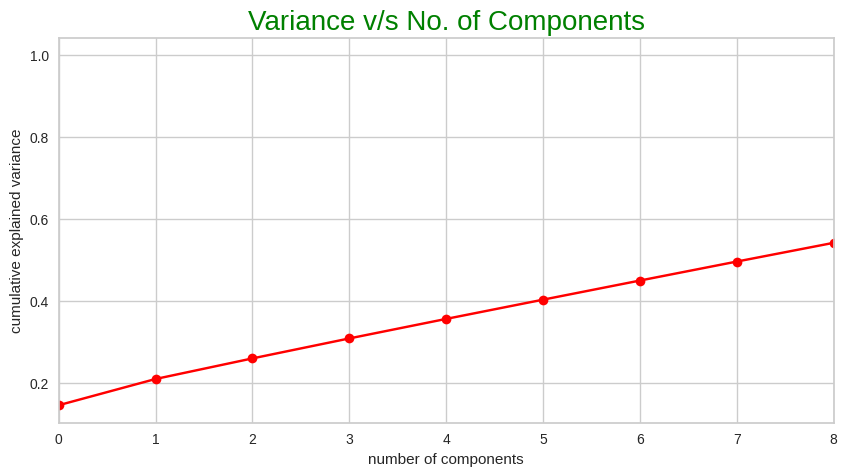

In [173]:
# Cumulative Variance explains
plt.figure(figsize=(10,5))
var1 = np.cumsum(pca.explained_variance_ratio_)
print( var1)

# Plotting the graph
plt.plot(var1, marker ='o', color = 'red')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Variance v/s No. of Components', size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

As we can see above graph, it is showing little abrupt change at point 1 then constant line as well as we can see the explained_variance_ratio_, first 3 component has less variance as compared to other so we can form n_components=1 or 2 or 3 principal components here in PCA

In [174]:
# Lets take n_components=3
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
principalComponents = pca.fit_transform(x)

Text(0.5, 0, 'PC1')

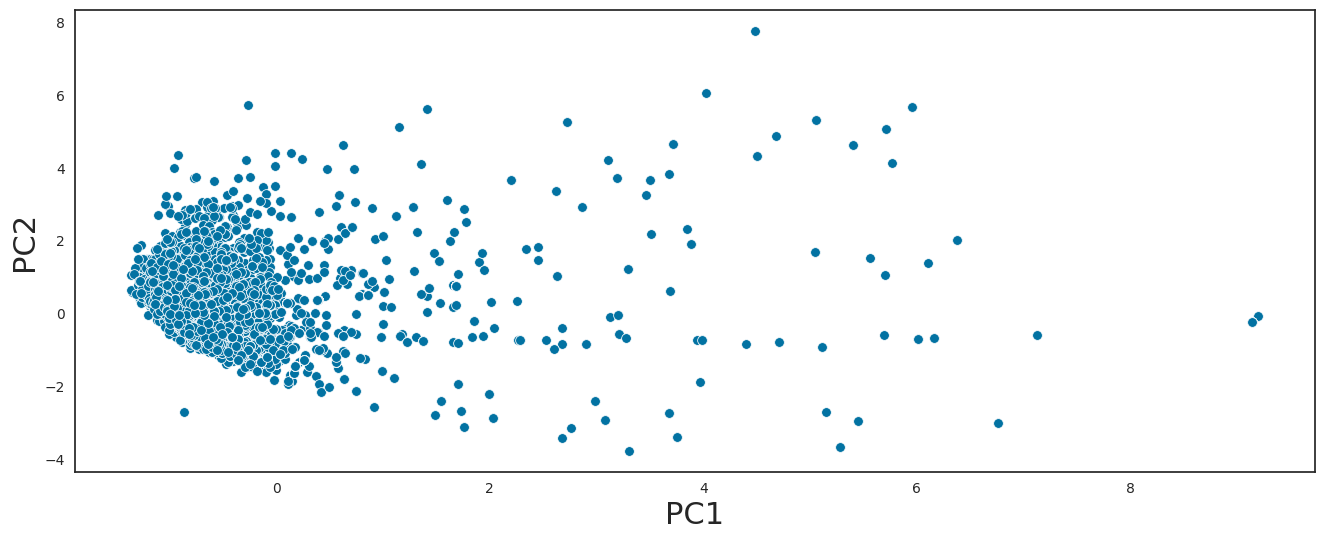

In [175]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=principalComponents[:,1],x=principalComponents[:,0],data=df, palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})

In [176]:
print(pca.explained_variance_ratio_)

[0.14575585 0.06368776 0.04967942]


In [177]:
print("original shape: ", df.shape)
print("PCA transformed shape:", principalComponents.shape)

original shape:  (9861, 55)
PCA transformed shape: (9861, 3)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA technique here for dimensionality reduction.

**Principal Component Analysis** (PCA) is a machine learning technique used for dimensionality reduction. It works by reducing the number of features in a dataset while still preserving the most important information. PCA achieves this by taking a set of possibly correlated variables and transforming them into a set of uncorrelated variables called principal components. The new set of principal components can be used as the input to a machine learning algorithm, allowing for faster and more accurate modelling.

### 8. Data Splitting

In [178]:
df.columns

Index(['Cost', 'Cuisines', 'cuisine_count', 'Rating', 'Pictures',
       'Review_count', 'Followers', 'Review_length', 'Polarity', 'American',
       'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani',
       'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts', 'European',
       'Fast Food', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi',
       'Ice Cream', 'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab',
       'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Mithai',
       'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian',
       'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food',
       'Sushi', 'Thai', 'Wraps', 'pos_tags', 'sentiment'],
      dtype='object')

In [179]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = tfidf                # From text vectorization
y = df.sentiment

# print the shape of x and y
print(f"The Number of Rows and Columns in X is {x.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {y.shape} respectively.")

The Number of Rows and Columns in X is (9861, 22) respectively.
The Number of Rows and Columns in Y is (9861,) respectively.


In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Getting the shape of Train set.
print("Training Dataset Shape:--")
print("X_train shape ", X_train.shape)
print("y_train shape ", y_train.shape)

Training Dataset Shape:--
X_train shape  (7888, 22)
y_train shape  (7888,)


In [181]:
# Getting the shape of Test set.
print("Testing Dataset Shape:--")
print("X_test shape ",X_test.shape)
print("y_test shape ",y_test.shape)

Testing Dataset Shape:--
X_test shape  (1973, 22)
y_test shape  (1973,)


##### What data splitting ratio have you used and why? 

We have made the use of 80% and 20% Training and Testing data respectively.The data should be divided in such a way that neither of them is too high, which is more dependent on the amount of data we have. If the data is too small, then no split will give satisfactory variance so we'll have to do cross-validation, but if the data is huge then it doesn’t really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data as otherwise, it might be more computationally intensive).

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

We have almost equal number of obseravtions for each category. Thus our data is not imbalanced although we will check it once using pieplot

In [182]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x >=df['sentiment'].mean() else 0)
df.sentiment.value_counts()

1    5323
0    4538
Name: sentiment, dtype: int64

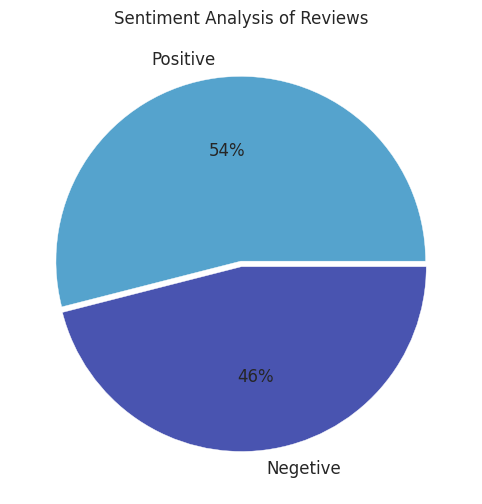

In [183]:
# Handling Imbalanced Dataset (If needed)
fig = plt.figure(1, figsize=(8,6))
keys = ['Positive','Negetive']
data= df['sentiment'].value_counts()
explode = [0.01, 0.02]
palette_color = sns.color_palette('icefire')

plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Sentiment Analysis of Reviews')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

As our most important variable is in the 50:50 ratio. However it is said to be very slightly imbalanced. therefore not applying any technique (over sampling & undersampling). **Leaving it as it is**.

## ***7. ML Model Implementation***

### ML Model - 1 K-Means Clustering

In [184]:
# ML Model - 1 Implementation
wcss=[]
range_values= range(1,20)

for i in range_values:
      knn = KMeans(n_clusters = i)
      # Fit the Algorithm
      preds = knn.fit(principalComponents)
      centers = knn.cluster_centers_
      wcss.append(knn.inertia_)


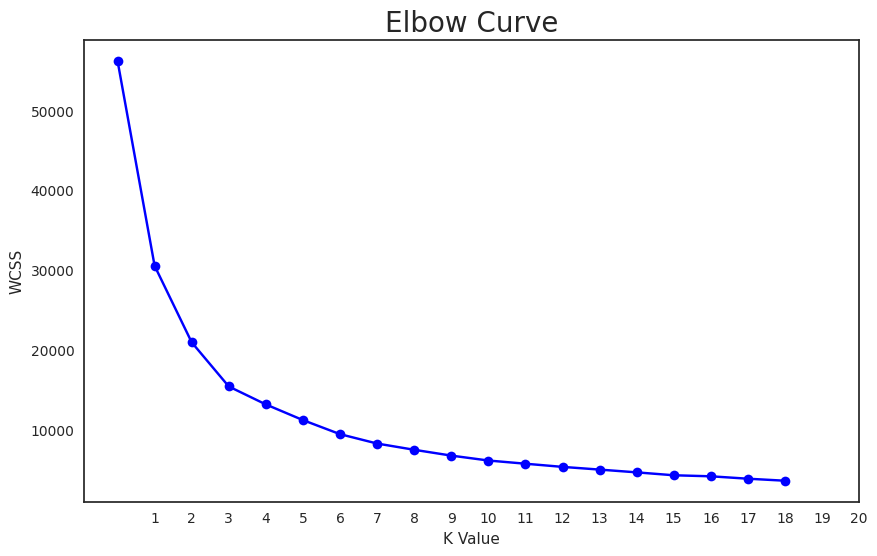

In [185]:
# Wcss v/s clusters graph - Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(wcss, color="blue", marker ="o")
plt.xlabel("K Value")
plt.ylabel("WCSS") #within cluster squared error
plt.xticks(np.arange(1,21,1))
plt.title('Elbow Curve', size = 20)
plt.show()

From above graph, we can observe that, 2nd and 3rd cluster seems to be forming the elbow of the curve.

However, the values does not reduce linearly until 6th cluster.

Let's check silhouette score for the cluster 2 to cluster 10. And after according to the score we will choose our n_cluster.

For n_clusters = 2 average silhouette_score is : 0.6668801378762635
For n_clusters = 3 average silhouette_score is : 0.6397597308816186
For n_clusters = 4 average silhouette_score is : 0.4546058136486042
For n_clusters = 5 average silhouette_score is : 0.4883462425013421
For n_clusters = 6 average silhouette_score is : 0.39647748883266765
For n_clusters = 7 average silhouette_score is : 0.4076619107554617
For n_clusters = 8 average silhouette_score is : 0.4205185985590985
For n_clusters = 9 average silhouette_score is : 0.3899648844301493
For n_clusters = 10 average silhouette_score is : 0.4019900423949946


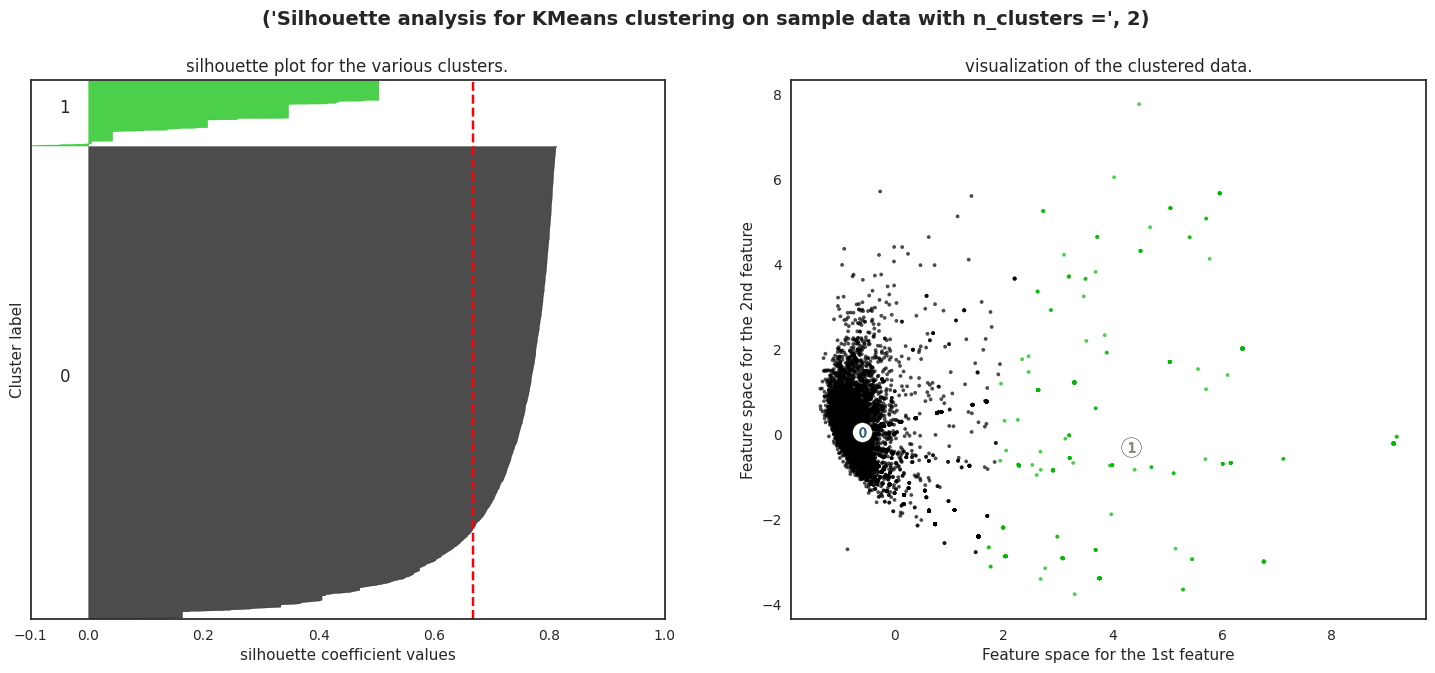

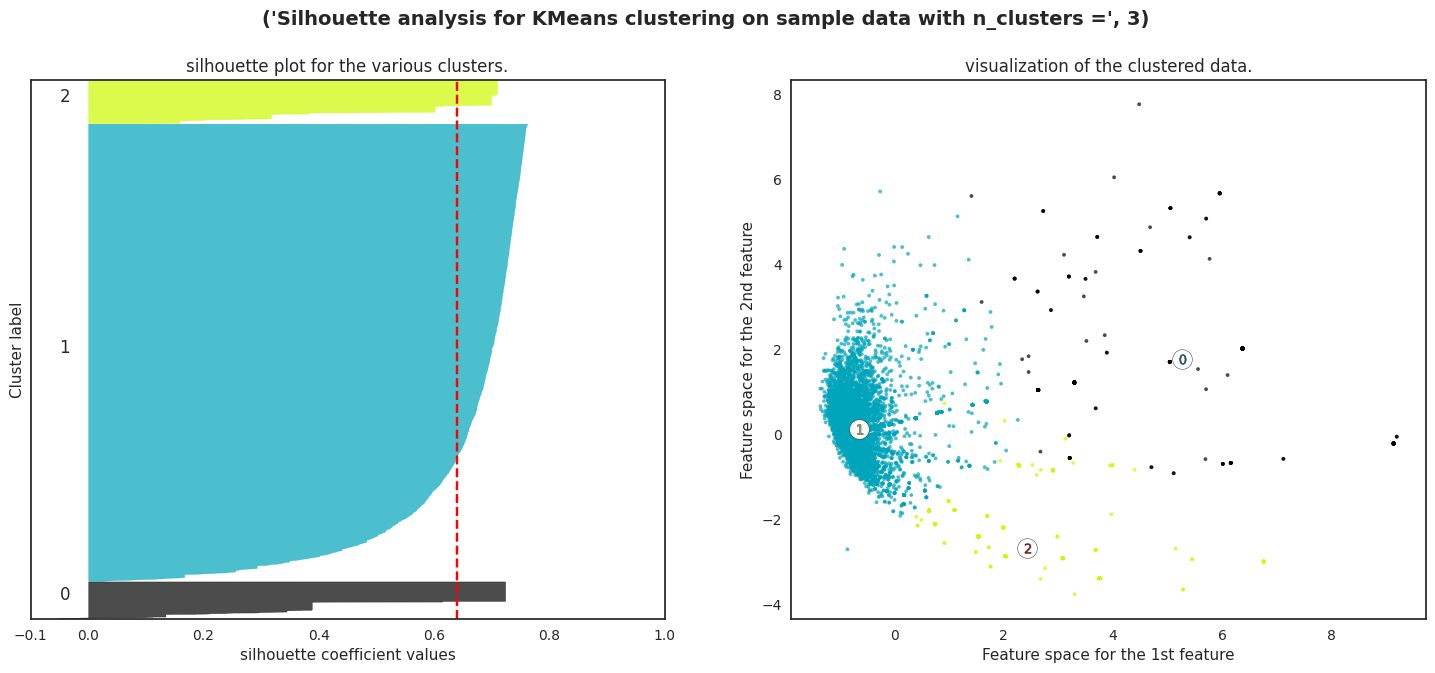

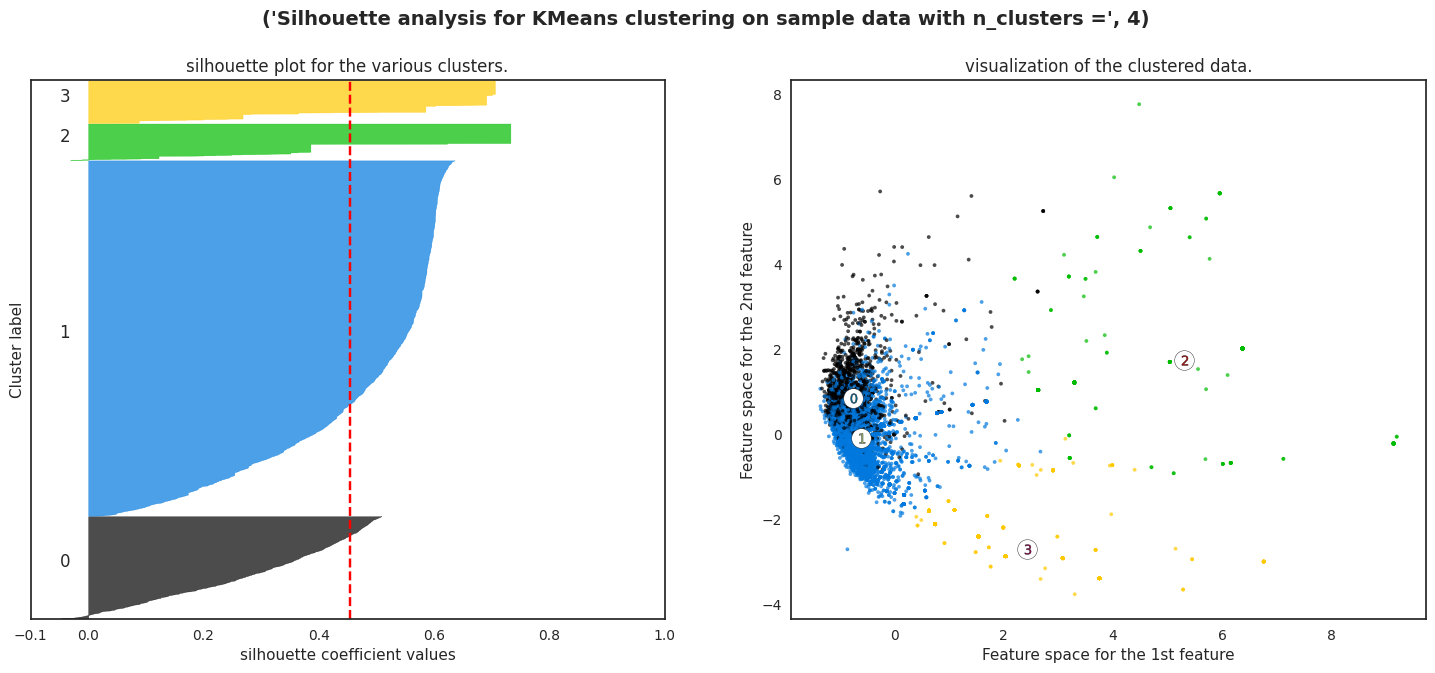

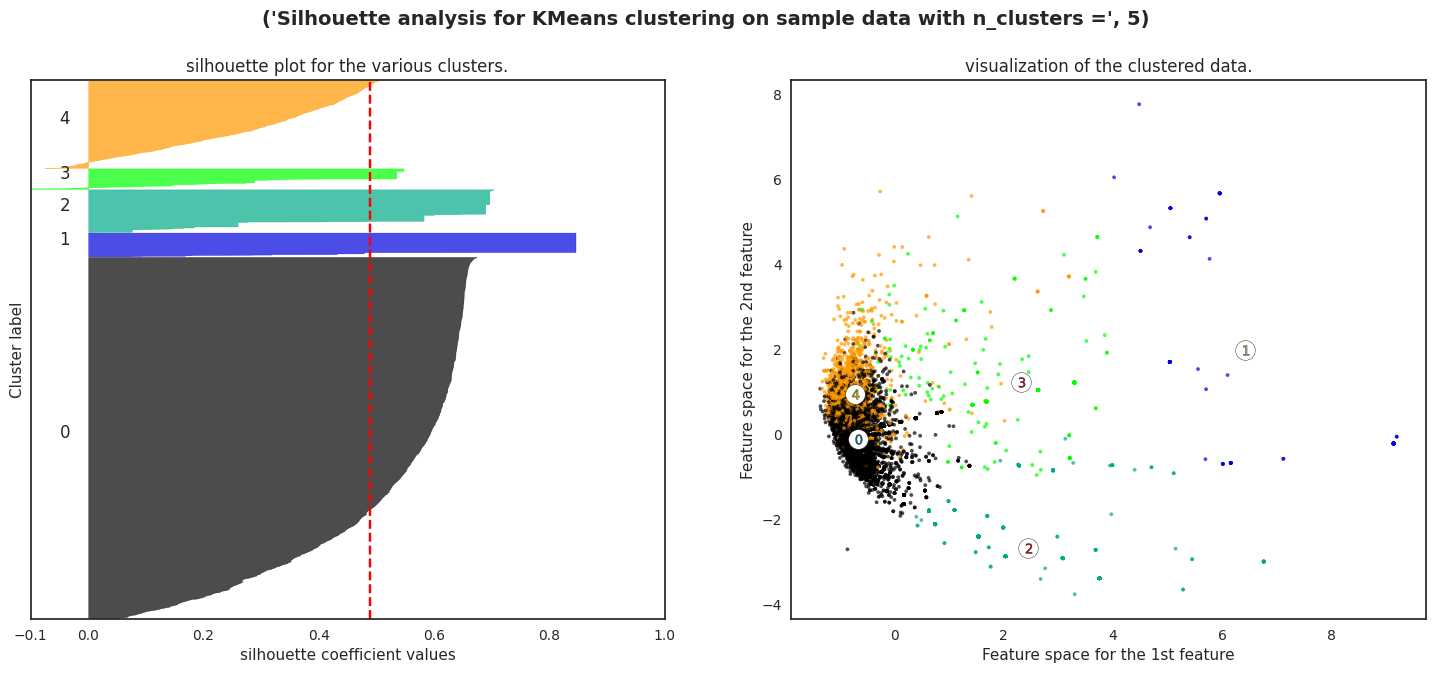

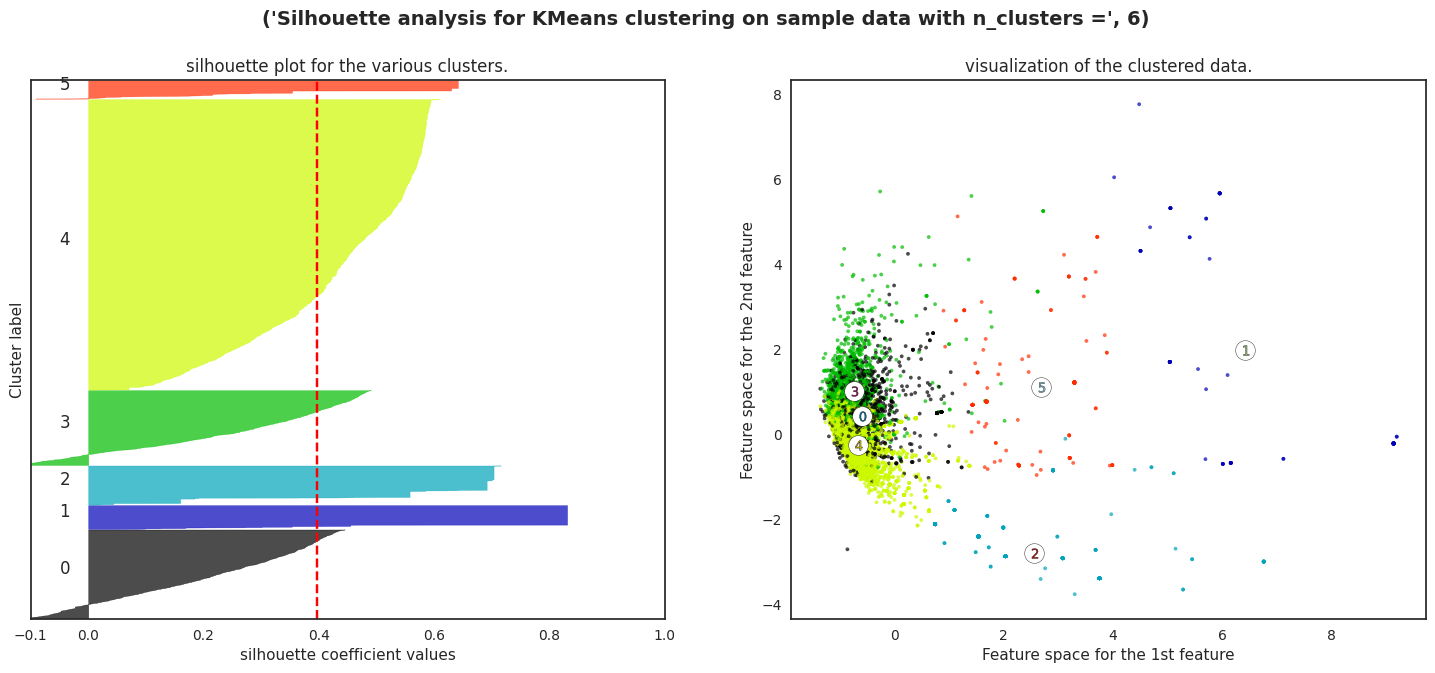

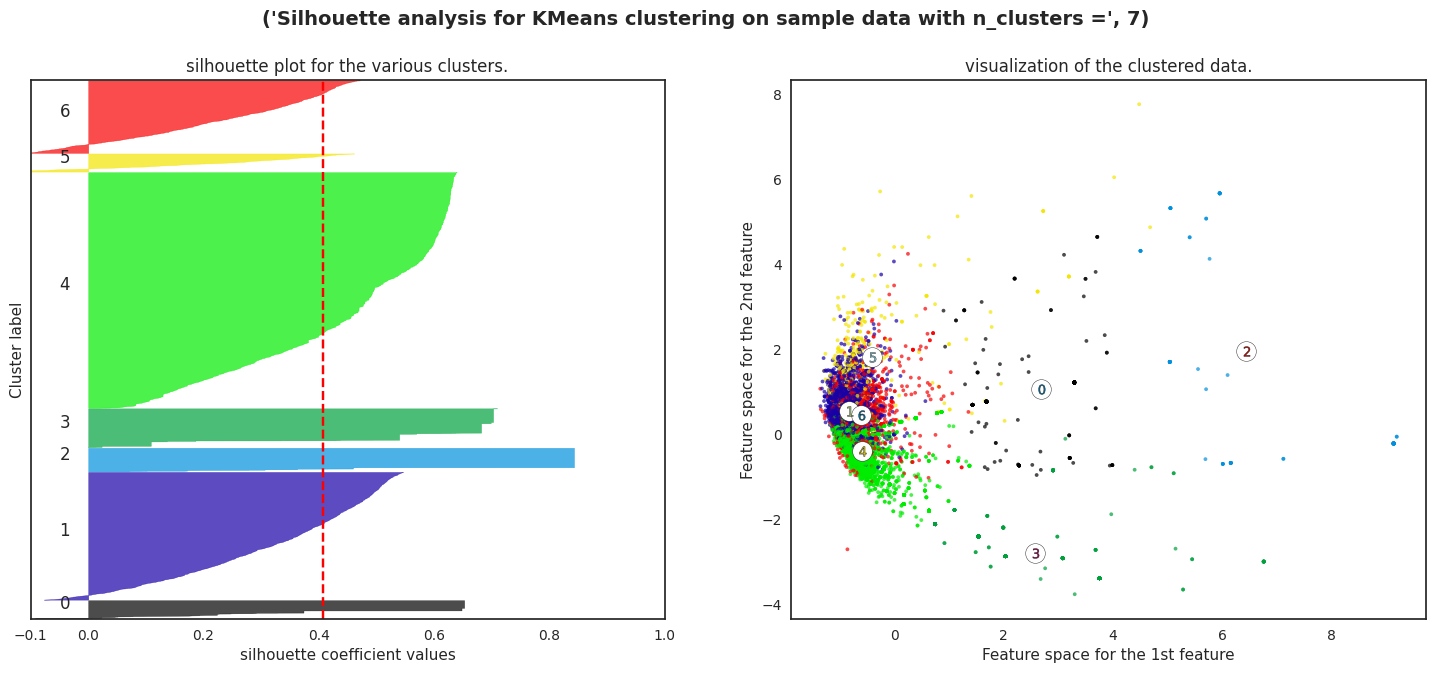

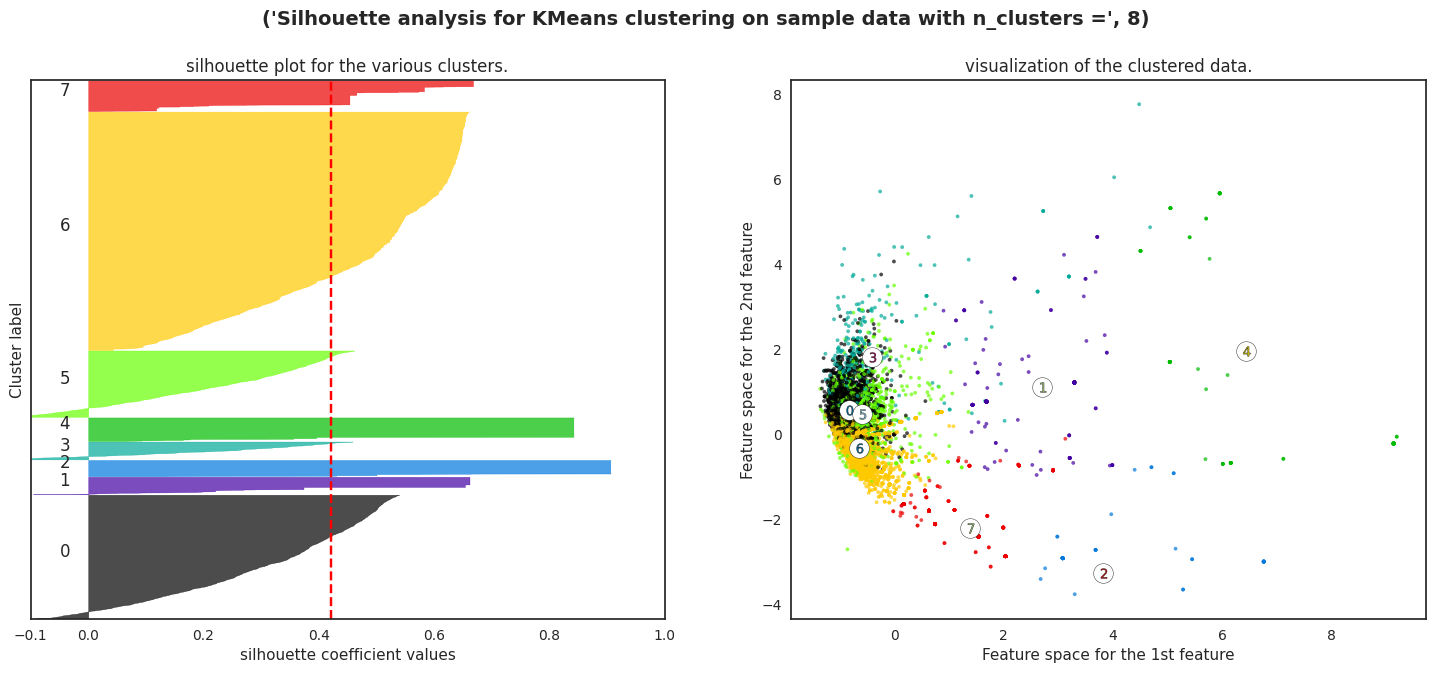

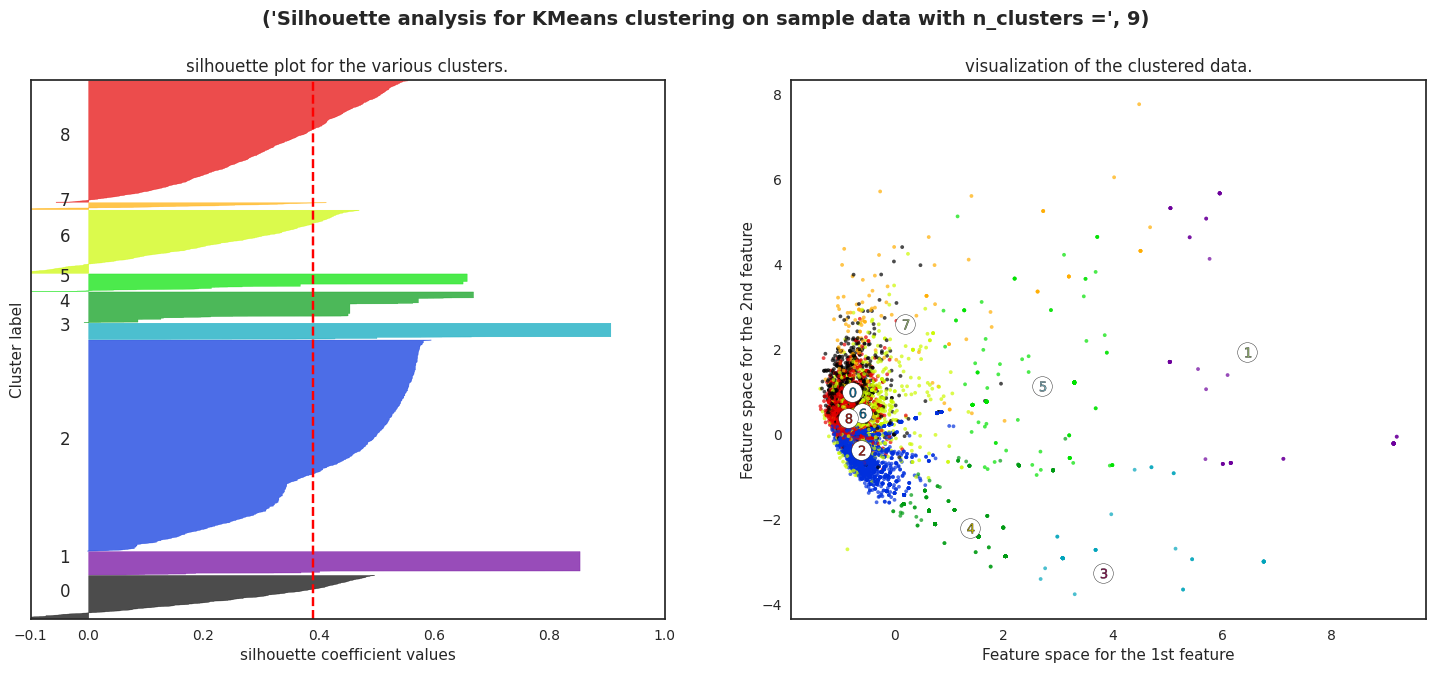

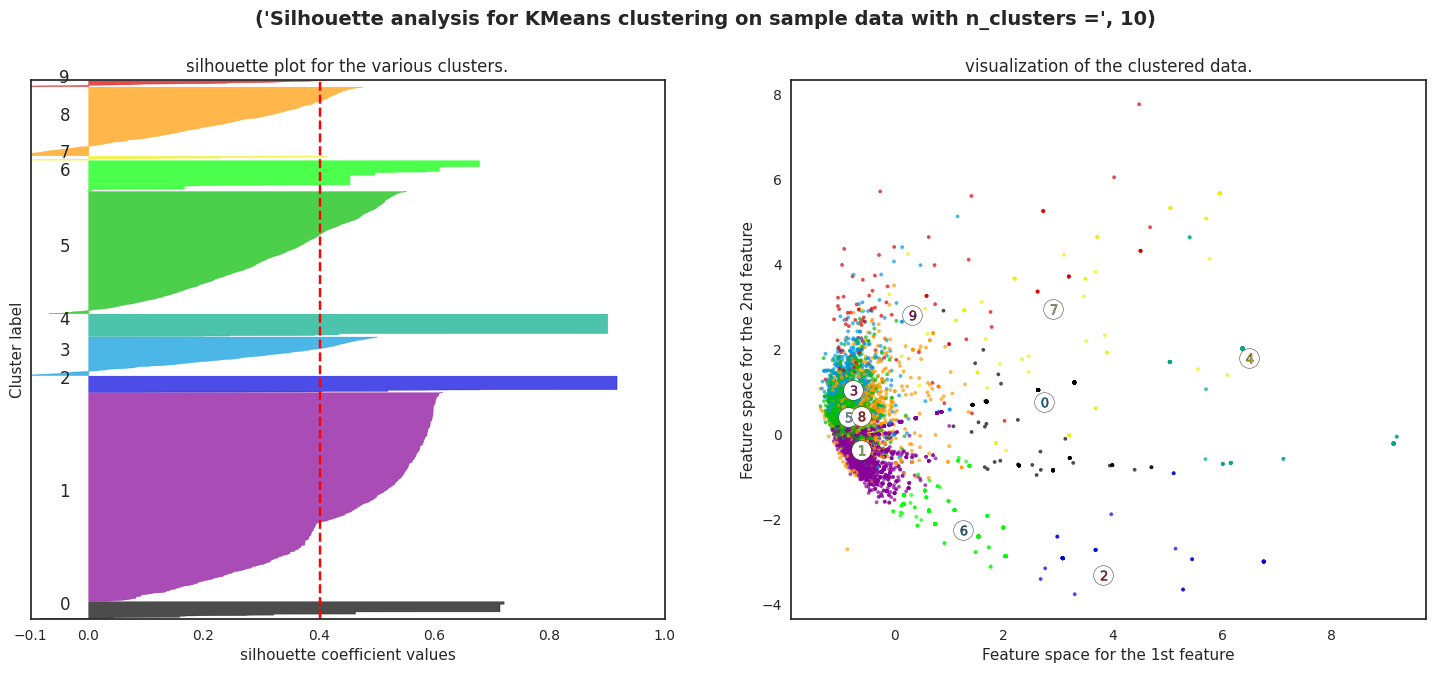

In [186]:
# Silhoutte score visualization
import matplotlib.cm as cm

# Giving range from 7 to 19
range_n_clusters = range(2,11)
best_score = -1

# visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(principalComponents) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(principalComponents)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(principalComponents, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(principalComponents, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(principalComponents[:, 0], principalComponents[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker= i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters =", n_clusters),
                 fontsize=14, fontweight='bold')

From the above visualization of silhouettee score, we got to know that n_cluster = 2 is giving highest number of silhoutte score but we will use n_cluster = 3 which is also giving a quite good score of 0.63.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Means Clustering is an Unsupervised Learning algorithm used to group data points into clusters based on their similarity. The algorithm works by grouping similar data points into 'k' number of clusters, where 'k' is a predefined number. It then calculates the centroid or mean of each cluster and continues to iterate until it finds the best fit and minimizes the total within-cluster variation. This technique is useful for organizing or classifying data in a dataset, which can be used for further analysis or decision-making.
It is a centroid-based algorithm, where each cluster is associated with a centroid. 

How It's Work?

The k-means algorithm works by first selecting k initial "centroids," or cluster centers, at random from the data. Then, it assigns each sample in the dataset to the nearest centroid, based on some distance metric like Euclidean distance. The algorithm then updates the centroids to be the mean of the samples in each cluster. teratively repeats the process of reassigning samples to the nearest centroids and updating the centroids until convergence. Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters. The k-means clustering algorithm mainly performs two tasks:

* Determines the best value for K center points or centroids by an iterative process.
* Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

We will Use the KElbowVisualizer to find the optimal number of clusters  Koptimal. The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

For Metric Distortion

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(2, 12),
                 timings=False)

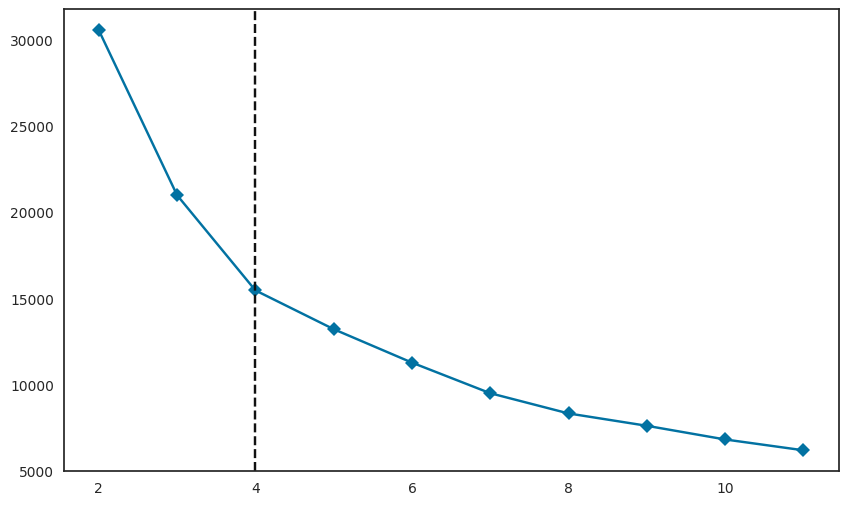

In [187]:
# Visualizing evaluation Metric Score chart

# wcss=[]
plt.figure(figsize=(10,6))
range_values= range(1,20)

for i in range_values:
      knn = KMeans(n_clusters = i)
      # Fit the Algorithm
      # preds = knn.fit(principalComponents)
      # centers = knn.cluster_centers_
      # wcss.append(knn.inertia_)

visualizer = KElbowVisualizer(knn, k=(2,12), metric='distortion', timings=False)
# Fit the data to the visualizer
visualizer.fit(principalComponents)        


 For Metric Silhouette

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(2, 12),
                 metric='silhouette', timings=False)

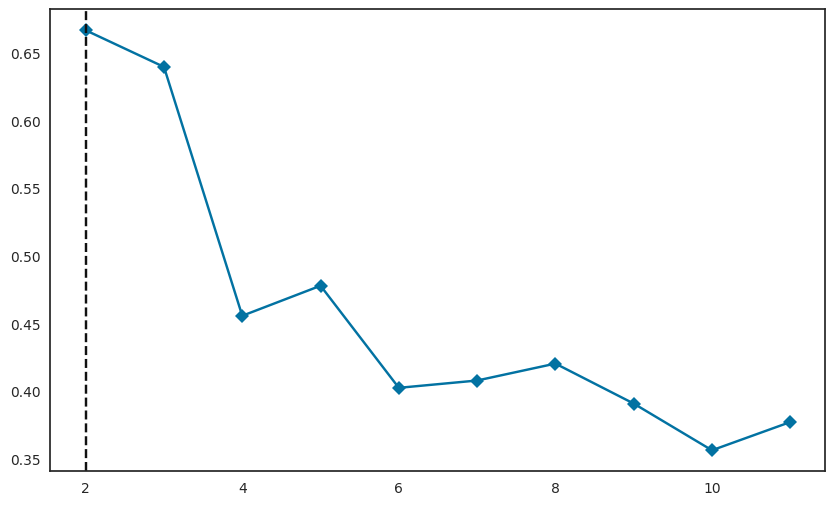

In [188]:
# Instantiate the clustering model and visualizer
knn = KMeans()
visualizer = KElbowVisualizer(knn, k=(2,12), metric='silhouette', timings=False)
# Fit the data to the visualizer
plt.figure(figsize=(10,6))
visualizer.fit(principalComponents)        

By visualisation of these two graph and if, we focus on the elbow(highest or lowest elbow) to get the best cluster. or we can say,If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

In case of **distortion analysis** we get the best no. of cluster at 3. Because the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center.

In second graph of **silhouette anlaysis**, we can say that we get the best no. of cluster as 2. from silhouette score also we can say that elbow is the highest at 2.

By visualizing above two plots, we found a mid way and use n_cluster = 3 .

Building 3 clusters using the k-means clustering algorithm:

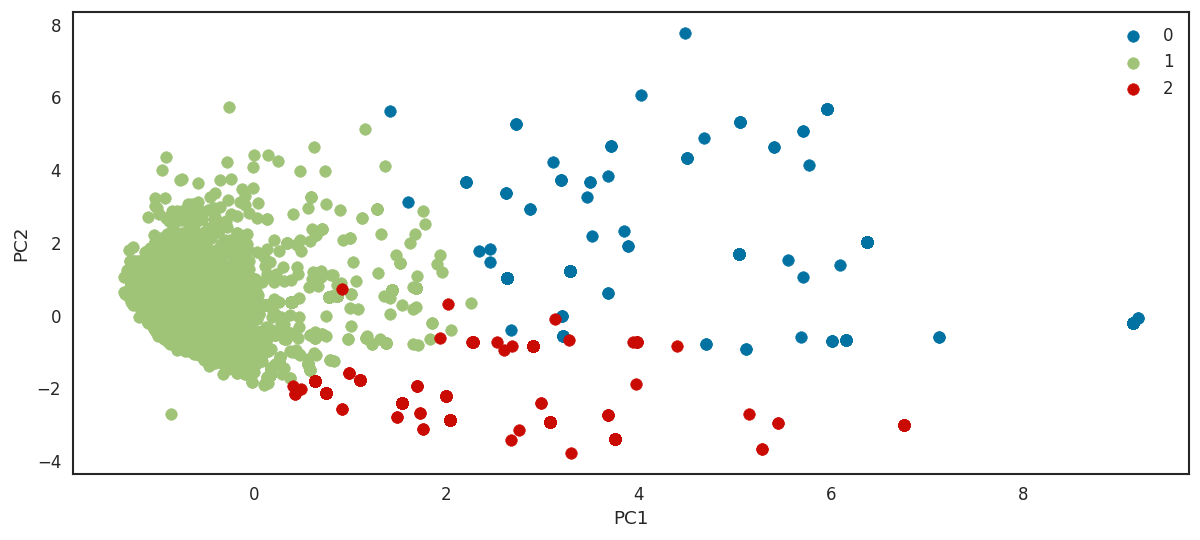

In [189]:
# using n_clusters = 3 for kmeans
plt.figure(figsize = (12,5), dpi = 120)
kmeans= KMeans(n_clusters = 3, init= 'k-means++', random_state = 42)
kmeans.fit(principalComponents)
# labels (clusters) associated with each data points
labels = kmeans.labels_ 

# predict the labels of clusters
label = kmeans.fit_predict(principalComponents)
unique_labels = np.unique(label)
 
# plot the result
for i in unique_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.legend()
plt.show()

In [190]:
principalComponents

array([[-0.94873664,  0.19411819, -0.36983876],
       [-0.82843736, -0.43826216, -0.81097582],
       [-0.61705365,  0.05237421, -0.31190988],
       ...,
       [-1.02182505,  0.37434487,  0.14820316],
       [-0.92376783, -0.28393675, -0.24277919],
       [-0.91009412, -0.05013782, -0.29679176]])

In [191]:
# Evaluation metrics - distortion, Silhouette score
kmeans_silhouette_score = silhouette_score(principalComponents, kmeans.labels_)
print("Silhouette Coefficient: %0.3f"%kmeans_silhouette_score)

kmeans_distortion = kmeans.inertia_
print("Distortion Score: %0.3f"%kmeans_distortion)

Silhouette Coefficient: 0.640
Distortion Score: 20982.986


In [192]:
# Creating Dataframe of its 3 principal components  
principal_df = pd.DataFrame(data = principalComponents, columns=['Principal Component 1','Principal Component 2','Principal Component 3'], index=df.index)
# Creating new coumn of predicted labels for above newly created dataframe
principal_df["label"] = labels
principal_df.sample(5)

Principal Component 1  \
Restaurant_name                                             
(B-Dubs, B-Dubs)                                -0.836131   
(Behrouz Biryani, Behrouz Biryani)               0.630916   
(The Indi Grill, The Indi Grill)                -0.726140   
(Karachi Cafe, Karachi Cafe)                    -0.735655   
(Karachi Cafe, Karachi Cafe)                    -1.075937   

                                    Principal Component 2  \
Restaurant_name                                             
(B-Dubs, B-Dubs)                                 0.609486   
(Behrouz Biryani, Behrouz Biryani)              -1.805786   
(The Indi Grill, The Indi Grill)                -0.610457   
(Karachi Cafe, Karachi Cafe)                    -0.112292   
(Karachi Cafe, Karachi Cafe)                     0.660949   

                                    Principal Component 3  label  
Restaurant_name                                                   
(B-Dubs, B-Dubs)                                 1.518011      1  
(Behrouz Biryani, Behrouz Biryani)               0.257680      2  
(The Indi Grill, The Indi Grill)                -0.160969      1  
(Karachi Cafe, Karachi Cafe)                    -0.266018      1  
(Karachi Cafe, Karachi Cafe)                    -0.633934      1

In [193]:
principal_df.shape, df.shape

((9861, 4), (9861, 55))

In [194]:
# Merging the predicted labels from principal_df to our regular old df for further processing
new_df = df.join(principal_df['label'],  on='Restaurant_name')
new_df.sample(2)

Cost                                      Cuisines  \
Restaurant_name                                                            
(T Grill, T Grill)     700        North Indian, Andhra, Biryani, Chinese   
(Flechazo, Flechazo)  1300  Asian, Mediterranean, North Indian, Desserts   

                      cuisine_count  Rating  Pictures  Review_count  \
Restaurant_name                                                       
(T Grill, T Grill)                4     5.0       0.0          29.0   
(Flechazo, Flechazo)              4     5.0       0.0           2.0   

                      Followers  Review_length  Polarity  American  ...  \
Restaurant_name                                                     ...   
(T Grill, T Grill)        110.0          460.0 -0.077778       0.0  ...   
(Flechazo, Flechazo)       19.0          145.0  0.402143       0.0  ...   

                      Seafood  South Indian  Spanish  Street Food  Sushi  \
Restaurant_name                                                            
(T Grill, T Grill)        0.0           0.0      0.0          0.0    0.0   
(Flechazo, Flechazo)      0.0           0.0      0.0          0.0    0.0   

                      Thai  Wraps  \
Restaurant_name                     
(T Grill, T Grill)     0.0    0.0   
(Flechazo, Flechazo)   0.0    0.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 pos_tags  \
Restaurant_name                                                                                                                                                                                                                                                                                                                                                                                                                                                             
(T Grill, T Grill)    RB NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , JJ '' , NNP POS , NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , NNP POS , JJ '' , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNP POS , '' '' , '' '' , CD '' , '' '' , NNP POS , '' JJ POS NN   
(Flechazo, Flechazo)                                                                                                                                                                                                                                                                                            RB NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNP POS , '' JJ POS , NNP POS , NNP POS , NNP POS , NNP POS , VBP POS NN   

                      sentiment  label  
Restaurant_name                         
(T Grill, T Grill)            0      1  
(Flechazo, Flechazo)          1      1  

[2 rows x 56 columns]

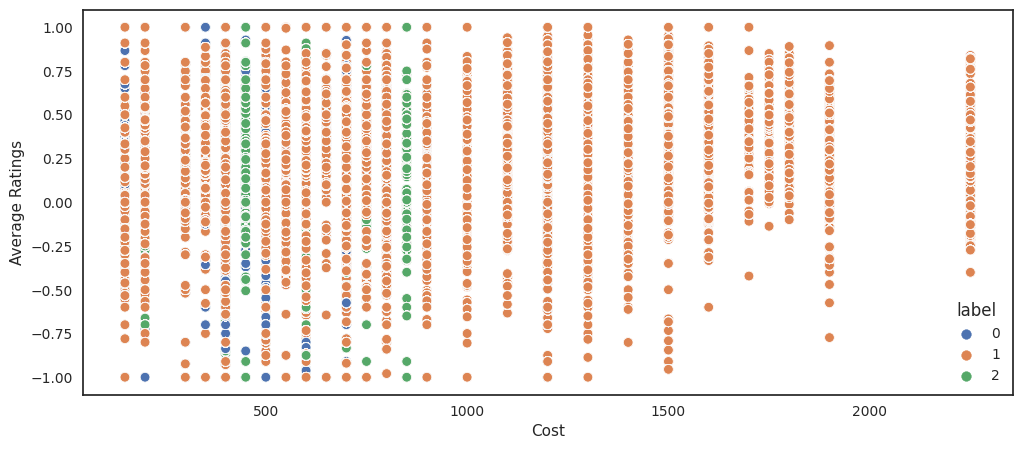

In [195]:
# Visualizing Cost and rating of the restaurants in each cluster
plt.figure(figsize = (12,5))
sns.set_style('white')
sns.scatterplot(y='Polarity', x='Cost', data=new_df, hue='label', palette = 'deep')
plt.ylabel('Average Ratings')
plt.xlabel('Cost')
plt.show()

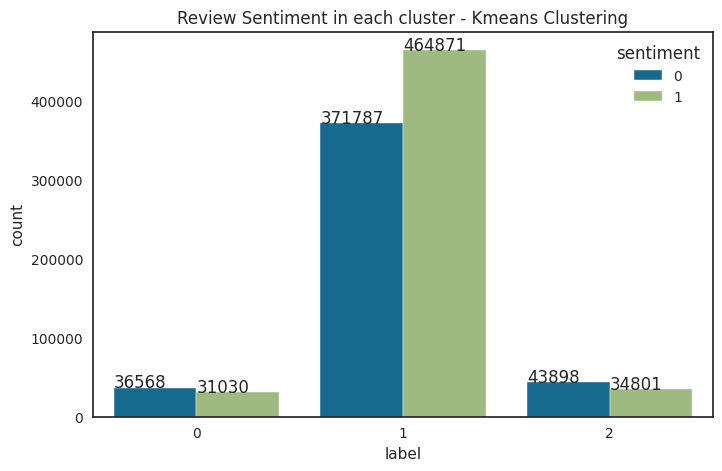

In [196]:
# Visualizing the data in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x="label", data=new_df, hue='sentiment')
plt.title('Review Sentiment in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

In [197]:
# creating new df for checkign cuising in each cluster
new_cluster_df = new_df.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
# removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

# printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"] == cluster]['Cuisines'].unique(),'\n')

Cuisine List for Cluster : 1 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Asian' 'Mediterranean' 'Desserts' 'Seafood' 'Beverages' 'Goan'
 'Healthy Food' 'Lebanese' 'American' 'Ice Cream' 'Street Food'
 'Fast Food' 'BBQ' 'Italian' 'Finger Food' 'Burger' 'Japanese' 'Salad'
 'Sushi' 'Mexican' 'Mughlai' 'Bakery' 'Juices' 'Arabian' 'Andhra'
 'Hyderabadi' 'Cafe' 'Spanish' 'Wraps' 'Thai' 'Indonesian' 'Modern Indian'
 'Momos' 'Pizza' 'North Eastern'] 

Cuisine List for Cluster : 2 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'Healthy Food'
 'Continental' 'South Indian' 'Lebanese' 'Ice Cream' 'Desserts'
 'Street Food' 'Fast Food' 'Burger' 'Mughlai' 'Andhra' 'Hyderabadi'
 'European' 'Italian' 'Spanish' 'Bakery' 'Cafe' 'American' 'Wraps' 'Thai'
 'Indonesian' 'Asian' 'Momos' 'Salad' 'Kebab' 'Pizza' 'Arabian'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'Goan'
 'Continental' 'Asian' 'Healthy Foo

#### 2. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**Distortion Metric -** The distortion metric in ML refers to a measure of how far the output produced by a machine learning model deviates from the desired output. It is typically a measure of the difference between the actual output generated by the model and the output that an ideal model would generate. This metric is often used to evaluate the performance of a model, and can be used to compare different models or inform the tuning of a particular model. In other words, it is calculated by measuring the sum of the distances between each point and its nearest cluster center. Lower values indicate better accuracy, as the points are closer to their respective clusters.

**Silhouette Score Metric -** The silhouette score is a metric commonly used to evaluate a model's performance in unsupervised machine learning. It measures how well each data point is matched to its own cluster compared to other clusters, providing a range from -1 to 1 with a score of 1 indicating a perfect match and -1 indicating the worst possible match. The silhouette score can be used to identify groups of data that are highly similar and separated from other groups. The Silhouette Score is a metric commonly used to assess the quality of clustering algorithms in machine learning. It is based on the average distance between an item and all other items in its own cluster, versus the average distance of that item and all items in other clusters. A higher score indicates a better clustering.

### ML Model - 2 Principal Component Analysis

We have already performed PCA in dimensionality reduction part. So here we will just visualize the PCA model with labels.

We have commented the code below for better understanding.

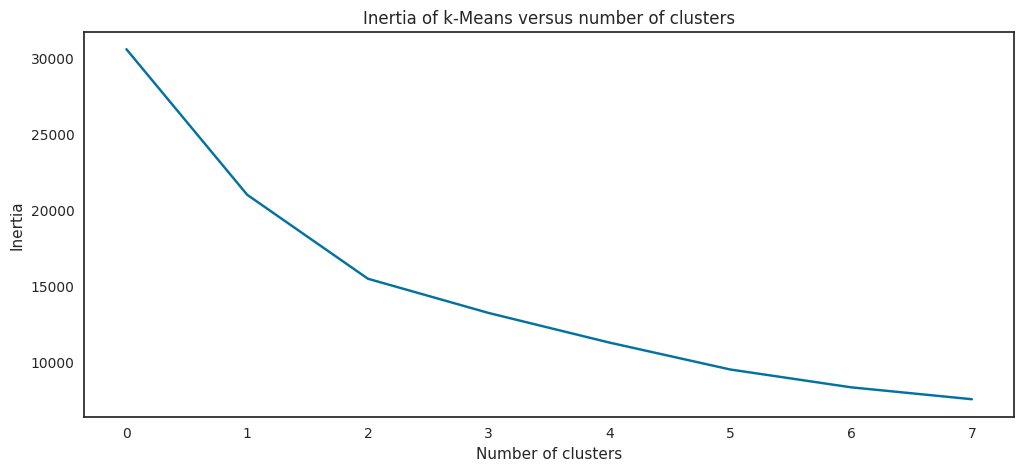

In [198]:
# ML Model - 2 Implementation
# Using kmeans for the dimensionaly reduced data for visualization only
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(principalComponents).inertia_ 
          for i in range(8)]
plt.figure(figsize=(12,5))
sns.lineplot(scores1)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.show()

From this we can say that number of clusters can be 2

### ML Model - 3 Hierarchical Clustering

**Hierarchial clustering** algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

* Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. 
* Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.


**Agglomerative Clustering**

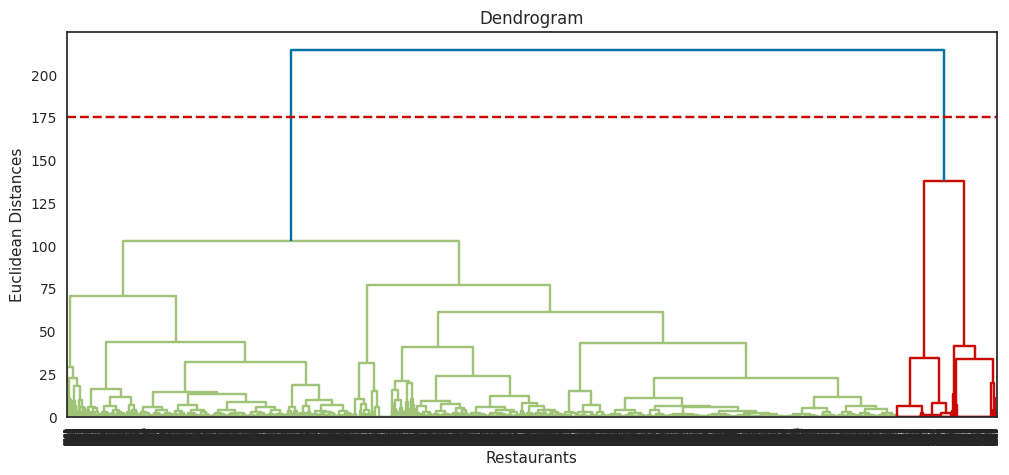

In [199]:
# ML Model - 3 Implementation
# Fit the Algorithm
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(principalComponents, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.xticks(rotation=90)
plt.ylabel('Euclidean Distances')
# find largest vertical distance we can make without crossing any other horizontal line
plt.axhline(y= 175, color='r', linestyle='--')
plt.show() 


A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

Building 2 clusters using the Agglomerative clustering algorithm:

In [200]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(principalComponents)

# labels (clusters) associated with each data points
labels_hr = hierarchical.labels_ 
unique_labels = np.unique(labels_hr)


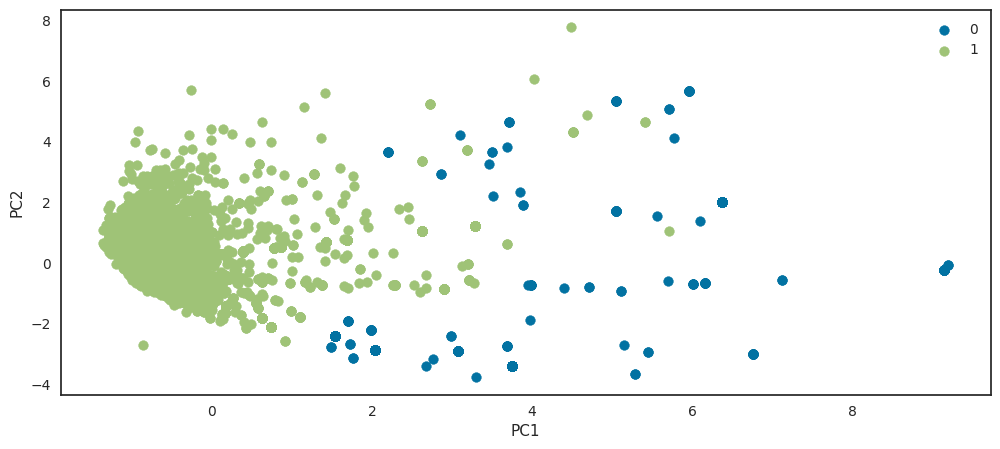

In [201]:
# plot the result
plt.figure(figsize=(12,5))
labels_hr = hierarchical.labels_ 
for i in unique_labels:
    plt.scatter(principalComponents[labels_hr == i , 0] , principalComponents[labels_hr == i , 1] , label = i)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Agglomerative Hierarchical Clustering** (AHC) is an unsupervised machine learning algorithm used to cluster a collection of data points into groups based on similarities in their features. AHC uses a bottom-up approach, starting with individual points as clusters and successively combining them until the entire dataset is divided into distinct clusters. It is useful for organizing large datasets into understandable smaller subgroups (clusters) where similar samples are grouped together and dissimilar samples are placed in different clusters.

In [202]:
# Visualizing evaluation Metric Score chart
# Checking Silhouette score for 2 to 15 clusters

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for n_clusters in range_n_clusters:
  # Fitting hierarchical clustering model
  hierarchical = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
  y_hierach = hierarchical.fit_predict(principalComponents)

  # Printing SS for each cluster
  score = silhouette_score(principalComponents, y_hierach)
  print(f"For n_clusters = {n_clusters}, silhouette score is {score}")


For n_clusters = 2, silhouette score is 0.6591762692379742
For n_clusters = 3, silhouette score is 0.633850018103738
For n_clusters = 4, silhouette score is 0.3439748998405057
For n_clusters = 5, silhouette score is 0.37428554320151974
For n_clusters = 6, silhouette score is 0.36303629477754634
For n_clusters = 7, silhouette score is 0.33575414409590554
For n_clusters = 8, silhouette score is 0.32625414628889765
For n_clusters = 9, silhouette score is 0.31742510727781675
For n_clusters = 10, silhouette score is 0.32185052514875445
For n_clusters = 11, silhouette score is 0.331309985141563
For n_clusters = 12, silhouette score is 0.3435472607222693
For n_clusters = 13, silhouette score is 0.3477790139396053
For n_clusters = 14, silhouette score is 0.3659504978296243
For n_clusters = 15, silhouette score is 0.3755954520401912


From the above score, we can see the number of clusters have to be 2. But we will select n_cluster = 3

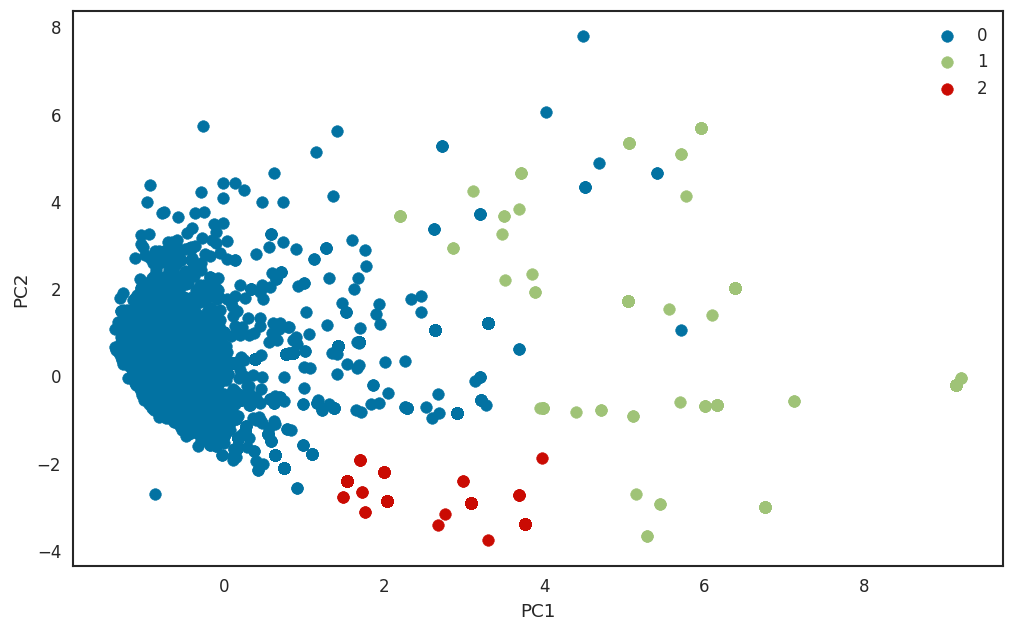

In [203]:
# using n_clusters = 3 for AgglomerativeClustering
plt.figure(figsize = (10,6), dpi = 120)
hierarchical = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

# predict the labels of clusters
y_hierach = hierarchical.fit_predict(principalComponents)

# labels (clusters) associated with each data points
labels_hr = hierarchical.labels_ 
unique_labels = np.unique(labels_hr)
 
# plot the result
for i in unique_labels:
    plt.scatter(principalComponents[labels_hr == i , 0] , principalComponents[labels_hr == i , 1] , label = i)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.legend()
plt.show()

In [204]:
# Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(principalComponents,labels_hr, metric='euclidean'))

# davies_bouldin_score 
print("Davies Bouldin Score %0.3f"%davies_bouldin_score(principalComponents, labels_hr))

Silhouette Coefficient: 0.634
Davies Bouldin Score 0.444


In [205]:
# Adding a hierarchical cluster number attribute
principal_df['labels_hr'] = hierarchical.labels_
principal_df.sample(5)

Principal Component 1  \
Restaurant_name                                                                                         
(Amul, Amul)                                                                                 1.539461   
(Paradise, Paradise)                                                                        -0.448814   
(Dunkin' Donuts, Dunkin' Donuts)                                                            -0.507314   
(Shree Santosh Dhaba Family Restaurant, Shree Santosh Dhaba Family Restaurant)               6.376579   
(Kritunga Restaurant, Kritunga Restaurant)                                                  -0.506784   

                                                                                Principal Component 2  \
Restaurant_name                                                                                         
(Amul, Amul)                                                                                -2.416759   
(Paradise, Paradise)                                                                         1.149450   
(Dunkin' Donuts, Dunkin' Donuts)                                                            -0.291176   
(Shree Santosh Dhaba Family Restaurant, Shree Santosh Dhaba Family Restaurant)               2.020295   
(Kritunga Restaurant, Kritunga Restaurant)                                                   0.341342   

                                                                                Principal Component 3  \
Restaurant_name                                                                                         
(Amul, Amul)                                                                                 0.486686   
(Paradise, Paradise)                                                                        -2.208730   
(Dunkin' Donuts, Dunkin' Donuts)                                                            -0.219060   
(Shree Santosh Dhaba Family Restaurant, Shree Santosh Dhaba Family Restaurant)              -0.229870   
(Kritunga Restaurant, Kritunga Restaurant)                                                  -1.282457   

                                                                                label  \
Restaurant_name                                                                         
(Amul, Amul)                                                                        2   
(Paradise, Paradise)                                                                1   
(Dunkin' Donuts, Dunkin' Donuts)                                                    1   
(Shree Santosh Dhaba Family Restaurant, Shree Santosh Dhaba Family Restaurant)      0   
(Kritunga Restaurant, Kritunga Restaurant)                                          1   

                                                                                labels_hr  
Restaurant_name                                                                            
(Amul, Amul)                                                                            2  
(Paradise, Paradise)                                                                    0  
(Dunkin' Donuts, Dunkin' Donuts)                                                        0  
(Shree Santosh Dhaba Family Restaurant, Shree Santosh Dhaba Family Restaurant)          1  
(Kritunga Restaurant, Kritunga Restaurant)                                              0

In [206]:
# Merging the predicted labels from principal_df to our regular old df for further processing
new_df2 = df.join(principal_df['labels_hr'],  on='Restaurant_name')
new_df2.sample(2)

Cost  \
Restaurant_name                                                
(Tiki Shack, Tiki Shack)                                1000   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)   700   

                                                                              Cuisines  \
Restaurant_name                                                                          
(Tiki Shack, Tiki Shack)                                                   Continental   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)  North Indian, Chinese, Biryani   

                                                        cuisine_count  Rating  \
Restaurant_name                                                                 
(Tiki Shack, Tiki Shack)                                            1     5.0   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)              3     5.0   

                                                        Pictures  \
Restaurant_name                                                    
(Tiki Shack, Tiki Shack)                                     0.0   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)       0.0   

                                                        Review_count  \
Restaurant_name                                                        
(Tiki Shack, Tiki Shack)                                         6.0   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)           1.0   

                                                        Followers  \
Restaurant_name                                                     
(Tiki Shack, Tiki Shack)                                      9.0   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)        2.0   

                                                        Review_length  \
Restaurant_name                                                         
(Tiki Shack, Tiki Shack)                                        491.0   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)            4.0   

                                                        Polarity  American  \
Restaurant_name                                                              
(Tiki Shack, Tiki Shack)                                0.433529       0.0   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)  0.700000       0.0   

                                                        ...  Seafood  \
Restaurant_name                                         ...            
(Tiki Shack, Tiki Shack)                                ...      0.0   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)  ...      0.0   

                                                        South Indian  Spanish  \
Restaurant_name                                                                 
(Tiki Shack, Tiki Shack)                                         0.0      0.0   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)           0.0      0.0   

                                                        Street Food  Sushi  \
Restaurant_name                                                              
(Tiki Shack, Tiki Shack)                                        0.0    0.0   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)          0.0    0.0   

                                                        Thai  Wraps  \
Restaurant_name                                                       
(Tiki Shack, Tiki Shack)                                 0.0    0.0   
(Green Bawarchi Restaurant, Green Bawarchi Restaurant)   0.0    0.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

#### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Silhouette Score Metric** - The silhouette score is a metric commonly used to evaluate a model's performance in unsupervised machine learning. It measures how well each data point is matched to its own cluster compared to other clusters, providing a range from -1 to 1 with a score of 1 indicating a perfect match and -1 indicating the worst possible match. The silhouette score can be used to identify groups of data that are highly similar and separated from other groups. The Silhouette Score is a metric commonly used to assess the quality of clustering algorithms in machine learning. It is based on the average distance between an item and all other items in its own cluster, versus the average distance of that item and all items in other clusters. A higher score indicates a better clustering.

**Davies Bouldin Score -** The Davies-Bouldin Score is a measure of cluster validity used to assess the quality of a clustering method. It is used to evaluate the distribution of clusters, with lower scores indicating better performance. The score is based on the ratio between within-cluster scatter and between-cluster separation for each cluster. A lower Davies-Bouldin Score indicates better clustering performance. The score is calculated by dividing the sum of the average distance between all pairs of clusters by the maximum distance between any two points in a single cluster. The lower the score, the more satisfactory the clustering. But unlike silhouette coefficient and Calinski-Harabasz index, as DB index falls, the clustering improves.

### ML Model - 4 DBSCAN Clustering

In [207]:
# ML Model - 4 Implementation
db = DBSCAN(eps=0.037, min_samples=50)

# Fit the Algorithm
model = db.fit(principalComponents)
label_db = model.labels_
# unique_labels = np.unique(label_db)

# Predict on the model
y_db = model.fit_predict(principalComponents)
clusters = np.unique(y_db)

# identifying the points which makes up our core points
sample_cores = np.zeros_like(label_db, dtype=bool)
sample_cores[db.core_sample_indices_] = True

# Calculating the number of clusters
n_clusters = len(set(label_db)) - (1 if -1 in label_db else 0)
print('No of clusters:', n_clusters)

No of clusters: 9


In [208]:
label_db

array([-1, -1,  0, ..., -1, -1, -1])

How to choose epsilon value in dbscan ?

In layman’s terms, we find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon. We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points. Let's find the epsilon value:

In [209]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(principalComponents)
distances, indices = nbrs.kneighbors(principalComponents)

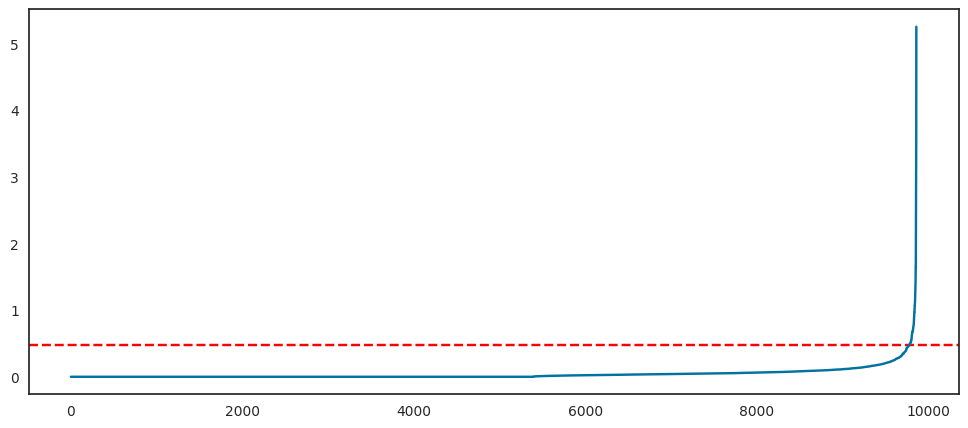

In [210]:
plt.figure(figsize=(12,5))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(0.48, linestyle= '--', color='red')
plt.plot(distances)

The optimal value for epsilon will be found at the point of maximum curvature. So we train our model, selecting 0.48 for eps and setting min_samples to 50.

Building the model for 6 cluster:

In [211]:
db = DBSCAN(eps=0.48, min_samples=50)

# Fit the Algorithm
model = db.fit(principalComponents)
label_db = model.labels_
unique_labels = np.unique(label_db)

# Predict on the model
y_db = model.fit_predict(principalComponents)

# identifying the points which makes up our core points
sample_cores = np.zeros_like(label_db, dtype=bool)
sample_cores[db.core_sample_indices_] = True

# Calculating the number of clusters
n_clusters = len(set(label_db)) - (1 if -1 in label_db else 0)
print('No of clusters:', n_clusters)

No of clusters: 6


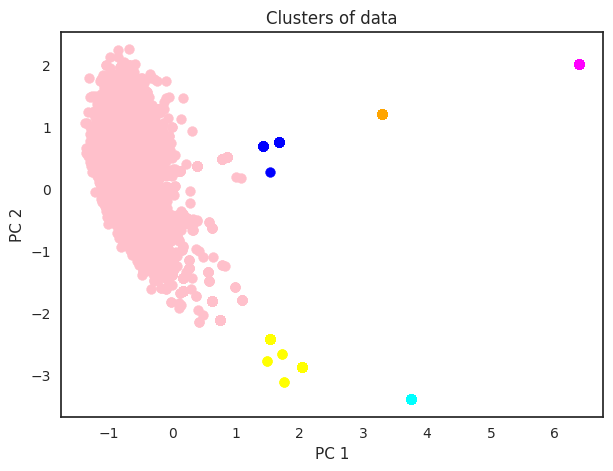

In [212]:
# plot the result
plt.figure(figsize=(7,5))
plt.scatter(principalComponents[y_db == 0, 0], principalComponents[y_db == 0, 1], s = 50, c = 'pink')
plt.scatter(principalComponents[y_db == 1, 0], principalComponents[y_db == 1, 1], s = 50, c = 'yellow')
plt.scatter(principalComponents[y_db == 2, 0], principalComponents[y_db == 2, 1], s = 50, c = 'cyan')
plt.scatter(principalComponents[y_db == 3, 0], principalComponents[y_db == 3, 1], s = 50, c = 'magenta')
plt.scatter(principalComponents[y_db == 4, 0], principalComponents[y_db == 4, 1], s = 50, c = 'orange')
plt.scatter(principalComponents[y_db == 5, 0], principalComponents[y_db == 5, 1], s = 50, c = 'blue')
plt.scatter(principalComponents[y_db == 6, 0], principalComponents[y_db == 6, 1], s = 50, c = 'red')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters of data')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


**DBSCAN** **(Density-Based Spatial Clustering of Applications with Noise)** is an unsupervised machine learning algorithm used for clustering data points. It is based on the premise that areas of high density are likely to be more relevant than areas of low density. The model looks for areas of high density by defining a distance threshold between points in a dataset, and then grouping together points that are within this threshold. After assigning points to clusters, the algorithm can also identify outliers that don’t belong to any cluster. DBSCAN is popular for its ability to find non-linear clusters, something that K-Means clustering struggles with.


For Silhouette score

In [213]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics - Silhouette score
dbscan_silhouette_score = silhouette_score(principalComponents, label_db)
print("Silhouette Coefficient: %0.3f"%dbscan_silhouette_score)

Silhouette Coefficient: 0.464


In [214]:
# Creating Dataframe of its 3 principal components  
principal_df = pd.DataFrame(data = principalComponents, columns=['Principal Component 1','Principal Component 2','Principal Component 3'], index=df.index)
# Creating new coumn of predicted labels for above newly created dataframe
principal_df["label_dbscan"] = label_db
principal_df.sample(5)

Principal Component 1  \
Restaurant_name                                                                             
(Urban Asia - Kitchen & Bar, Urban Asia - Kitchen & Bar)                        -0.742217   
(Desi Bytes, Desi Bytes)                                                        -0.857037   
(Mustang Terrace Lounge, Mustang Terrace Lounge)                                -0.964654   
(eat.fit, eat.fit)                                                              -0.812750   
(Zega - Sheraton Hyderabad Hotel, Zega - Sheraton Hyderabad Hotel)              -0.991590   

                                                                    Principal Component 2  \
Restaurant_name                                                                             
(Urban Asia - Kitchen & Bar, Urban Asia - Kitchen & Bar)                        -0.474739   
(Desi Bytes, Desi Bytes)                                                        -0.400752   
(Mustang Terrace Lounge, Mustang Terrace Lounge)                                 0.680399   
(eat.fit, eat.fit)                                                              -0.477364   
(Zega - Sheraton Hyderabad Hotel, Zega - Sheraton Hyderabad Hotel)              -0.180498   

                                                                    Principal Component 3  \
Restaurant_name                                                                             
(Urban Asia - Kitchen & Bar, Urban Asia - Kitchen & Bar)                        -0.176487   
(Desi Bytes, Desi Bytes)                                                        -0.213911   
(Mustang Terrace Lounge, Mustang Terrace Lounge)                                -0.667358   
(eat.fit, eat.fit)                                                              -0.180015   
(Zega - Sheraton Hyderabad Hotel, Zega - Sheraton Hyderabad Hotel)              -0.415867   

                                                                    label_dbscan  
Restaurant_name                                                                   
(Urban Asia - Kitchen & Bar, Urban Asia - Kitchen & Bar)                       0  
(Desi Bytes, Desi Bytes)                                                       0  
(Mustang Terrace Lounge, Mustang Terrace Lounge)                               0  
(eat.fit, eat.fit)                                                             0  
(Zega - Sheraton Hyderabad Hotel, Zega - Sheraton Hyderabad Hotel)             0

In [215]:
principal_df.shape, df.shape

((9861, 4), (9861, 55))

In [216]:
# Merging the predicted labels from principal_df to our regular old df for further processing
new_df = df.join(principal_df['label_dbscan'],  on='Restaurant_name')
new_df.head(2)

Cost  \
Restaurant_name                            
(Beyond Flavours, Beyond Flavours)   800   
(Beyond Flavours, Beyond Flavours)   800   

                                                                                             Cuisines  \
Restaurant_name                                                                                         
(Beyond Flavours, Beyond Flavours)  Chinese, Continental, Kebab, European, South Indian, North Indian   
(Beyond Flavours, Beyond Flavours)  Chinese, Continental, Kebab, European, South Indian, North Indian   

                                    cuisine_count  Rating  Pictures  \
Restaurant_name                                                       
(Beyond Flavours, Beyond Flavours)              6     5.0       0.0   
(Beyond Flavours, Beyond Flavours)              6     5.0       0.0   

                                    Review_count  Followers  Review_length  \
Restaurant_name                                                              
(Beyond Flavours, Beyond Flavours)           1.0        2.0          222.0   
(Beyond Flavours, Beyond Flavours)           1.0        2.0          222.0   

                                    Polarity  American  ...  Seafood  \
Restaurant_name                                         ...            
(Beyond Flavours, Beyond Flavours)      0.66       0.0  ...      0.0   
(Beyond Flavours, Beyond Flavours)      0.66       0.0  ...      0.0   

                                    South Indian  Spanish  Street Food  Sushi  \
Restaurant_name                                                                 
(Beyond Flavours, Beyond Flavours)           0.0      0.0          0.0    0.0   
(Beyond Flavours, Beyond Flavours)           0.0      0.0          0.0    0.0   

                                    Thai  Wraps  \
Restaurant_name                                   
(Beyond Flavours, Beyond Flavours)   0.0    0.0   
(Beyond Flavours, Beyond Flavours)   0.0    0.0   

                                                                                                                                                                                                                                                                 pos_tags  \
Restaurant_name                                                                                                                                                                                                                                                             
(Beyond Flavours, Beyond Flavours)  JJ NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , '' '' , FW POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , CD '' , NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNS POS , NNP POS , NNP POS , JJ '' , '' POS NN   
(Beyond Flavours, Beyond Flavours)  JJ NNP POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , '' '' , FW POS , NNP POS , NNP POS , NNP POS , NNP POS , '' '' , CD '' , NNP POS , NNP POS , '' '' , NNP POS , NNP POS , NNS POS , NNP POS , NNP POS , JJ '' , '' POS NN   

                                    sentiment  label_dbscan  
Restaurant_name                                              
(Beyond Flavours, Beyond Flavours)          1             0  
(Beyond Flavours, Beyond Flavours)          1             0  

[2 rows x 56 columns]

#### 2. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**Silhouette Score Metric -** The silhouette score is a metric commonly used to evaluate a model's performance in unsupervised machine learning. It measures how well each data point is matched to its own cluster compared to other clusters, providing a range from -1 to 1 with a score of 1 indicating a perfect match and -1 indicating the worst possible match. The silhouette score can be used to identify groups of data that are highly similar and separated from other groups. The Silhouette Score is a metric commonly used to assess the quality of clustering algorithms in machine learning. It is based on the average distance between an item and all other items in its own cluster, versus the average distance of that item and all items in other clusters. A higher score indicates a better clustering.

### ML Model - 5 Content Based Recommendation System

In [217]:
# ML Model - 5 Implementation
# variable that contain restaurant details
restaurant_data = zomato_data.copy()
restaurant_data = restaurant_data.reset_index()

In [218]:
restaurant_data.shape

(9861, 17)

In [219]:
restaurant_data.set_index('Restaurant_name', inplace=True)

In [220]:
# Making series of restaurants with its index
indices = pd.Series(restaurant_data.index)

In [221]:
indices.sample(10)

2422                            SKYHY
4826                    Mathura Vilas
1118                  Barbeque Nation
2607           Mustang Terrace Lounge
7518    The Old Madras Baking Company
4248       The Foodie Monster Kitchen
2847                  Behrouz Biryani
4893                    Mathura Vilas
2327                             Amul
7463           Royal Spicy Restaurant
Name: Restaurant_name, dtype: object

In [222]:
# Creating tf-idf matrix
tfv = TfidfVectorizer(min_df=3, max_features=None,
                      strip_accents='unicode', analyzer= 'word', token_pattern= r'\w{1,}',
                      ngram_range=(1,3),
                      stop_words = 'english')

In [223]:
# applying tfidf vector on reviews column
tvf_matrix = tfv.fit_transform(restaurant_data['Review'])

In [224]:
tvf_matrix

<9861x21049 sparse matrix of type '<class 'numpy.float64'>'
	with 323455 stored elements in Compressed Sparse Row format>

In [225]:
tvf_matrix.shape

(9861, 21049)

In [226]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tvf_matrix, tvf_matrix)

In [227]:
sig[0]

array([0.76161411, 0.76159886, 0.76159436, ..., 0.7615946 , 0.76159447,
       0.76159424])

In [228]:
def give_recommendation(Restaurant_name, sig = sig):
    
    # Create a list to put top 10 restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == Restaurant_name].index[0]

    # Find the restaurants with a similar sig value and order them in descending order
    sig_scores = pd.Series(sig[idx]).sort_values(ascending=False)
    
    # Extract top 20 restaurant indexes with a similar sig value
    top20_indexes = list(sig_scores.iloc[0:21].index)
    
    # Names of the top 20 restaurants
    for i in top20_indexes:
        recommend_restaurant.append(list(restaurant_data.index)[i])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['Cuisines', 'Rating', 'Cost'])
    
    # Create the top 20 similar restaurants with some of their columns
    for i in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(restaurant_data[['Cuisines', 'Rating', 'Cost']][restaurant_data.index == i].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['Cuisines', 'Rating', 'Cost'], keep=False)
    df_new = df_new.sort_values(by='Rating', ascending=False).head(10)
    
    print('TOP 10 RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (len(df_new)), Restaurant_name)
    
    return df_new

In [229]:
restaurant_data[restaurant_data.index == 'Chinese Pavilion'].head(3)

index  \
Restaurant_name           
Chinese Pavilion   9863   
Chinese Pavilion   9864   
Chinese Pavilion   9865   

                                                                         Links  \
Restaurant_name                                                                  
Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavilion-gachibowli   
Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavilion-gachibowli   
Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavilion-gachibowli   

                  Cost    Collections          Cuisines  \
Restaurant_name                                           
Chinese Pavilion  1000  Not Available  Chinese, Seafood   
Chinese Pavilion  1000  Not Available  Chinese, Seafood   
Chinese Pavilion  1000  Not Available  Chinese, Seafood   

                                 Restaurant_timings  cuisine_count  \
Restaurant_name                                                      
Chinese Pavilion  12 Noon to 3:30 PM, 7 PM to 11 PM              2   
Chinese Pavilion  12 Noon to 3:30 PM, 7 PM to 11 PM              2   
Chinese Pavilion  12 Noon to 3:30 PM, 7 PM to 11 PM              2   

                     Customer_Name  \
Restaurant_name                      
Chinese Pavilion              Khan   
Chinese Pavilion       Diaryofmuna   
Chinese Pavilion  Himanshu Chhabra   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review  \
Restaurant_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
Chinese Pavilion                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Starting off with food...They have amazing and delicious Chinese food for starters as well as main course. Service is good and the people are polite. Quality and quantity both were up to the mark.\nA must visit.   
Chinese Pavilion  I had ordered Manchow Soup. The taste was very nice. It felt like a great start . Crispy noodles in it added a great texture and taste to the Soup, chicken was cooked well, overall a very good subtle starter. The Chilli Chicken Dry was One of the best I've tasted,was kinda smoky, chicken was cooked very well. the prawns quality and taste were justtt totally ammazing,cooked to perfection. Only drawback was the price and quantity werent up to the mark. the Chilli Garlic Burnt Sauce tasted extremely weird. The chicken fried rice w

In [230]:
give_recommendation('Chinese Pavilion')

TOP 10 RESTAURANTS LIKE 10 WITH SIMILAR REVIEWS:  Chinese Pavilion


Cuisines  \
Biryanis And More                                                    North Indian, Biryani, Chinese   
Beyond Flavours                   Chinese, Continental, Kebab, European, South Indian, North Indian   
Mathura Vilas                                                   South Indian, North Indian, Chinese   
Eat India Company                                                  North Indian, Mughlai, Beverages   
Kritunga Restaurant                                       Andhra, Biryani, Hyderabadi, North Indian   
Feast - Sheraton Hyderabad Hotel                         Modern Indian, Asian, Continental, Italian   
Absolute Sizzlers                                                    Continental, American, Chinese   
Flechazo                                               Asian, Mediterranean, North Indian, Desserts   
Urban Asia - Kitchen & Bar                                       Asian, Thai, Chinese, Sushi, Momos   
The Fisherman's Wharf                               Seafood, Goan, North Indian, Continental, Asian   

                                  Rating  Cost  
Biryanis And More                    5.0   500  
Beyond Flavours                      5.0   800  
Mathura Vilas                        5.0   500  
Eat India Company                    5.0  1300  
Kritunga Restaurant                  5.0   500  
Feast - Sheraton Hyderabad Hotel     5.0  2250  
Absolute Sizzlers                    5.0   750  
Flechazo                             5.0  1300  
Urban Asia - Kitchen & Bar           5.0  1100  
The Fisherman's Wharf                4.0  1500

In [231]:
give_recommendation('Hunger Maggi Point')

TOP 10 RESTAURANTS LIKE 10 WITH SIMILAR REVIEWS:  Hunger Maggi Point


Cuisines  Rating Cost
Hunger Maggi Point                                     Fast Food     5.0  200
Dine O China                               Chinese, Asian, Momos     5.0  850
Olive Garden         North Indian, Chinese, Continental, Biryani     5.0  700
Desi Bytes                                 North Indian, Chinese     5.0  400
Owm Nom Nom               Chinese, Biryani, Andhra, North Indian     4.0  900
Squeeze @ The Lime         Italian, North Indian, Chinese, Salad     4.0  650
Kritunga Restaurant    Andhra, Biryani, Hyderabadi, North Indian     3.0  500
Triptify                                            North Indian     2.0  400
Hunger Maggi Point                                     Fast Food     2.0  200
Mohammedia Shawarma                         Street Food, Arabian     2.0  150

In [232]:
give_recommendation('Tandoori Food Works')

TOP 10 RESTAURANTS LIKE 10 WITH SIMILAR REVIEWS:  Tandoori Food Works


Cuisines  Rating  Cost
Tandoori Food Works             North Indian, Burger, Kebab     5.0   500
Khaan Saab                            North Indian, Mughlai     5.0  1100
Pakwaan Grand                North Indian, Chinese, Biryani     5.0   400
Paradise                     Biryani, North Indian, Chinese     5.0   800
Behrouz Biryani                            Mughlai, Biryani     5.0   600
T Grill              North Indian, Andhra, Biryani, Chinese     5.0   700
Arena Eleven                                    Continental     4.0  1600
Arena Eleven                                    Continental     3.0  1600
Khaan Saab                            North Indian, Mughlai     3.0  1100
Biryanis And More            North Indian, Biryani, Chinese     2.0   500


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A content-based recommendation system is an AI-driven approach to personalized recommendations that filters items based on their characteristics or content. It recommends items to users based on what they have previously consumed, or what items are similar. It makes use of natural language processing (NLP) and machine learning algorithms to analyze the content of items and recommend new items to users.

Content-based filtering can be used in conjunction with other techniques, such as collaborative filtering, to improve the accuracy of recommendations.

For example, in a restaurant recommendation system, a user's profile may include information about the genres of restaurant they like. If a user likes chinese or italian or indian restaurant, the system will recommend other chinese or italian or indian restaurant to them.

The machine learning model used for content-based filtering can vary depending on the type of data and attributes of the items. Some models used in content-based filtering include:

Sigmoid similarity: Sigmoid similarity in machine learning is a type of similarity measure that is used to calculate the similarity between two sets of data. It is based on the sigmoid function, which is a type of non-linear activation function to produce a value between 0 and 1 and often used in neural networks. The sigmoid similarity measure takes into account both the magnitude and sign of the differences between two datasets. It can be used to calculate the similarity of any two datasets, including text or images.

TFIDF Vectorizer: The TF-IDF Vectorizer is a machine learning algorithm used to convert text into numerical data. It is used to analyze how often words occur within documents, and for classifying documents or determining the importance of certain topics. The TF-IDF Vectorizer is commonly used in Natural Language Processing (NLP) tasks such as topic modeling, text classification, and sentiment analysis. It uses two metrics – Term Frequency (TF) and Inverse Document Frequency (IDF) – to assign weights to words and phrases in the document. TF-IDF is particularly useful for identifying words or phrases that have high importance, or “significance” within the documents.

#### 2. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Content based recommendation system doesn't need any evalution metric. We can directly see the recommandations given by model and evaluate the result.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

silhouette score will be the best evalution metrics to select the model. Because it measures how well each data point is matched to its own cluster compared to other clusters, providing a range from -1 to 1 with a score of 1 indicating a perfect match and -1 indicating the worst possible match. A higher score indicates a better clustering.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that is particularly useful for clustering datasets with complex structures and varying densities. It works by identifying clusters based on the density of points in a given area, rather than assuming a fixed number of clusters or assuming that all clusters have a certain shape.

* In the context of Zomato restaurant clustering, DBSCAN is a suitable algorithm because restaurants in a given area may have varying densities, and the number of restaurants may not be known in advance. DBSCAN can discover the optimal number of clusters by detecting regions of high density and identifying clusters as regions with a high density of points.

* In addition, DBSCAN is also effective for sentiment analysis because it can group similar reviews together based on their proximity in the feature space. This is particularly useful when dealing with large volumes of text data, where traditional clustering algorithms may struggle.

* The Silhouette Coefficient is a measure of how well each data point fits within its assigned cluster, as compared to neighboring clusters. A high Silhouette Coefficient indicates that the clustering is effective in grouping similar data points together and separating dissimilar data points.

* A Silhouette Coefficient of 0.465 suggests that the DBSCAN algorithm is effective in clustering Zomato restaurant data and performing sentiment analysis, as it indicates that the clusters are well-defined and distinct. Therefore, DBSCAN is a suitable algorithm for Zomato restaurant clustering and sentiment analysis

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that is particularly useful for clustering datasets with complex structures and varying densities. It works by identifying clusters based on the density of points in a given area.
In our project, DBSCAN is a suitable algorithm because restaurants in a given area may have varying densities, and the number of restaurants may not be known in advance. DBSCAN can discover the optimal number of clusters by detecting regions of high density and identifying clusters as regions with a high density of points. It is effective for sentiment analysis because it can group similar reviews together based on their proximity in the feature space. This is particularly useful when dealing with large volumes of text data, where traditional clustering algorithms may struggle.
The Silhouette Coefficient is a measure of how well each data point fits within its assigned cluster, as compared to neighboring clusters. A high Silhouette Coefficient indicates that the clustering is effective in grouping similar data points together and separating dissimilar data points.
A Silhouette Coefficient of 0.465 suggests that the DBSCAN algorithm is effective in clustering Zomato restaurant data and performing sentiment analysis, as it indicates that the clusters are well-defined and distinct. Therefore, DBSCAN is a suitable algorithm for Zomato restaurant clustering and sentiment analysis


## ***8.*** ***Future Work (Optional)***

* AI-driven algorithms can be used to automatically generate summary reports of restaurant reviews in various languages and identify common trends in customer feedback.

* Sentiment Analysis: Sentiment analysis can be used to identify what people really think about a restaurant based on reviews. This can help customers determine which restaurants are worth their time, and which ones should be avoided.

* Online Learning: Currently, the system is trained on a batch of historical data. Future work can involve developing an online learning system that can adapt to the changing preferences of the users in real-time.

* Multi-language support: Zomato is a global platform and supports multiple languages. Future work can involve developing a multi-language content-based recommendation system that can handle different languages and provide recommendations in the user's preferred language.

* Utilize computer vision techniques to identify objects and classify food items in restaurant photos. 

* Use deep learning algorithms to compare reviews between two different restaurants and generate comparison results.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [233]:
# Save the File
from joblib import dump, load

dump(model, 'dbscan_model.pkl')

['dbscan_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [234]:
# Load the File and predict unseen data.
# unseen_data = zomato_data.sample(50)

In [235]:

# Load saved model from disk
# loaded_model = load('dbscan_model.pkl')

# Use loaded model to predict cluster labels for unseen data
# labels = loaded_model.fit_predict(principalComponents)


In [236]:
# labels

Now, we dont have unseen data so we have just comment out that part. Further we can add and perform predictions on it.

### ***Congrats! Our model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The conclusion of this Zomato restaurant clustering and metadata sentiment analysis project is that it is possible to use natural language processing and machine learning algorithms to build a model that can accurately cluster restaurants based on their reviews and sentiments. This project has helped identify customer preferences and restaurant ratings in order to better understand the impacts of customer feedback on the restaurant industry. This model can then be used to improve the decision-making process of a restaurant owner or manager in terms of advertising, pricing, customer acquisition, and other important business decisions. With this data, business owners can make more informed decisions about the quality of their restaurants and better understand the customer experience. We have seen that AI-based solutions provide a powerful tool for business owners to gain insight into the performance of their restaurants. After that sentiment analysis can be used to gain insights into customer preferences, providing data-driven understanding into how customers perceive different aspects of service quality. Furthermore, the insights provided by this project can be used for further business growth strategies.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***